In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline

## plot the clustering results for all gene in target samples

In [2]:
df_gene_cluster = pd.read_csv("df_gene_cluster.csv",header=0,index_col=0)
df_gene_cluster.set_index('ENA_name',inplace=True)
df_gene_cluster.head()

Accession_ID HORVU.MOREX.r3.1HG0024860 HORVU.MOREX.r3.1HG0031260  \
ENA_name                                                                      
ERS2903440    020055-57                       mid                       mid   
ERS2903441     02043-20                      high                       mid   
ERS2903442     02055-94                       mid                       mid   
ERS2903444    04053-034                      high                       mid   
ERS2903445    04053-099                       low                       low   

           HORVU.MOREX.r3.1HG0031480 HORVU.MOREX.r3.1HG0036390  \
ENA_name                                                         
ERS2903440                       low                       low   
ERS2903441                       low                       mid   
ERS2903442                       mid                       mid   
ERS2903444                       low                       mid   
ERS2903445                       mid                      high   

           HORVU.MOREX.r3.1HG0054220 HORVU.MOREX.r3.1HG0057440  \
ENA_name                                                         
ERS2903440                       mid                       mid   
ERS2903441                      high                      high   
ERS2903442                       mid                       mid   
ERS2903444                       mid                      high   
ERS2903445                       mid                       low   

           HORVU.MOREX.r3.1HG0058180 HORVU.MOREX.r3.1HG0062390  \
ENA_name                                                         
ERS2903440                       low                      high   
ERS2903441                       mid                       mid   
ERS2903442                       low                       mid   
ERS2903444                       mid                       mid   
ERS2903445                       mid                      high   

           HORVU.MOREX.r3.1HG0062680  ... HORVU.MOREX.r3.7HG0699010  \
ENA_name                              ...                             
ERS2903440                       mid  ...                      high   
ERS2903441                       low  ...                      high   
ERS2903442                       mid  ...                       mid   
ERS2903444                       low  ...                       mid   
ERS2903445                      high  ...                       low   

           HORVU.MOREX.r3.7HG0701130 HORVU.MOREX.r3.7HG0705340  \
ENA_name                                                         
ERS2903440                       low                       mid   
ERS2903441                       low                       mid   
ERS2903442                       low                       mid   
ERS2903444                       low                       mid   
ERS2903445                       low                      high   

           HORVU.MOREX.r3.7HG0721170 HORVU.MOREX.r3.7HG0729460  \
ENA_name                                                         
ERS2903440                       mid                       low   
ERS2903441                       mid                       mid   
ERS2903442                       low                       mid   
ERS2903444                       mid                       mid   
ERS2903445                      high                       mid   

           HORVU.MOREX.r3.7HG0729670 HORVU.MOREX.r3.7HG0740230  \
ENA_name                                                         
ERS2903440                      high                      high   
ERS2903441                      high                       mid   
ERS2903442                       mid                       mid   
ERS2903444                       mid                       mid   
ERS2903445                       low                       mid   

           HORVU.MOREX.r3.7HG0740600 HORVU.MOREX.r3.7HG0742750  \
ENA_name                                                         
ERS2903440                       mid             

In [3]:
GENES = [col for col in df_gene_cluster.columns if col.startswith("HORVU")]
df_cluster = df_gene_cluster[GENES]
melted_cluster = df_cluster.melt(var_name='gene',value_name='Cluster')
melted_cluster.head()

gene Cluster
0  HORVU.MOREX.r3.1HG0024860     mid
1  HORVU.MOREX.r3.1HG0024860    high
2  HORVU.MOREX.r3.1HG0024860     mid
3  HORVU.MOREX.r3.1HG0024860    high
4  HORVU.MOREX.r3.1HG0024860     low

In [4]:
melted_cluster['tmp'] = 1
cluster_count = melted_cluster.groupby(['gene','Cluster']).tmp.agg(['count']).reset_index()
cluster_count.loc[cluster_count['Cluster'] == 'low', 'count'] = -cluster_count['count']
cluster_count.head()

gene Cluster  count
0  HORVU.MOREX.r3.1HG0024860    high    129
1  HORVU.MOREX.r3.1HG0024860     low   -133
2  HORVU.MOREX.r3.1HG0024860     mid    240
3  HORVU.MOREX.r3.1HG0031260    high    190
4  HORVU.MOREX.r3.1HG0031260     low    -86

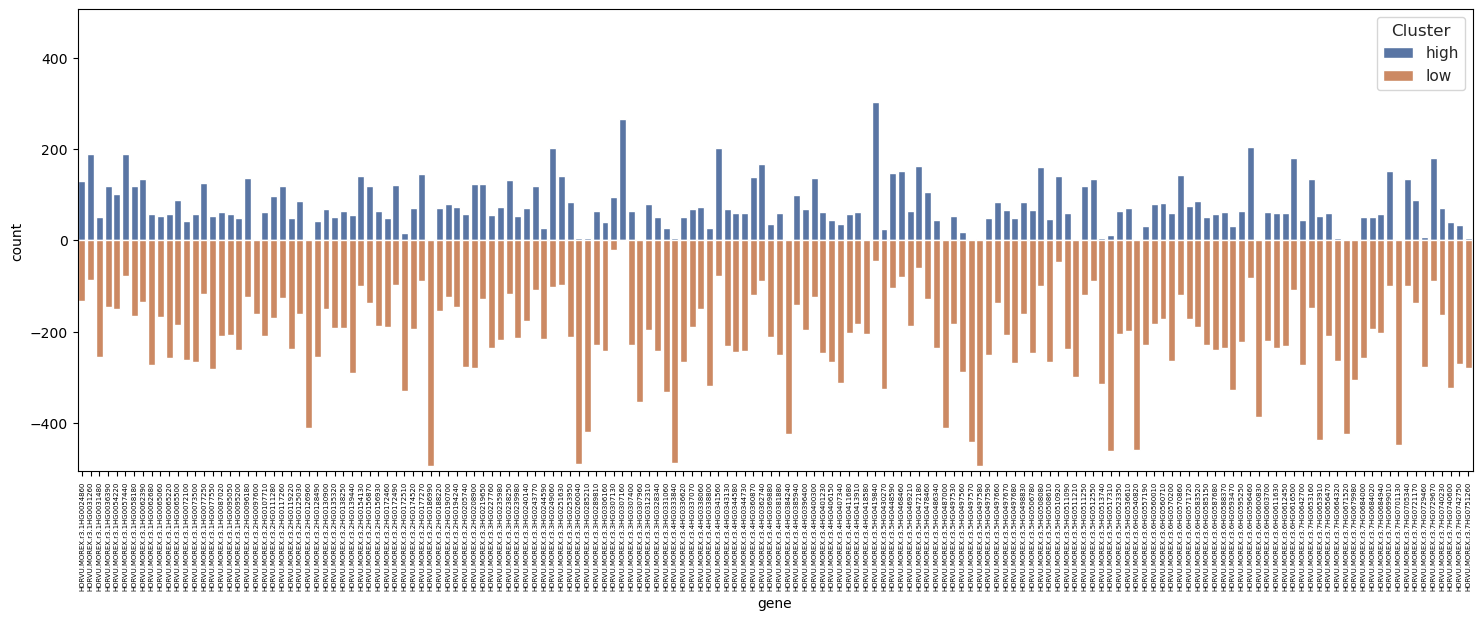

In [5]:
f, ax = plt.subplots(figsize=(18,6))
sns.set_theme(style="whitegrid")
data=cluster_count[cluster_count['Cluster'] != 'mid']
sns.barplot(x='gene', y='count', hue='Cluster', data=data, dodge=False)
plt.ylim(-505, 505)
plt.xticks(rotation=90,fontsize=5)
plt.show()
f.savefig("gene_matrix_cluster_distribution.png",dpi=300,bbox_inches='tight')

In [6]:
## plot the gene coverage values
df_matrix = pd.read_csv("gene_matrix.csv",index_col=0,header=0)
df_matrix.head()

ENA_name  HORVU.MOREX.r3.1HG0024860  HORVU.MOREX.r3.1HG0031260  \
0  ERS2903440                   0.935491                   0.901748   
1  ERS2903441                   0.952896                   0.904623   
2  ERS2903442                   0.922124                   0.926726   
3  ERS2903444                   0.972762                   0.954130   
4  ERS2903445                   0.812351                   0.799304   

   HORVU.MOREX.r3.1HG0031480  HORVU.MOREX.r3.1HG0036390  \
0                   0.001374                   0.107184   
1                   0.001170                   0.123464   
2                   0.003186                   0.115221   
3                   0.001597                   0.120309   
4                   0.001957                   0.131333   

   HORVU.MOREX.r3.1HG0054220  HORVU.MOREX.r3.1HG0057440  \
0                   0.011146                   0.115887   
1                   0.014043                   0.136630   
2                   0.010088                   0.114513   
3                   0.011357                   0.143732   
4                   0.010872                   0.098500   

   HORVU.MOREX.r3.1HG0058180  HORVU.MOREX.r3.1HG0062390  \
0                   0.487823                   1.309566   
1                   0.532475                   1.212697   
2                   0.468142                   1.238938   
3                   0.530565                   1.197054   
4                   0.509459                   1.332681   

   HORVU.MOREX.r3.1HG0062680  ...  HORVU.MOREX.r3.7HG0699010  \
0                   0.782961  ...                   0.520803   
1                   0.604154  ...                   0.527794   
2                   0.759823  ...                   0.478584   
3                   0.637565  ...                   0.500577   
4                   0.957599  ...                   0.476408   

   HORVU.MOREX.r3.7HG0701130  HORVU.MOREX.r3.7HG0705340  \
0                        0.0                   1.024048   
1                        0.0                   1.009655   
2                        0.0                   0.986903   
3                        0.0                   0.969390   
4                        0.0                   1.081322   

   HORVU.MOREX.r3.7HG0721170  HORVU.MOREX.r3.7HG0729460  \
0                   0.646920                   1.033514   
1                   0.619661                   1.073435   
2                   0.601770                   1.084602   
3                   0.683879                   1.161388   
4                   0.731898                   1.084584   

   HORVU.MOREX.r3.7HG0729670  HORVU.MOREX.r3.7HG0740230  \
0                   1.076723                   0.692114   
1                   1.082212                   0.574312   
2                   1.013097                   0.609381   
3                   1.014817                   0.620885   
4                   0.976952                   0.662535   

   HORVU.MOREX.r3.7HG0740600  HORVU.MOREX.r3.7HG0742750  \
0                   0.030689                   0.218337   
1                   0.011703                   0.176419   
2                   0.009381                   0.206018   
3                   0.014196                   0.136279   
4                   0.034790                   0.251794   

   HORVU.MOREX.r3.7HG0751260  
0                   0.966486  
1                   0.929491  
2                   0.913982  
3                   0.942064  
4                   0.976517  

[5 rows x 161 columns]

In [7]:
melted_matrix = df_matrix.reset_index().melt(id_vars='ENA_name', var_name='gene', value_name='coverage')
melted_matrix.head()

ENA_name   gene  coverage
0  ERS2903440  index       0.0
1  ERS2903441  index       1.0
2  ERS2903442  index       2.0
3  ERS2903444  index       3.0
4  ERS2903445  index       4.0

In [8]:
df_cluster.head()

HORVU.MOREX.r3.1HG0024860 HORVU.MOREX.r3.1HG0031260  \
ENA_name                                                         
ERS2903440                       mid                       mid   
ERS2903441                      high                       mid   
ERS2903442                       mid                       mid   
ERS2903444                      high                       mid   
ERS2903445                       low                       low   

           HORVU.MOREX.r3.1HG0031480 HORVU.MOREX.r3.1HG0036390  \
ENA_name                                                         
ERS2903440                       low                       low   
ERS2903441                       low                       mid   
ERS2903442                       mid                       mid   
ERS2903444                       low                       mid   
ERS2903445                       mid                      high   

           HORVU.MOREX.r3.1HG0054220 HORVU.MOREX.r3.1HG0057440  \
ENA_name                                                         
ERS2903440                       mid                       mid   
ERS2903441                      high                      high   
ERS2903442                       mid                       mid   
ERS2903444                       mid                      high   
ERS2903445                       mid                       low   

           HORVU.MOREX.r3.1HG0058180 HORVU.MOREX.r3.1HG0062390  \
ENA_name                                                         
ERS2903440                       low                      high   
ERS2903441                       mid                       mid   
ERS2903442                       low                       mid   
ERS2903444                       mid                       mid   
ERS2903445                       mid                      high   

           HORVU.MOREX.r3.1HG0062680 HORVU.MOREX.r3.1HG0065060  ...  \
ENA_name                                                        ...   
ERS2903440                       mid                       mid  ...   
ERS2903441                       low                       mid  ...   
ERS2903442                       mid                       low  ...   
ERS2903444                       low                       low  ...   
ERS2903445                      high                      high  ...   

           HORVU.MOREX.r3.7HG0699010 HORVU.MOREX.r3.7HG0701130  \
ENA_name                                                         
ERS2903440                      high                       low   
ERS2903441                      high                       low   
ERS2903442                       mid                       low   
ERS2903444                       mid                       low   
ERS2903445                       low                       low   

           HORVU.MOREX.r3.7HG0705340 HORVU.MOREX.r3.7HG0721170  \
ENA_name                                                         
ERS2903440                       mid                       mid   
ERS2903441                       mid                       mid   
ERS2903442                       mid                       low   
ERS2903444                       mid                       mid   
ERS2903445                      high                      high   

           HORVU.MOREX.r3.7HG0729460 HORVU.MOREX.r3.7HG0729670  \
ENA_name                                                         
ERS2903440                       low                      high   
ERS2903441                       mid                      high   
ERS2903442                       mid                       mid   
ERS2903444                       mid                       mid   
ERS2903445                       mid                       low   

           HORVU.MOREX.r3.7HG0740230 HORVU.MOREX.r3.7HG0740600  \
ENA_name                                                         
ERS2903440                      high                       mid   
ERS2903441                       mid                       low   
ERS29034

In [9]:
melted_cluster_new = df_cluster.reset_index().melt(id_vars='ENA_name', var_name='gene',value_name='Cluster')
melted_cluster_new.head()

ENA_name                       gene Cluster
0  ERS2903440  HORVU.MOREX.r3.1HG0024860     mid
1  ERS2903441  HORVU.MOREX.r3.1HG0024860    high
2  ERS2903442  HORVU.MOREX.r3.1HG0024860     mid
3  ERS2903444  HORVU.MOREX.r3.1HG0024860    high
4  ERS2903445  HORVU.MOREX.r3.1HG0024860     low

In [10]:
df_cluster_coverage = melted_cluster_new.merge(melted_matrix,on=['ENA_name','gene'])
df_cluster_coverage.head()

ENA_name                       gene Cluster  coverage
0  ERS2903440  HORVU.MOREX.r3.1HG0024860     mid  0.935491
1  ERS2903441  HORVU.MOREX.r3.1HG0024860    high  0.952896
2  ERS2903442  HORVU.MOREX.r3.1HG0024860     mid  0.922124
3  ERS2903444  HORVU.MOREX.r3.1HG0024860    high  0.972762
4  ERS2903445  HORVU.MOREX.r3.1HG0024860     low  0.812351

## Filter geno and pheno data, perform ttest

In [11]:
df_all = pd.read_csv("all_experiments.csv",header=0,index_col=0)
df_all.head()

experiment     trait  pheno_count_with_nan  pheno_count_missing  \
0  2014_18Hrs_SoP  ZS49PlHt                   331                   26   
1  2014_18Hrs_SoP  ZS49PlHt                   331                   26   
2  2014_18Hrs_SoP  ZS49PlHt                   331                   26   
3  2014_18Hrs_SoP  ZS49PlHt                   331                   26   
4  2014_18Hrs_SoP  ZS49PlHt                   331                   26   

     ENA_name  phenotype_value                       gene genotype_cluster  \
0  ERS2903472             26.0  HORVU.MOREX.r3.1HG0024860             high   
1  ERS2903473             32.0  HORVU.MOREX.r3.1HG0024860              mid   
2  ERS2903474             33.0  HORVU.MOREX.r3.1HG0024860             high   
3  ERS2903475             37.0  HORVU.MOREX.r3.1HG0024860              mid   
4  ERS2903476             50.0  HORVU.MOREX.r3.1HG0024860              mid   

   genotype_value  without_nan_count_high  without_nan_count_low  \
0        0.950587                      98                     76   
1        0.940677                      98                     76   
2        0.980333                      98                     76   
3        0.936939                      98                     76   
4        0.932741                      98                     76   

   without_nan_count_mid  
0                    157  
1                    157  
2                    157  
3                    157  
4                    157

In [12]:
experiment_list = list(df_all['experiment'].unique())
experiment_list

['2014_18Hrs_SoP',
 '2014_NtL_SoP',
 '2015_TOP1_nan',
 '2015_TOP2_nan',
 '2015_TOP3_nan',
 '2015_nan_ESP',
 '2015_nan_GER',
 '2015_nan_KAT',
 '2016_18Hrs_SoP',
 '2016_1NI_MER',
 '2016_2Ir_MER',
 '2016_NatL_SoP',
 '2016_nan_ESP',
 '2016_nan_GER',
 '2016_nan_KAT']

In [13]:
df_all['experiment'].value_counts()

experiment
2016_nan_KAT      248960
2016_nan_ESP      244000
2014_NtL_SoP      242240
2014_18Hrs_SoP    239680
2016_2Ir_MER      221920
2016_1NI_MER      220320
2015_nan_KAT      206240
2015_nan_ESP      201280
2016_nan_GER      199200
2015_nan_GER      197280
2016_NatL_SoP     153600
2016_18Hrs_SoP    150240
2015_TOP3_nan      49920
2015_TOP1_nan      40640
2015_TOP2_nan      26880
Name: count, dtype: int64

In [15]:
##check non numeric value in phenotype data
non_numeric_values = []
for index, value in df_all['phenotype_value'].items():
    try:
        float(value)
    except ValueError:
        non_numeric_values.append((index, value))

In [16]:
len(non_numeric_values)

0

In [18]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ## loop through experiment, trait, and genes, for num_high and num_low both > 0, do ttests and output results
    stats_list = ['experiment',
                  'trait',
                  'gene',
                  'num_high',
                  'num_low',
                  'num_mid',
                  't_stat',
                  'p_value']
    
    array_2D = []
    ## loop experiments
    for experiment in experiment_list:
        #get experiment data
        df_experiment = df_all[df_all['experiment'] == experiment]
        
        #get trait list
        trait_list = list(df_experiment['trait'].unique())
        
        ## loop traits
        for trait in trait_list:
            df_experiment_trait = df_experiment[df_experiment['trait'] == trait]
            gene_list = list(df_experiment_trait['gene'].unique())
            
            ## loop genes
            for gene in gene_list:
                df_experiment_trait_gene = df_experiment_trait[df_experiment_trait['gene'] == gene]
                num_cluster = len(df_experiment_trait_gene['genotype_cluster'].value_counts())
                
                ## count high and low
                series = df_experiment_trait_gene["genotype_cluster"].value_counts()
                num_high = 0
                num_low = 0
                num_mid = 0
                if 'high' in series.index:
                    num_high = series['high'] 
                if 'low' in series.index:
                    num_low = series['low']
                if 'mid' in series.index:
                    num_low = series['mid']
                ## with low and high data
                if num_high * num_low > 0:
                    group1 = df_experiment_trait_gene[df_experiment_trait_gene["genotype_cluster"] == "high"]["phenotype_value"].dropna()
                    group2 = df_experiment_trait_gene[df_experiment_trait_gene["genotype_cluster"] == "low"]["phenotype_value"].dropna()
                    ## ttests
                    t_stat, p_value = ttest_ind(group1, group2)
                else:
                    t_stat, p_value = (np.nan, np.nan)
                para_list = [experiment, trait, gene, num_high, num_low, num_mid, t_stat, p_value]
                array_2D.append(para_list)
    df_stats = pd.DataFrame(array_2D, columns=stats_list)
    df_stats.to_csv("all_experiment_ttests.csv")

## Select target gene, and count trait and trial

In [19]:
df_stats.head()

experiment     trait                       gene  num_high  num_low  \
0  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0024860        67      148   
1  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0031260        97      151   
2  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0031480        36      134   
3  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0036390        85      133   
4  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0054220        57      151   

   num_mid    t_stat   p_value  
0        0  2.161427  0.032197  
1        0  2.192573  0.029859  
2        0 -1.021480  0.308487  
3        0 -0.836427  0.404089  
4        0 -2.228484  0.027316

In [20]:
## apply p-value threshold of 0.01, for each gene, count what trait in how many trials were detected
df_stats_filter = df_stats[df_stats['p_value'] <= 0.01]
gene_count_trait = df_stats_filter.groupby(['gene']).trait.agg(['count']).reset_index()
gene_count_trait.columns = ['gene','how_many_trait']
gene_count_trait.head()

gene  how_many_trait
0  HORVU.MOREX.r3.1HG0024860               1
1  HORVU.MOREX.r3.1HG0031260               6
2  HORVU.MOREX.r3.1HG0031480               1
3  HORVU.MOREX.r3.1HG0054220               2
4  HORVU.MOREX.r3.1HG0058180               1

In [21]:
gene_trait_count_trial = df_stats_filter.groupby(['gene','trait']).experiment.agg(['count']).reset_index()
gene_trait_count_trial.columns = ['gene','what_trait','gene_trait_how_many_trial']
gene_trait_count_trial.head()

gene what_trait  gene_trait_how_many_trial
0  HORVU.MOREX.r3.1HG0024860      GrYld                          1
1  HORVU.MOREX.r3.1HG0031260      GrYld                          1
2  HORVU.MOREX.r3.1HG0031260      TlrNo                          1
3  HORVU.MOREX.r3.1HG0031260       ZS49                          1
4  HORVU.MOREX.r3.1HG0031260   ZS49PlHt                          2

In [22]:
## merge trait count and trial count
df_count = gene_trait_count_trial.merge(gene_count_trait, on='gene')
df_count = df_count[['gene','how_many_trait','what_trait','gene_trait_how_many_trial']]
df_count.head()

gene  how_many_trait what_trait  \
0  HORVU.MOREX.r3.1HG0024860               1      GrYld   
1  HORVU.MOREX.r3.1HG0031260               6      GrYld   
2  HORVU.MOREX.r3.1HG0031260               6      TlrNo   
3  HORVU.MOREX.r3.1HG0031260               6       ZS49   
4  HORVU.MOREX.r3.1HG0031260               6   ZS49PlHt   

   gene_trait_how_many_trial  
0                          1  
1                          1  
2                          1  
3                          1  
4                          2

In [23]:
df_count['gene'].nunique()

122

## merge 76 genome info to df_count

In [24]:
## merge with data in 76 pangenomes
df_pan=pd.read_csv("merged_gemoma_output_phenology.count", delimiter='\t', header=None)
df_pan.columns=['V3','count','var','type']
df_pan['V3']=df_pan['V3'].str[:-2] + '1'
df_pan['V3'] = df_pan['V3'].str.replace('HORVU.MOREX.r3.HORVU.MOREX.r3.4HG0377280.1','HORVU.MOREX.r3.4HG0377280.1')
df_pan.head()

V3  count       var type
0  HORVU.MOREX.r3.1HG0024860.1      1   10TJ18     D
1  HORVU.MOREX.r3.1HG0031260.1      1   10TJ18     D
2  HORVU.MOREX.r3.1HG0031480.1      1   10TJ18     D
3  HORVU.MOREX.r3.1HG0036390.1      1   10TJ18     D
4  HORVU.MOREX.r3.2HG0119220.1      1   10TJ18     D

In [25]:
df_pan_group = df_pan.groupby(['V3']).agg({'count': ['mean', 'min', 'max','std']})
df_pan_group.columns = df_pan_group.columns.get_level_values(1)
df_pan_group=df_pan_group.reset_index()
df_pan_group['V3'] = df_pan_group['V3'].str.strip()
df_pan_group.head()

V3  mean  min  max       std
0  HORVU.MOREX.r3.1HG0024860.1   1.0    1    1  0.000000
1  HORVU.MOREX.r3.1HG0031260.1   1.0    1    1  0.000000
2  HORVU.MOREX.r3.1HG0031480.1   1.0    1    1  0.000000
3  HORVU.MOREX.r3.1HG0036390.1   1.0    0    2  0.163299
4  HORVU.MOREX.r3.1HG0054220.1   1.0    1    1  0.000000

In [26]:
df_pan_group['CNV'] = np.where(df_pan_group['std'] > 0, 'YES', 'NO')
df_pan_group.head()

V3  mean  min  max       std  CNV
0  HORVU.MOREX.r3.1HG0024860.1   1.0    1    1  0.000000   NO
1  HORVU.MOREX.r3.1HG0031260.1   1.0    1    1  0.000000   NO
2  HORVU.MOREX.r3.1HG0031480.1   1.0    1    1  0.000000   NO
3  HORVU.MOREX.r3.1HG0036390.1   1.0    0    2  0.163299  YES
4  HORVU.MOREX.r3.1HG0054220.1   1.0    1    1  0.000000   NO

In [27]:
df_pan_group['V3'].str.endswith('.1').value_counts()

V3
True    163
Name: count, dtype: int64

In [28]:
target_gene = list(df_count['gene'].unique())
target_gene = [x + '.1' for x in target_gene]
df_pan_group_target = df_pan_group[df_pan_group['V3'].isin(target_gene)]
df_pan_group_target['CNV'].value_counts()

CNV
NO     72
YES    50
Name: count, dtype: int64

In [29]:
df_count.head()

gene  how_many_trait what_trait  \
0  HORVU.MOREX.r3.1HG0024860               1      GrYld   
1  HORVU.MOREX.r3.1HG0031260               6      GrYld   
2  HORVU.MOREX.r3.1HG0031260               6      TlrNo   
3  HORVU.MOREX.r3.1HG0031260               6       ZS49   
4  HORVU.MOREX.r3.1HG0031260               6   ZS49PlHt   

   gene_trait_how_many_trial  
0                          1  
1                          1  
2                          1  
3                          1  
4                          2

In [30]:
df_pan_group.head()

V3  mean  min  max       std  CNV
0  HORVU.MOREX.r3.1HG0024860.1   1.0    1    1  0.000000   NO
1  HORVU.MOREX.r3.1HG0031260.1   1.0    1    1  0.000000   NO
2  HORVU.MOREX.r3.1HG0031480.1   1.0    1    1  0.000000   NO
3  HORVU.MOREX.r3.1HG0036390.1   1.0    0    2  0.163299  YES
4  HORVU.MOREX.r3.1HG0054220.1   1.0    1    1  0.000000   NO

In [31]:
df_count['gene'] = df_count['gene'] + '.1'

In [32]:
df_count_pan_group = df_count.merge(df_pan_group,left_on='gene',right_on='V3',how='left')
df_count_pan_group.head()

gene  how_many_trait what_trait  \
0  HORVU.MOREX.r3.1HG0024860.1               1      GrYld   
1  HORVU.MOREX.r3.1HG0031260.1               6      GrYld   
2  HORVU.MOREX.r3.1HG0031260.1               6      TlrNo   
3  HORVU.MOREX.r3.1HG0031260.1               6       ZS49   
4  HORVU.MOREX.r3.1HG0031260.1               6   ZS49PlHt   

   gene_trait_how_many_trial                           V3  mean  min  max  \
0                          1  HORVU.MOREX.r3.1HG0024860.1   1.0    1    1   
1                          1  HORVU.MOREX.r3.1HG0031260.1   1.0    1    1   
2                          1  HORVU.MOREX.r3.1HG0031260.1   1.0    1    1   
3                          1  HORVU.MOREX.r3.1HG0031260.1   1.0    1    1   
4                          2  HORVU.MOREX.r3.1HG0031260.1   1.0    1    1   

   std CNV  
0  0.0  NO  
1  0.0  NO  
2  0.0  NO  
3  0.0  NO  
4  0.0  NO

In [33]:
df_count_pan_group.to_csv("gene_count_trait_and_trail_p01.csv")

## merge 76 genome info to df_stats

In [34]:
df_stats.head()

experiment     trait                       gene  num_high  num_low  \
0  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0024860        67      148   
1  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0031260        97      151   
2  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0031480        36      134   
3  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0036390        85      133   
4  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0054220        57      151   

   num_mid    t_stat   p_value  
0        0  2.161427  0.032197  
1        0  2.192573  0.029859  
2        0 -1.021480  0.308487  
3        0 -0.836427  0.404089  
4        0 -2.228484  0.027316

In [35]:
df_stats['gene'] = df_stats['gene'] + '.1'

In [36]:
df_stats_pan_group = df_stats.merge(df_pan_group,left_on='gene',right_on='V3',how='left')
df_stats_pan_group.head()

experiment     trait                         gene  num_high  num_low  \
0  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0024860.1        67      148   
1  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0031260.1        97      151   
2  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0031480.1        36      134   
3  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0036390.1        85      133   
4  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0054220.1        57      151   

   num_mid    t_stat   p_value                           V3  mean  min  max  \
0        0  2.161427  0.032197  HORVU.MOREX.r3.1HG0024860.1   1.0    1    1   
1        0  2.192573  0.029859  HORVU.MOREX.r3.1HG0031260.1   1.0    1    1   
2        0 -1.021480  0.308487  HORVU.MOREX.r3.1HG0031480.1   1.0    1    1   
3        0 -0.836427  0.404089  HORVU.MOREX.r3.1HG0036390.1   1.0    0    2   
4        0 -2.228484  0.027316  HORVU.MOREX.r3.1HG0054220.1   1.0    1    1   

        std  CNV  
0  0.000000   NO  
1  0.000000   NO  
2  0.000000   NO  
3  0.163299  YES  
4  0.000000   NO

In [37]:
df_stats_pan_group.to_csv("all_experiment_ttests_with_pan_info.csv")

## Plot target genes

In [38]:
## target gene, trait, experiment with p-value < 0.01 in df_stats
df_stats.head()

experiment     trait                         gene  num_high  num_low  \
0  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0024860.1        67      148   
1  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0031260.1        97      151   
2  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0031480.1        36      134   
3  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0036390.1        85      133   
4  2014_18Hrs_SoP  ZS49PlHt  HORVU.MOREX.r3.1HG0054220.1        57      151   

   num_mid    t_stat   p_value  
0        0  2.161427  0.032197  
1        0  2.192573  0.029859  
2        0 -1.021480  0.308487  
3        0 -0.836427  0.404089  
4        0 -2.228484  0.027316

In [39]:
df_all.head()

experiment     trait  pheno_count_with_nan  pheno_count_missing  \
0  2014_18Hrs_SoP  ZS49PlHt                   331                   26   
1  2014_18Hrs_SoP  ZS49PlHt                   331                   26   
2  2014_18Hrs_SoP  ZS49PlHt                   331                   26   
3  2014_18Hrs_SoP  ZS49PlHt                   331                   26   
4  2014_18Hrs_SoP  ZS49PlHt                   331                   26   

     ENA_name  phenotype_value                       gene genotype_cluster  \
0  ERS2903472             26.0  HORVU.MOREX.r3.1HG0024860             high   
1  ERS2903473             32.0  HORVU.MOREX.r3.1HG0024860              mid   
2  ERS2903474             33.0  HORVU.MOREX.r3.1HG0024860             high   
3  ERS2903475             37.0  HORVU.MOREX.r3.1HG0024860              mid   
4  ERS2903476             50.0  HORVU.MOREX.r3.1HG0024860              mid   

   genotype_value  without_nan_count_high  without_nan_count_low  \
0        0.950587                      98                     76   
1        0.940677                      98                     76   
2        0.980333                      98                     76   
3        0.936939                      98                     76   
4        0.932741                      98                     76   

   without_nan_count_mid  
0                    157  
1                    157  
2                    157  
3                    157  
4                    157

In [40]:
df_all['gene'] = df_all['gene'] + '.1'

In [41]:
df_pan_group.head()

V3  mean  min  max       std  CNV
0  HORVU.MOREX.r3.1HG0024860.1   1.0    1    1  0.000000   NO
1  HORVU.MOREX.r3.1HG0031260.1   1.0    1    1  0.000000   NO
2  HORVU.MOREX.r3.1HG0031480.1   1.0    1    1  0.000000   NO
3  HORVU.MOREX.r3.1HG0036390.1   1.0    0    2  0.163299  YES
4  HORVU.MOREX.r3.1HG0054220.1   1.0    1    1  0.000000   NO

In [42]:
gene_with_CNV = df_pan_group[df_pan_group['std'] > 0]['V3'].to_list()

In [43]:
len(gene_with_CNV)

67

In [45]:
## HrvPlHt to PlHt_Hrv
## ZS49PlHt to PlHt_ZS49
## PrdGrYld to GrYld_Prd
## 

In [59]:
df_target_all.head()

experiment     trait  pheno_count_with_nan  pheno_count_missing  \
915  2014_18Hrs_SoP  ZS49PlHt                   331                   26   
916  2014_18Hrs_SoP  ZS49PlHt                   331                   26   
917  2014_18Hrs_SoP  ZS49PlHt                   331                   26   
918  2014_18Hrs_SoP  ZS49PlHt                   331                   26   
919  2014_18Hrs_SoP  ZS49PlHt                   331                   26   

       ENA_name  phenotype_value                         gene  \
915  ERS2903472             26.0  HORVU.MOREX.r3.1HG0036390.1   
916  ERS2903473             32.0  HORVU.MOREX.r3.1HG0036390.1   
917  ERS2903474             33.0  HORVU.MOREX.r3.1HG0036390.1   
918  ERS2903475             37.0  HORVU.MOREX.r3.1HG0036390.1   
919  ERS2903476             50.0  HORVU.MOREX.r3.1HG0036390.1   

    genotype_cluster  genotype_value  without_nan_count_high  \
915              low        0.111625                      94   
916              mid        0.116188                      94   
917              mid        0.118306                      94   
918              mid        0.115831                      94   
919              mid        0.117703                      94   

     without_nan_count_low  without_nan_count_mid  num_high  num_low  num_mid  \
915                     89                    148        85      133        0   
916                     89                    148        85      133        0   
917                     89                    148        85      133        0   
918                     89                    148        85      133        0   
919                     89                    148        85      133        0   

       t_stat   p_value          experiment_trait          trait_experiment  
915 -0.836427  0.404089  2014_18Hrs_SoP=PlHt_ZS49  PlHt_ZS49=2014_18Hrs_SoP  
916 -0.836427  0.404089  2014_18Hrs_SoP=PlHt_ZS49  PlHt_ZS49=2014_18Hrs_SoP  
917 -0.836427  0.404089  2014_18Hrs_SoP=PlHt_ZS49  PlHt_ZS49=2014_18Hrs_SoP  
918 -0.836427  0.404089  2014_18Hrs_SoP=PlHt_ZS49  PlHt_ZS49=2014_18Hrs_SoP  
919 -0.836427  0.404089  2014_18Hrs_SoP=PlHt_ZS49  PlHt_ZS49=2014_18Hrs_SoP

In [60]:
df_target_all = df_all.merge(df_stats,on=['experiment','trait','gene'],how='left')

## filter for gene with CNV in 76 and p_value threshold
df_target_all = df_target_all[(df_target_all['p_value'] <= 0.01) & (df_target_all['gene'].isin(gene_with_CNV))]
#df_target_all = df_target_all[df_target_all['gene'].isin(gene_with_CNV)] ## no p_value threshold here

##create experiment_trait column
df_target_all['experiment_trait'] = df_target_all['experiment'] + "=" + df_target_all['trait']

## change the experiment_trait column to sort xticklabels
## HrvPlHt to PlHt_Hrv
## ZS49PlHt to PlHt_ZS49
## PrdGrYld to GrYld_Prd
replacement_dict = {'HrvPlHt':'PlHt_Hrv',
                   'ZS49PlHt':'PlHt_ZS49',
                   'PrdGrYld':'GrYld_Prd'}

df_target_all['experiment_trait'] = df_target_all['experiment_trait'].replace(replacement_dict, regex=True)

## remove 'PlnNo' trait from the list
df_target_all = df_target_all[df_target_all['trait'] != 'PlnNo']

## split the experiment_trait and change to trait_experiment
df_split = df_target_all['experiment_trait'].str.split('=', expand=True)
df_target_all['trait_experiment'] = df_split[1] + "=" + df_split[0]
#df_target_all['experiment_trait'] = df_target_all['experiment_trait'].str.replace(r'\(.*?\)', '')
df_target_all.head()

experiment     trait  pheno_count_with_nan  pheno_count_missing  \
16775  2014_18Hrs_SoP  ZS49PlHt                   331                   26   
16776  2014_18Hrs_SoP  ZS49PlHt                   331                   26   
16777  2014_18Hrs_SoP  ZS49PlHt                   331                   26   
16778  2014_18Hrs_SoP  ZS49PlHt                   331                   26   
16779  2014_18Hrs_SoP  ZS49PlHt                   331                   26   

         ENA_name  phenotype_value                         gene  \
16775  ERS2903472             26.0  HORVU.MOREX.r3.3HG0251630.1   
16776  ERS2903473             32.0  HORVU.MOREX.r3.3HG0251630.1   
16777  ERS2903474             33.0  HORVU.MOREX.r3.3HG0251630.1   
16778  ERS2903475             37.0  HORVU.MOREX.r3.3HG0251630.1   
16779  ERS2903476             50.0  HORVU.MOREX.r3.3HG0251630.1   

      genotype_cluster  genotype_value  without_nan_count_high  \
16775              mid        1.120986                      67   
16776              mid        1.153949                      67   
16777              low        1.077963                      67   
16778              mid        1.154797                      67   
16779              mid        1.107500                      67   

       without_nan_count_low  without_nan_count_mid  num_high  num_low  \
16775                     93                    171        86      156   
16776                     93                    171        86      156   
16777                     93                    171        86      156   
16778                     93                    171        86      156   
16779                     93                    171        86      156   

       num_mid    t_stat   p_value          experiment_trait  \
16775        0  3.470295  0.000683  2014_18Hrs_SoP=PlHt_ZS49   
16776        0  3.470295  0.000683  2014_18Hrs_SoP=PlHt_ZS49   
16777        0  3.470295  0.000683  2014_18Hrs_SoP=PlHt_ZS49   
16778        0  3.470295  0.000683  2014_18Hrs_SoP=PlHt_ZS49   
16779        0  3.470295  0.000683  2014_18Hrs_SoP=PlHt_ZS49   

               trait_experiment  
16775  PlHt_ZS49=2014_18Hrs_SoP  
16776  PlHt_ZS49=2014_18Hrs_SoP  
16777  PlHt_ZS49=2014_18Hrs_SoP  
16778  PlHt_ZS49=2014_18Hrs_SoP  
16779  PlHt_ZS49=2014_18Hrs_SoP

In [47]:
df_pan_group.set_index('V3',inplace=True)
df_pan_group.head()

mean  min  max       std  CNV
V3                                                        
HORVU.MOREX.r3.1HG0024860.1   1.0    1    1  0.000000   NO
HORVU.MOREX.r3.1HG0031260.1   1.0    1    1  0.000000   NO
HORVU.MOREX.r3.1HG0031480.1   1.0    1    1  0.000000   NO
HORVU.MOREX.r3.1HG0036390.1   1.0    0    2  0.163299  YES
HORVU.MOREX.r3.1HG0054220.1   1.0    1    1  0.000000   NO

In [48]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [49]:
colors = sns.color_palette()
my_hue = [colors[0],colors[7],colors[1]]

In [53]:
df_gene_name.dtypes

V1                    object
Chromosome            object
Start Pos              int64
Stop Pos               int64
Putative gene name    object
Annotation_r1_HC      object
GeneID                object
Annotation2           object
dtype: object

In [52]:
## read gene function name and annotation, add to plots
df_gene_name = pd.read_excel('camila_list.xlsx',sheet_name='gene_match',header=0)
for col in df_gene_name.columns:
    if not col.startswith("S"):
        df_gene_name[col] = df_gene_name[col].str.strip()
df_gene_name.drop_duplicates(subset='V3', keep='first')
df_gene_name['V3'] = df_gene_name['V3'].str[:-2] + ".1"
df_gene_name.set_index('V3',inplace=True)
df_gene_name.head()

V1 Chromosome  Start Pos  \
V3                                                                    
HORVU.MOREX.r3.1HG0024860.1  HORVU1Hr1G023620      chr1H  104414916   
HORVU.MOREX.r3.1HG0031260.1  HORVU1Hr1G029220      chr1H  162380897   
HORVU.MOREX.r3.1HG0031480.1  HORVU1Hr1G029520      chr1H  165138693   
HORVU.MOREX.r3.1HG0036390.1  HORVU1Hr1G034470      chr1H  221407300   
HORVU.MOREX.r3.2HG0119220.1  HORVU1Hr1G037570      chr1H  257467732   

                              Stop Pos Putative gene name  \
V3                                                          
HORVU.MOREX.r3.1HG0024860.1  104421730             HvSHP1   
HORVU.MOREX.r3.1HG0031260.1  162388573              HvAG2   
HORVU.MOREX.r3.1HG0031480.1  165145596           HvGA2ox5   
HORVU.MOREX.r3.1HG0036390.1  221410345             HvABC1   
HORVU.MOREX.r3.2HG0119220.1  257469352           HvGID1L2   

                                               Annotation_r1_HC      GeneID  \
V3                                                                            
HORVU.MOREX.r3.1HG0024860.1    MADS-box transcription factor 13  MLOC_57890   
HORVU.MOREX.r3.1HG0031260.1    MADS-box transcription factor 58  MLOC_57700   
HORVU.MOREX.r3.1HG0031480.1               gibberellin 2-oxidase    AY551433   
HORVU.MOREX.r3.1HG0036390.1  Protein kinase superfamily protein  MLOC_14062   
HORVU.MOREX.r3.2HG0119220.1                     Acetyl esterase    MLOC_194   

                                                                   Annotation2  
V3                                                                              
HORVU.MOREX.r3.1HG0024860.1  Hordeum vulgare subsp. vulgare mRNA for predic...  
HORVU.MOREX.r3.1HG0031260.1  Hordeum vulgare subsp. vulgare AGAMOUS-like pr...  
HORVU.MOREX.r3.1HG0031480.1  Hordeum vulgare subsp. vulgare GA 2-oxidase 5 ...  
HORVU.MOREX.r3.1HG0036390.1                    ABC-1 domain-containing protein  
HORVU.MOREX.r3.2HG0119220.1  Hordeum vulgare subsp. vulgare mRNA for predic...

In [54]:
df_gene_name.shape

(174, 8)

In [55]:
df_gene_name.index

Index(['HORVU.MOREX.r3.1HG0024860.1', 'HORVU.MOREX.r3.1HG0031260.1',
       'HORVU.MOREX.r3.1HG0031480.1', 'HORVU.MOREX.r3.1HG0036390.1',
       'HORVU.MOREX.r3.2HG0119220.1', 'HORVU.MOREX.r3.1HG0054220.1',
       'HORVU.MOREX.r3.1HG0057440.1', 'HORVU.MOREX.r3.1HG0058180.1',
                                 nan, 'HORVU.MOREX.r3.1HG0062390.1',
       ...
       'HORVU.MOREX.r3.7HG0751260.1', 'HORVU.MOREX.r3.2HG0127410.1',
       'HORVU.MOREX.r3.2HG0139440.1', 'HORVU.MOREX.r3.6HG0603700.1',
                                 nan, 'HORVU.MOREX.r3.7HG0679980.1',
       'HORVU.MOREX.r3.7HG0684940.1', 'HORVU.MOREX.r3.7HG0740600.1',
       'HORVU.MOREX.r3.6HG0600830.1', 'HORVU.MOREX.r3.7HG0684000.1'],
      dtype='object', name='V3', length=174)

In [61]:
p_value

0.1982743159533105

In [86]:
###### add coverage matrix in subplots and plot only low and mid for phenotype
# Generate the stripplot with x
for GENE in df_target_all['gene'].unique():
    f, axes = plt.subplots(1,2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1]})
    sns.despine(bottom=True, left=True)
    sns.set_theme(style="whitegrid")
    color_map = {'low':colors[0],'mid':colors[2],'high':colors[1]}
    
    ################# filter gene data
    df_gene = df_target_all[df_target_all['gene'] == GENE]
    df_gene2 = df_gene[df_gene['genotype_cluster'] != 'high'] ## to hide mid cluster
    
    ## get xticklabels and sort and use as order in plot
    sorted_xlabels = sorted(df_gene2['trait_experiment'].unique())
    
    ###### plot phenotype
    sns.stripplot(ax=axes[0], data=df_gene2, y="phenotype_value", x="trait_experiment", hue="genotype_cluster", jitter=True, dodge=True,
                      alpha=.25, size=4, zorder=1, palette=color_map, order=sorted_xlabels ) ##  palette=color_map
    
    sns.pointplot(ax=axes[0], data=df_gene2, y="phenotype_value", x="trait_experiment", hue="genotype_cluster", order=sorted_xlabels,
                    join=False, dodge=0.4, markers="d", scale=.7, errorbar='sd',errwidth=0.9, palette=color_map)  ## palette=color_map
    
    # Extract the unique hue categories
    trait_experiments = df_gene['trait_experiment'].unique()
    
    # Perform t-test and annotate p-value for each hue category
    for trait_experiment in trait_experiments:
        group1 = df_gene2[(df_gene2["trait_experiment"] == trait_experiment) & (df_gene2["genotype_cluster"] == "mid")]["phenotype_value"].dropna()
        group2 = df_gene2[(df_gene2["trait_experiment"] == trait_experiment) & (df_gene2["genotype_cluster"] == "low")]["phenotype_value"].dropna()
        t_stat, p_value = ttest_ind(group1, group2)
        annotation_text = f"p={p_value:.4f}"
        
        xtick_labels = [tick.get_text() for tick in axes[0].get_xticklabels()]
        x_pos = xtick_labels.index(trait_experiment)
        y_pos = max(group1.max(), group2.max()) # Adjust the y-position as needed
        y_pos = y_pos * 1.08
        axes[0].annotate(annotation_text, xy=(x_pos, y_pos), xycoords="data", ha="left",fontsize=10, rotation=25)
    
    ## extract min and max in 76 and annotate on plot
    MIN = df_pan_group.loc[GENE,'min']
    MAX = df_pan_group.loc[GENE,'max']
    annotation_text2 = f"CNV in pan: min={MIN:d}, max={MAX:d}"
    axes[0].annotate(annotation_text2, xy= (0.52, 1.1), xycoords='axes fraction')
    

    ##change xticklabels
    xtick_labels = [tick.get_text() for tick in axes[0].get_xticklabels()] 
    axes[0].set_xticklabels(xtick_labels, rotation = 40, ha='right', fontsize=10)
    
    #xticklabels color
    for i in np.arange(0,len(xtick_labels)):
        if "GrYld" in xtick_labels[i]:
            color=colors[3]
            t=axes[0].xaxis.get_ticklabels()[i]
            t.set_color(color)
        elif "PlHt" in xtick_labels[i]:
            color=colors[4]
            t=axes[0].xaxis.get_ticklabels()[i]
            t.set_color(color)
            
    
    # Get the handles and labels. For this example it'll be 2 tuples
    # of length 4 each.
    handles, labels = axes[0].get_legend_handles_labels()

    # When creating the legend, only use the first two elements
    # to effectively remove the last two.
    legend0 = axes[0].legend(handles[0:2], labels[0:2], bbox_to_anchor=(0.5, 1.15), ncol=2, borderaxespad=0.)  ## change depending one how many clusters
    ### ANNOTATE TITLE TO INCLUDE GENE NAME
    axes[0].set_title(GENE,fontweight='bold',x=0.5,y=1.16)
    GENE_name = df_gene_name.loc[GENE,'Putative gene name']
    GENE_func = df_gene_name.loc[GENE,'Annotation_r1_HC']
    annotation_text3 = f"({GENE_name}): {GENE_func}"
    axes[0].annotate(annotation_text3, xy= (0.7, 1.18), xycoords='axes fraction')
    axes[0].set_yscale('log')
    
    ########## create the second axes
    #### plot genotype
    sns.stripplot(ax=axes[1], data=df_gene, y="genotype_value", x="trait_experiment", hue="genotype_cluster", jitter=True, dodge=True,
                      alpha=.25, zorder=1,size=3, palette=color_map, order=sorted_xlabels) ## palette=color_map
    
    # sns.pointplot(ax=axes[1], data=df_gene, y="genotype_value", x="trait_experiment", hue="genotype_cluster",
    #     join=False, dodge=0.4, palette="dark", markers="d", scale=.75, errorbar=None)
    
    # annotation_text3 = f"CNV in 502 barley samples\n (read coverage depth)"
    # axes[0].annotate(annotation_text2, xy= (0.52, 1.1), xycoords='axes fraction')
    
    axes[1].set_title("CNV in 502 barley samples\n (read coverage depth)",x=0.5,y=1)
    axes[1].legend([],frameon=False)
    axes[1].set_xticklabels([])
    
    ###################### Display the plot
    sns.despine()
    plt.savefig("./plot_pvalue_01_with_CNV_3kmeans_plot2_with_function_low_mid/" + GENE + ".png",dpi=300, bbox_inches='tight')
    plt.close()

In [58]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [63]:
p_value

nan

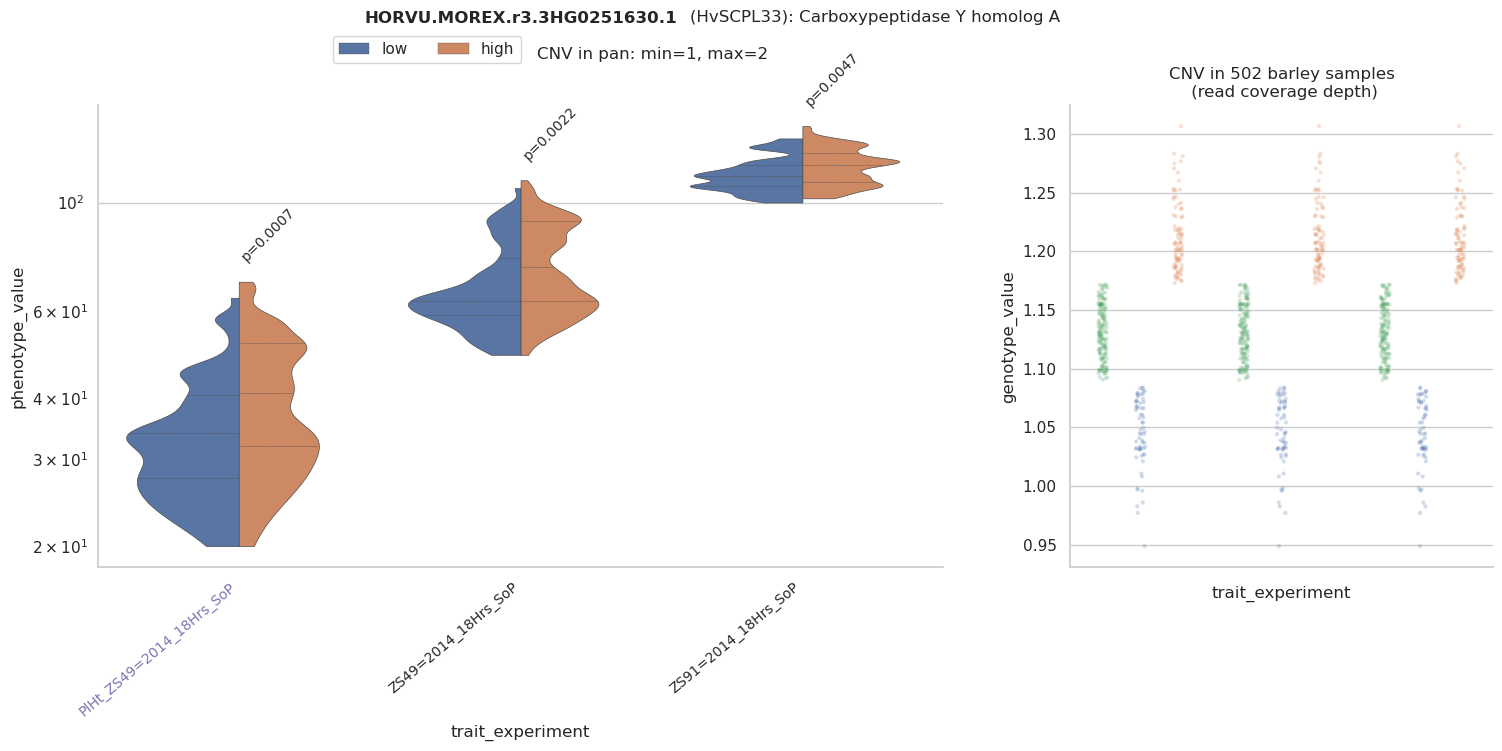

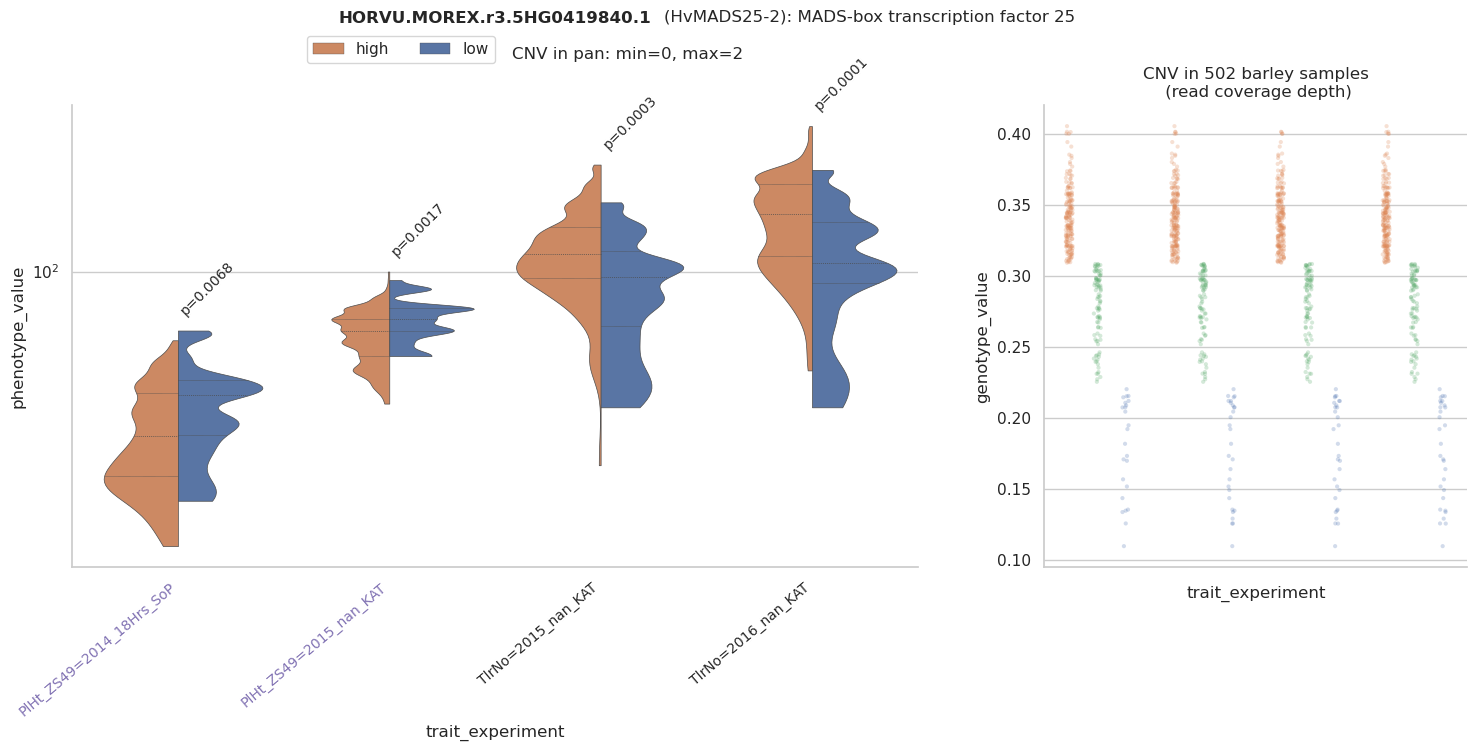

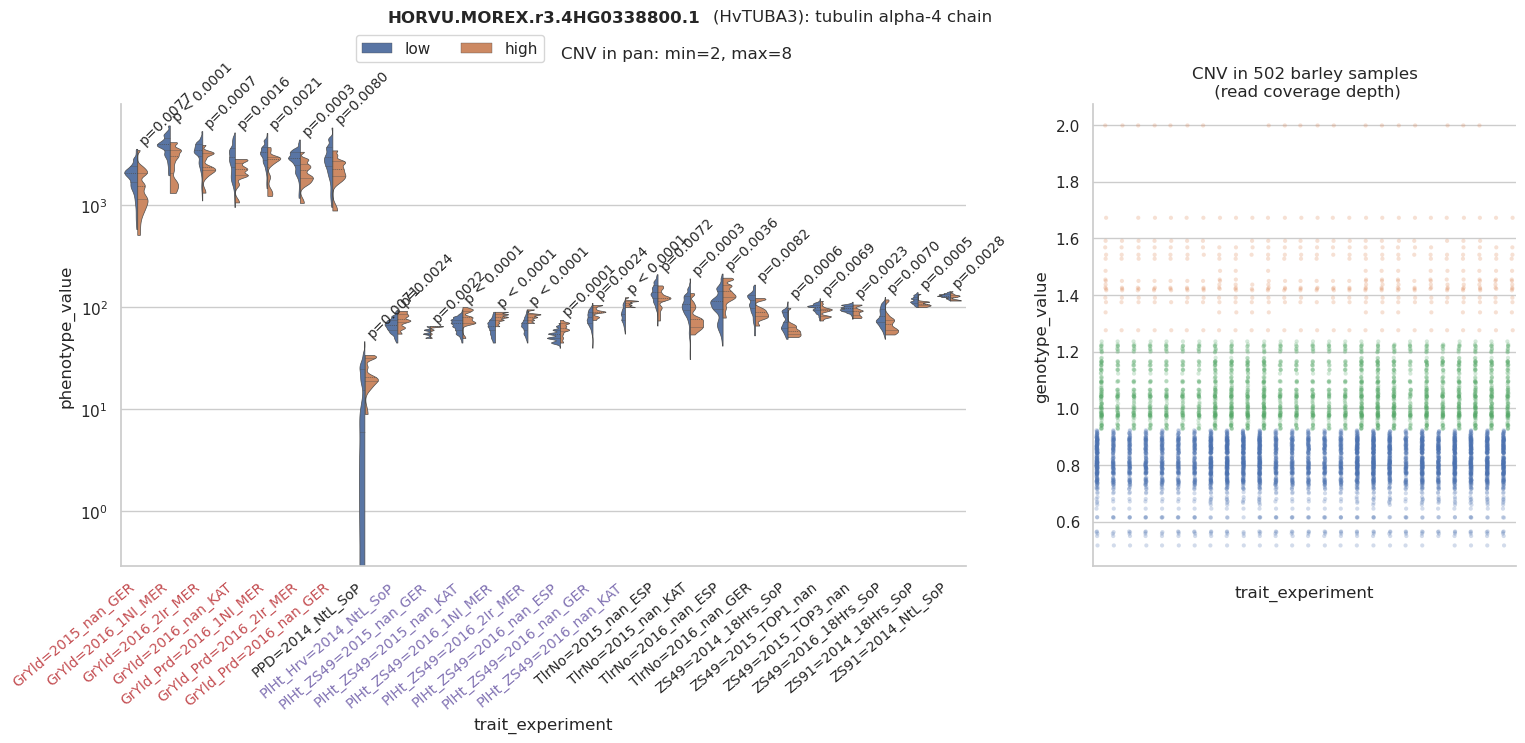

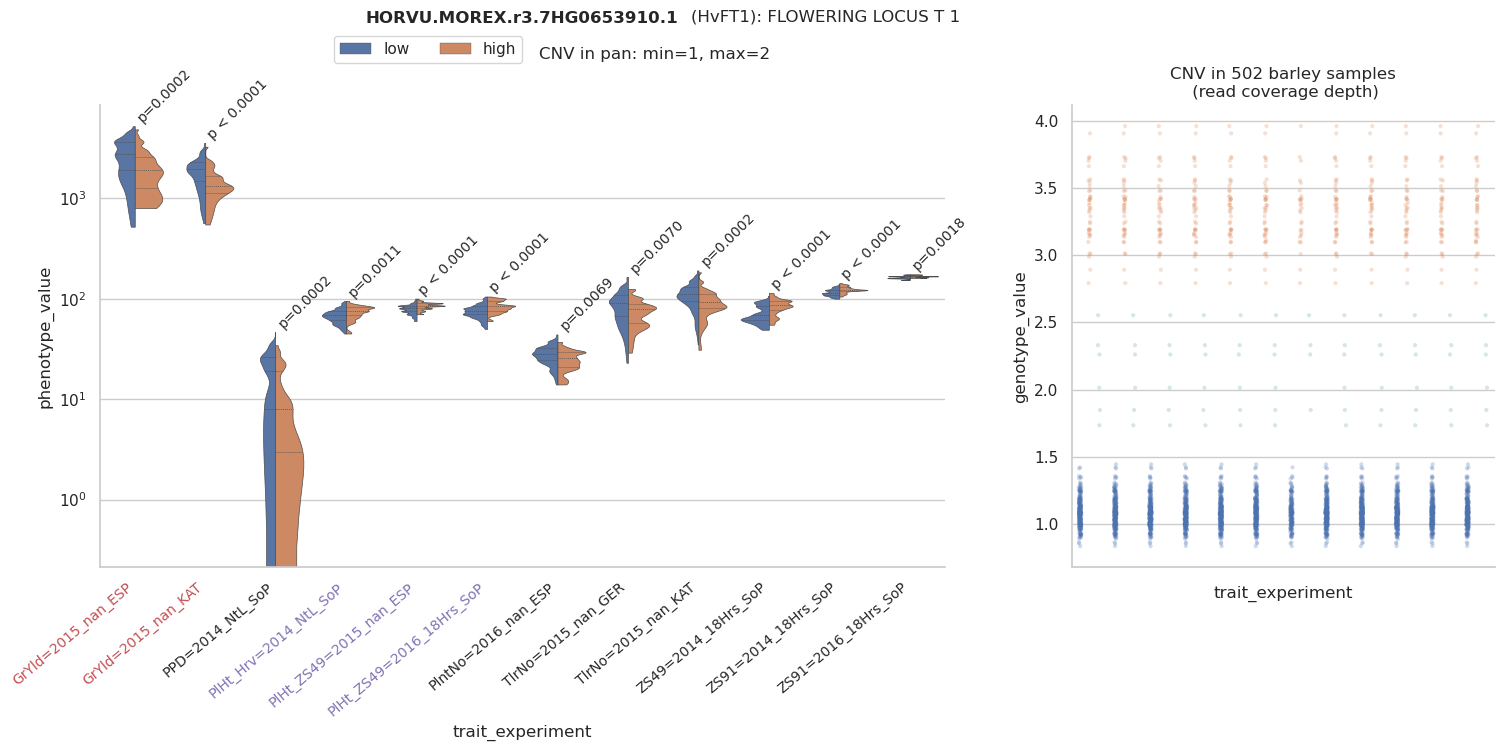

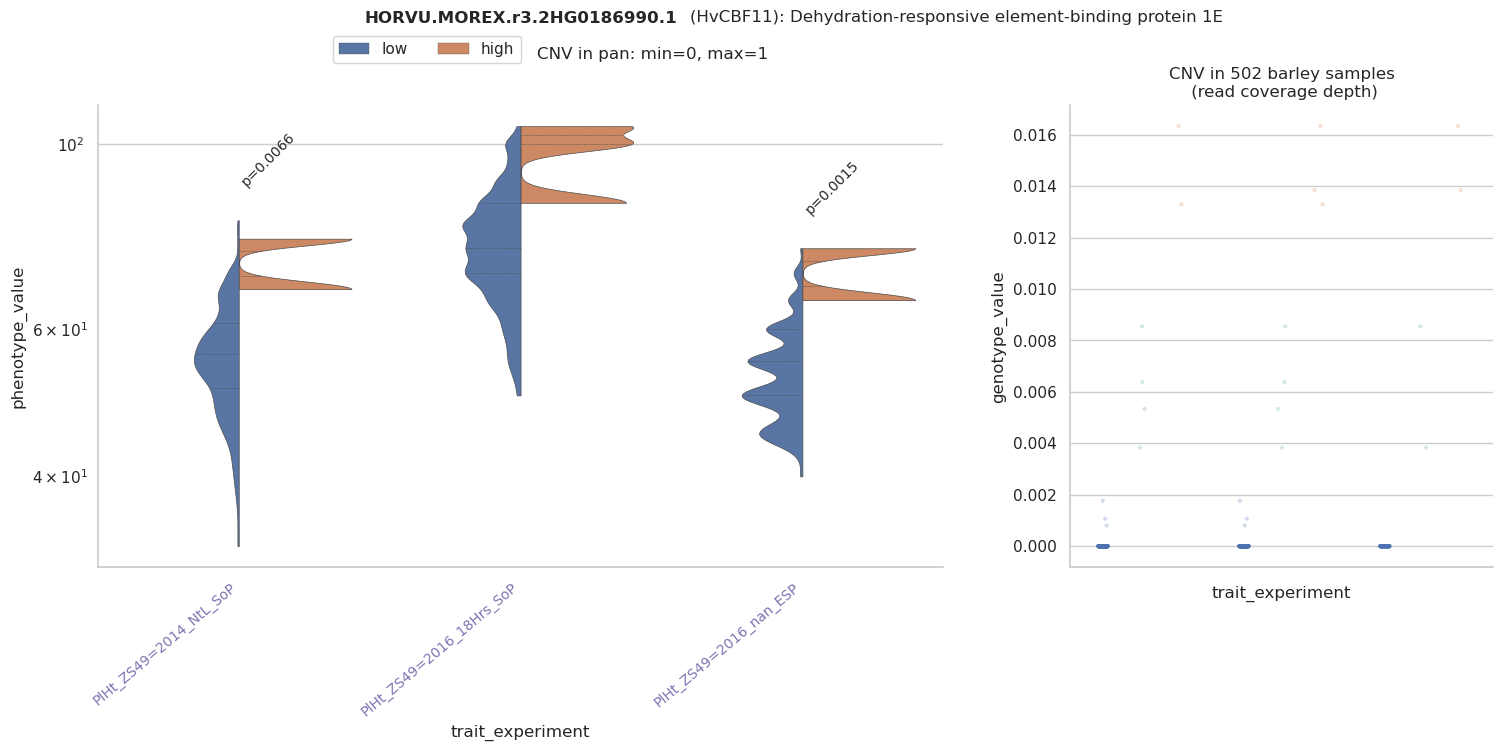

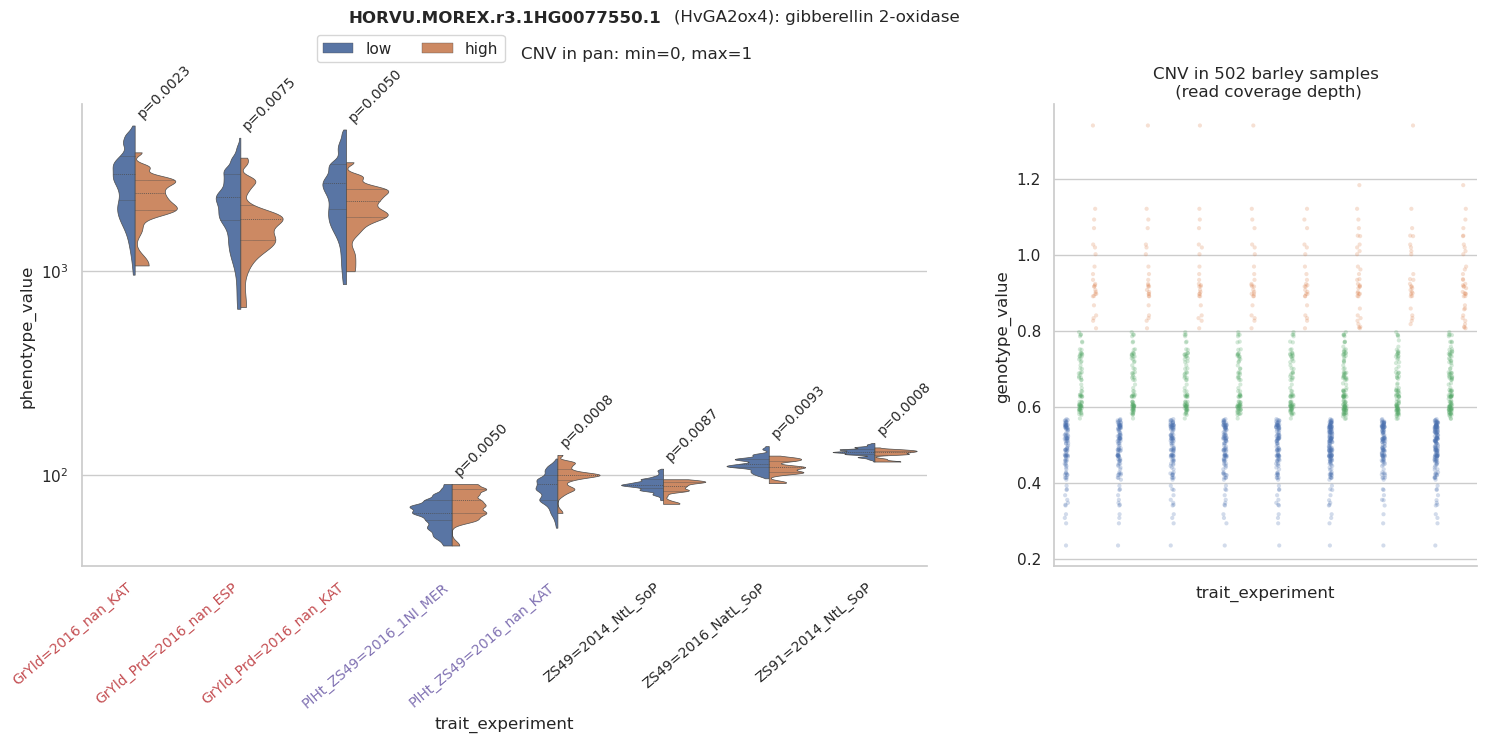

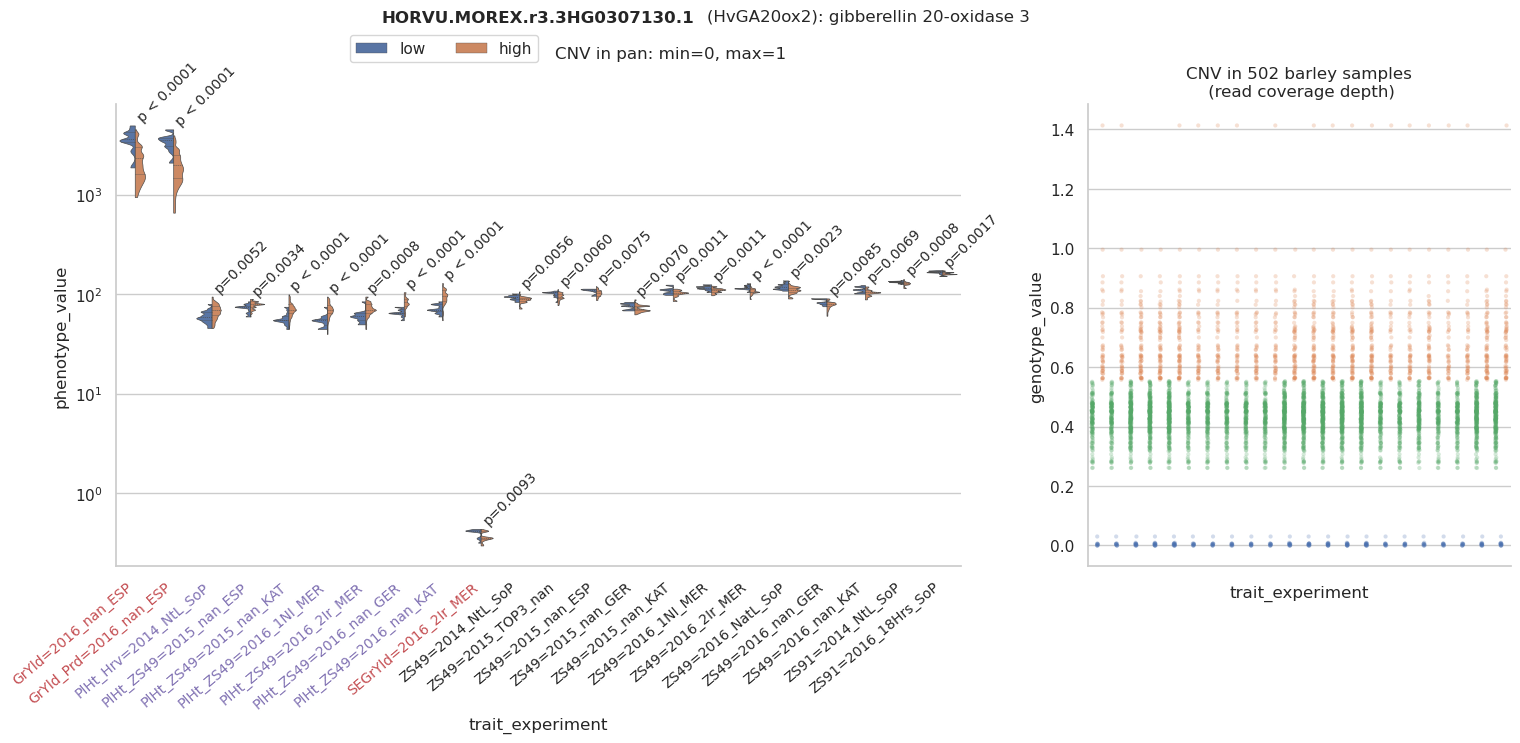

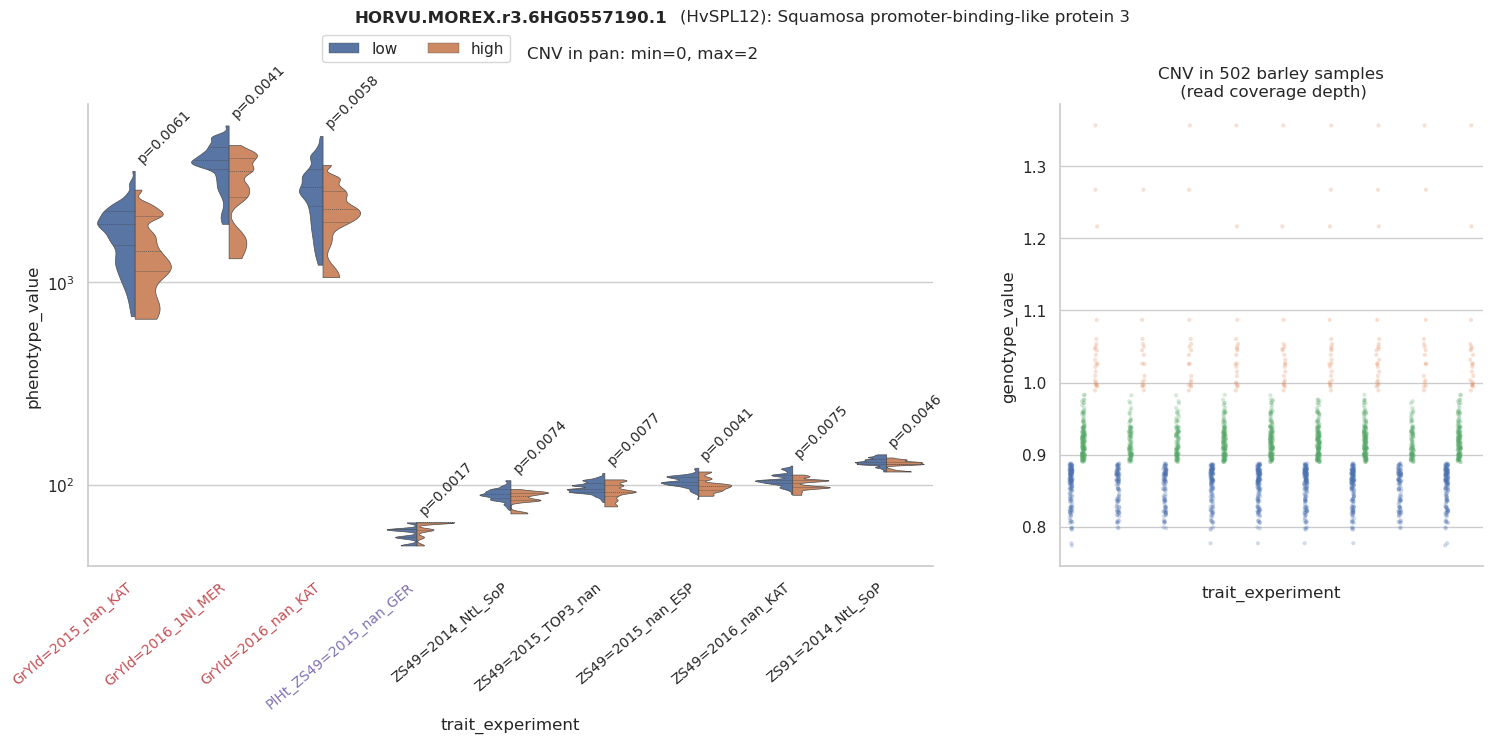

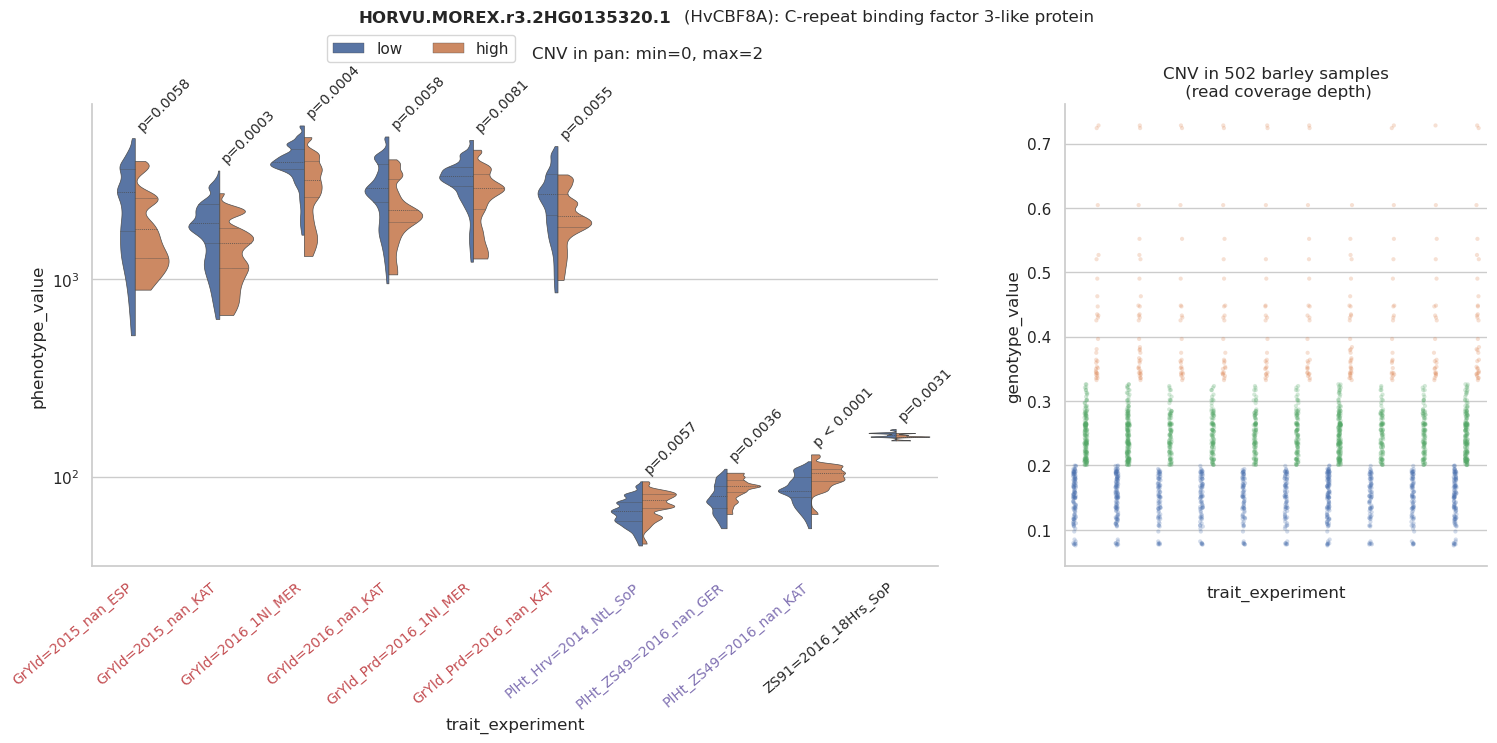

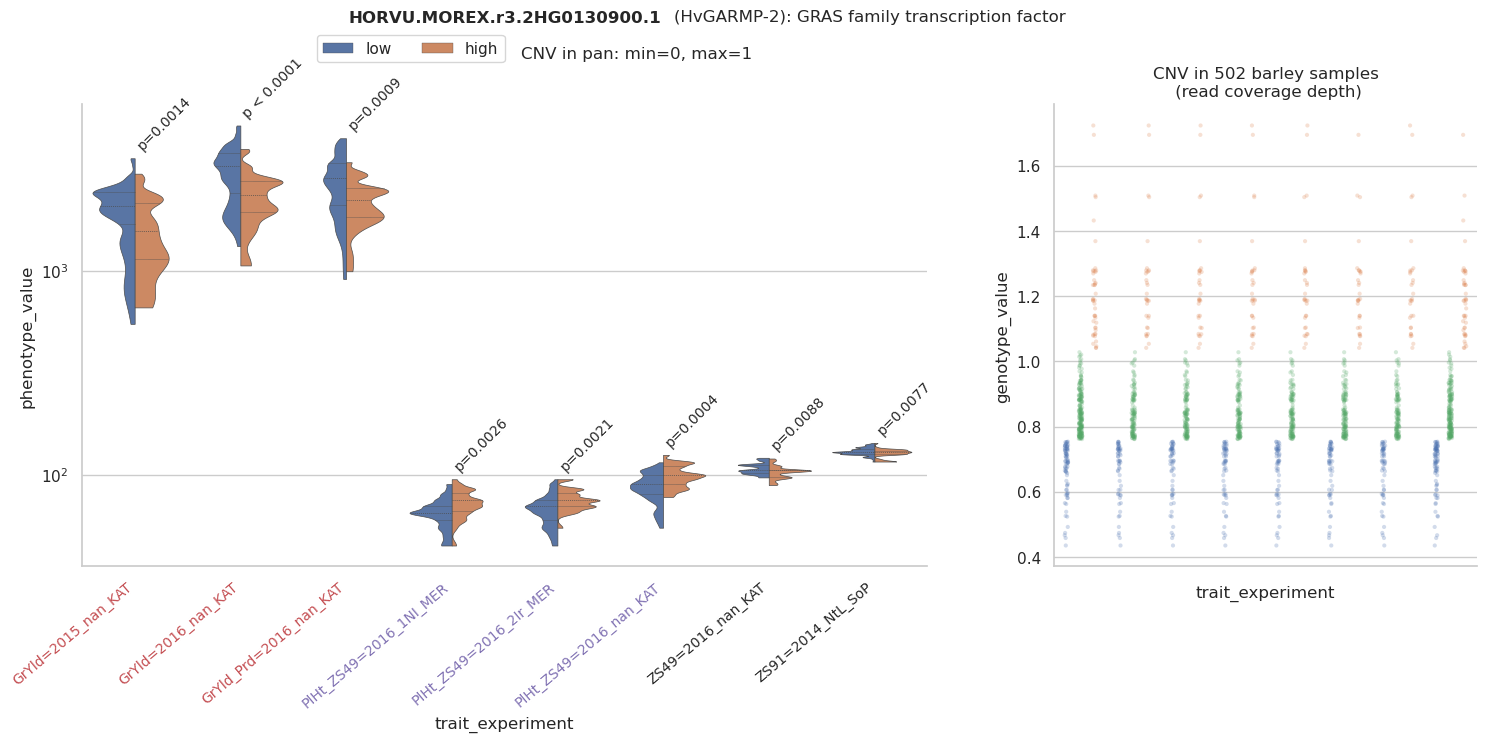

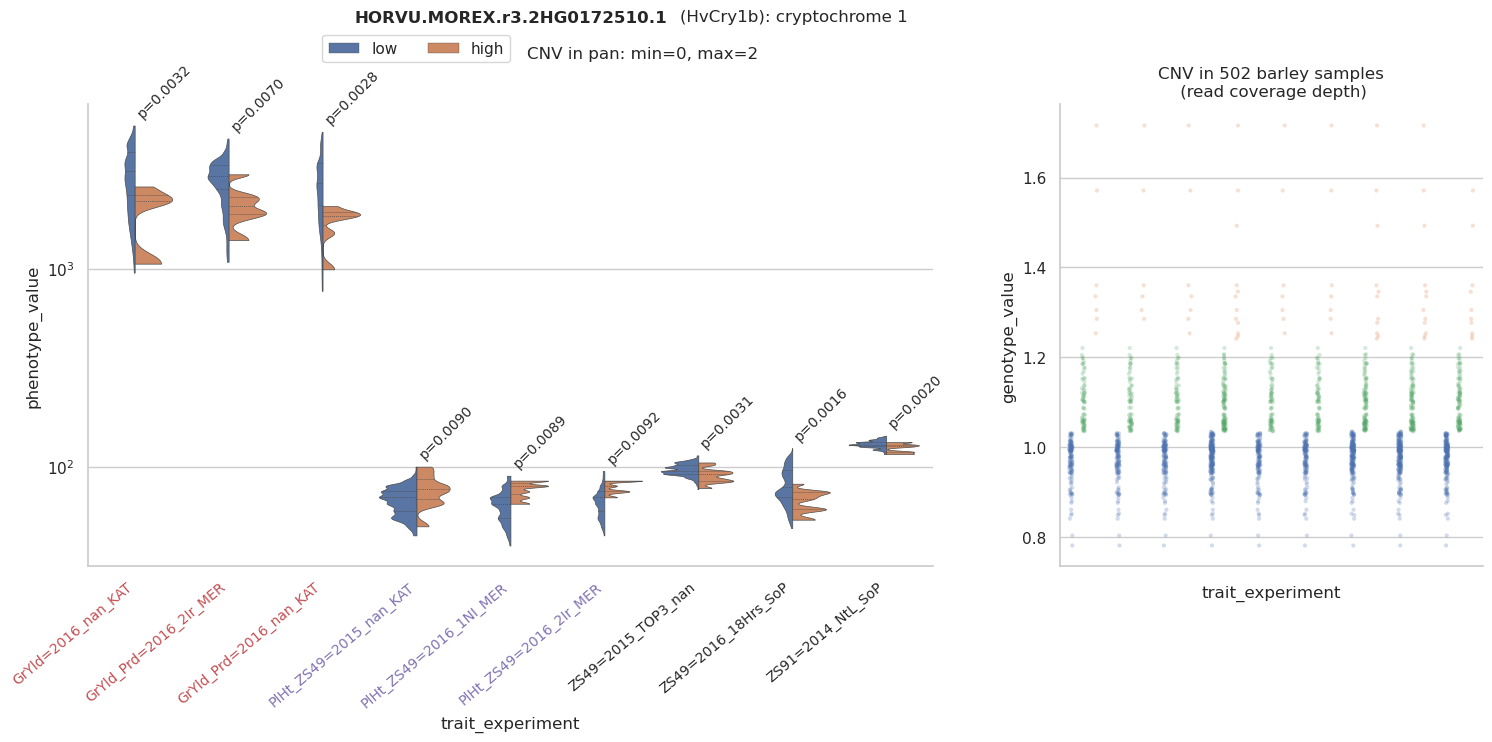

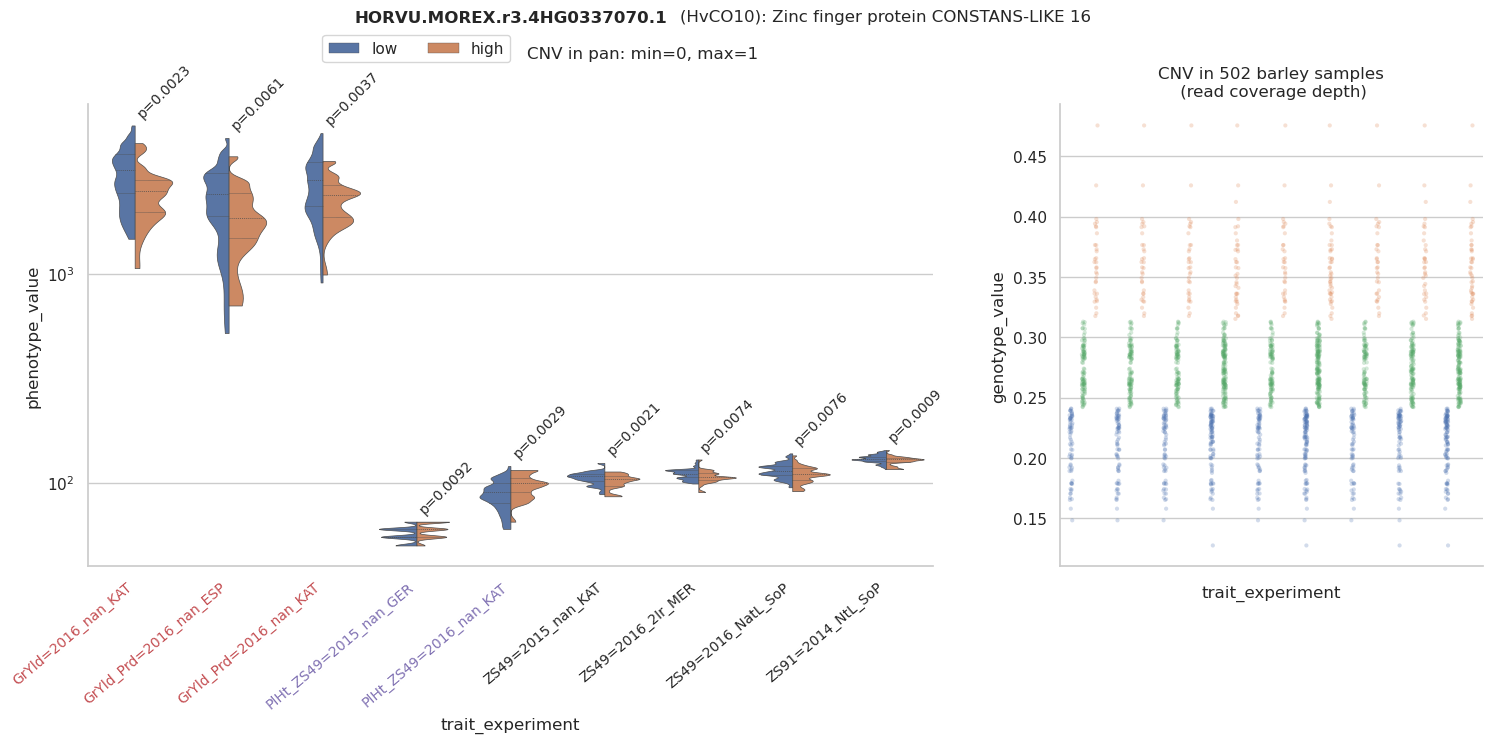

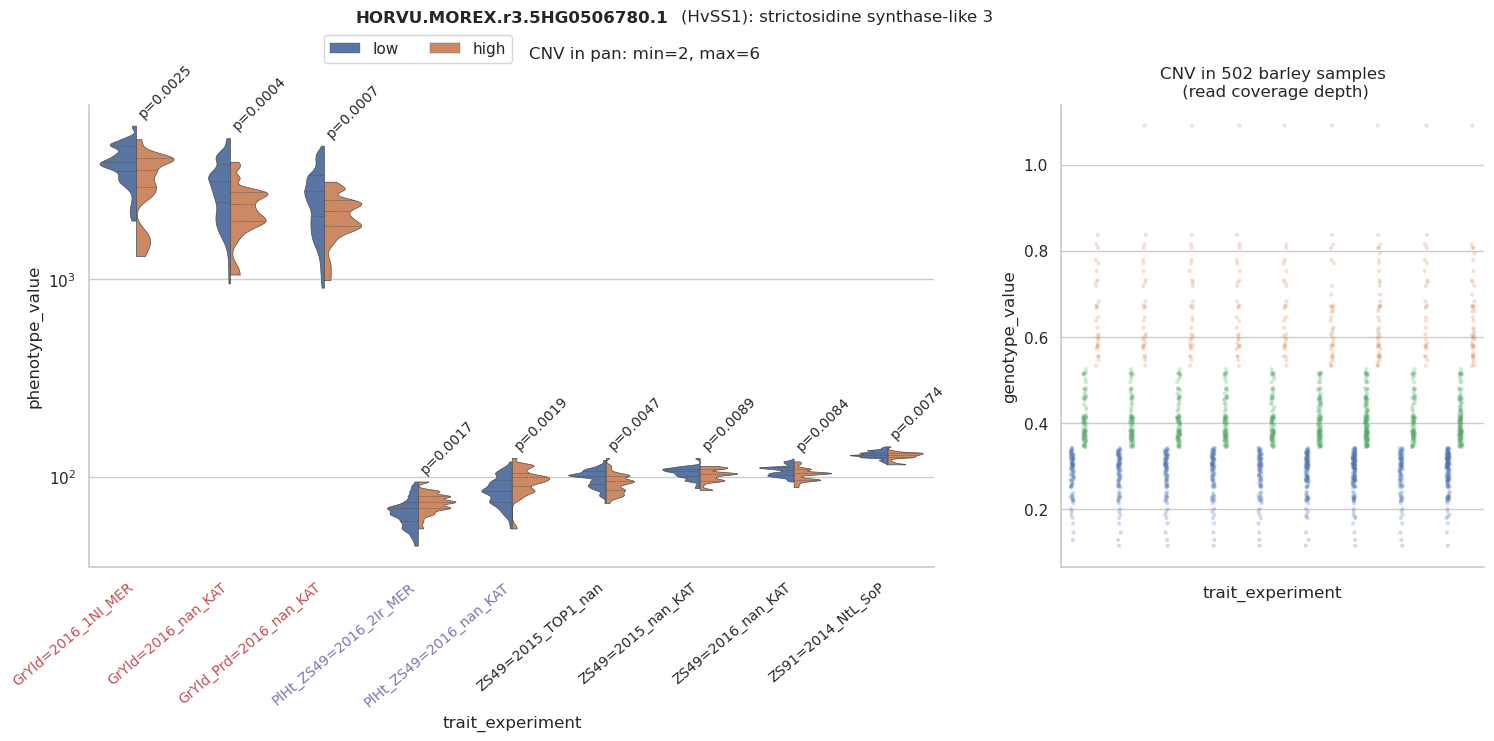

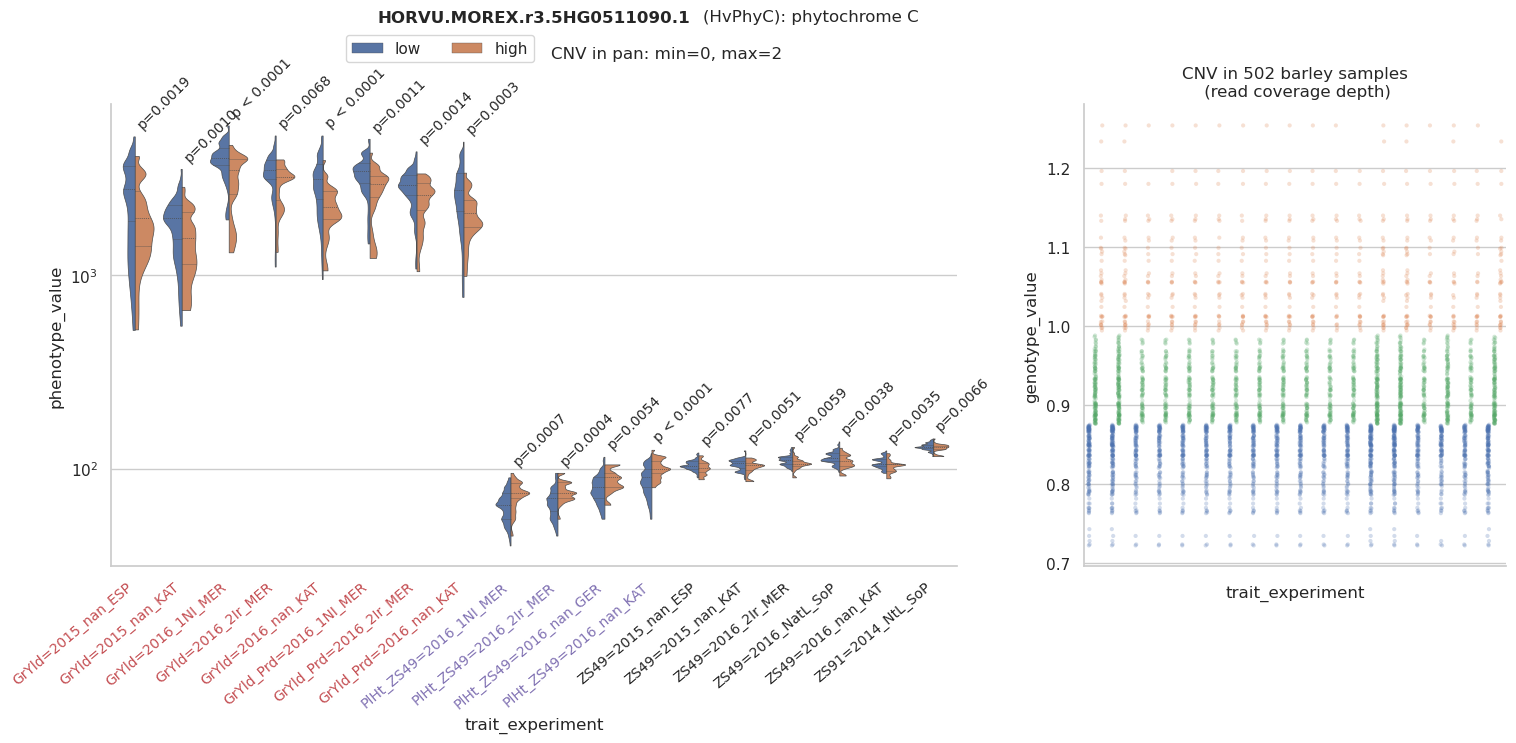

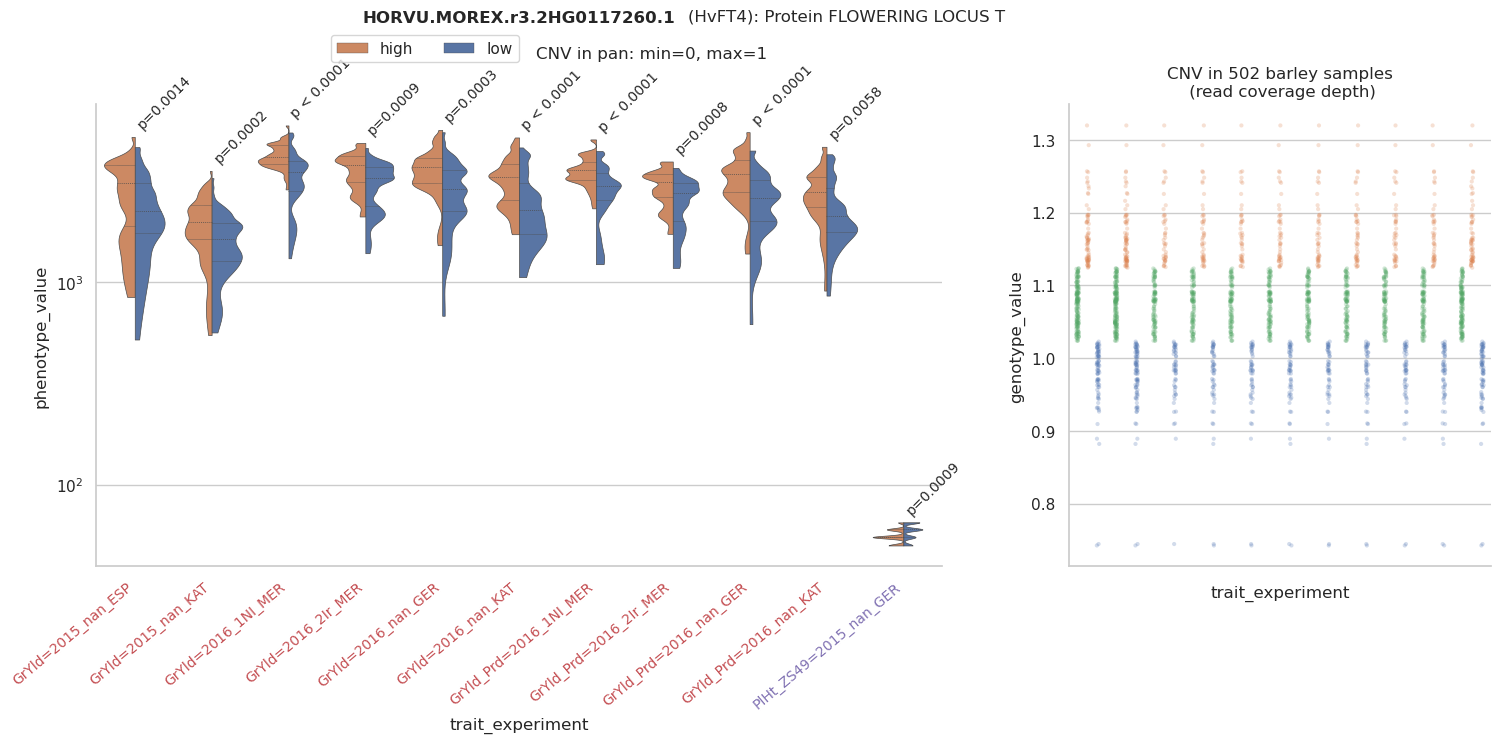

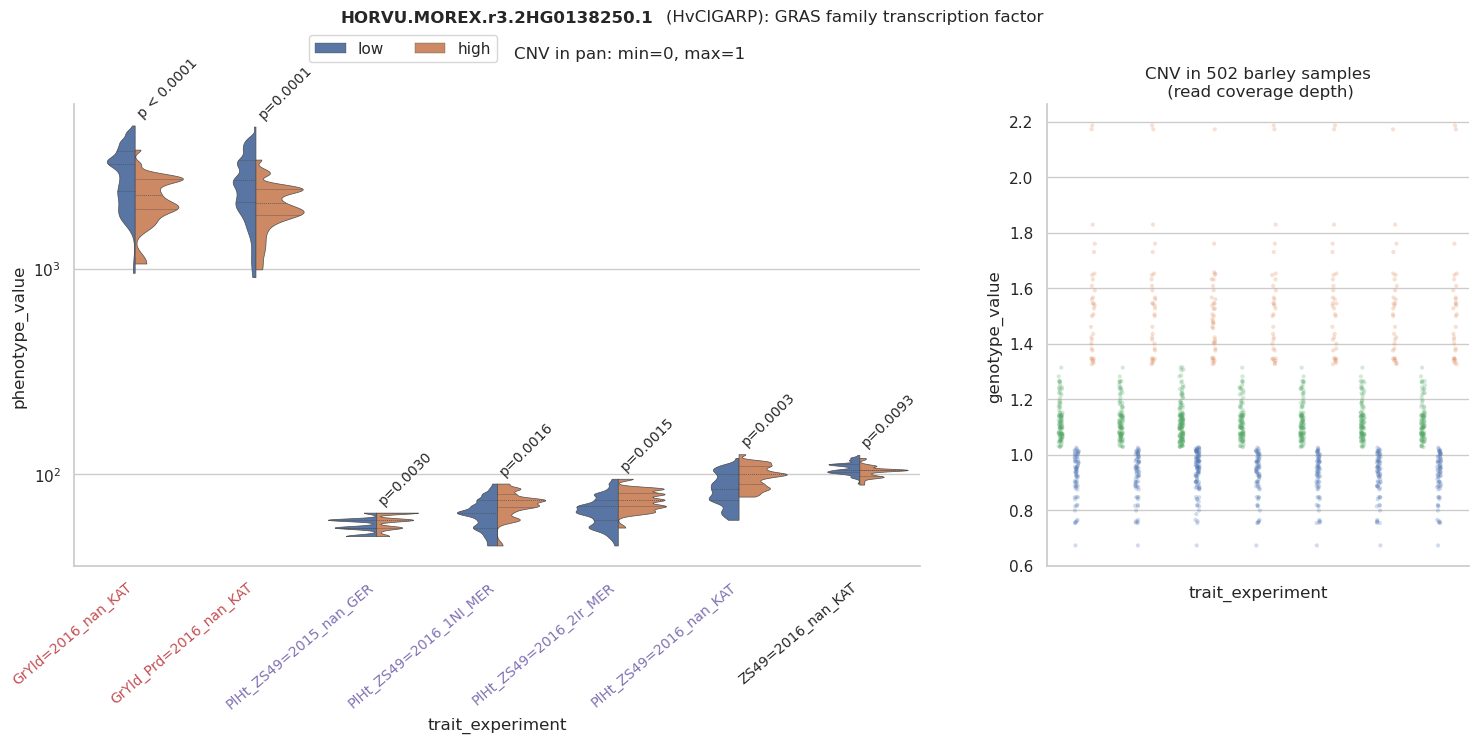

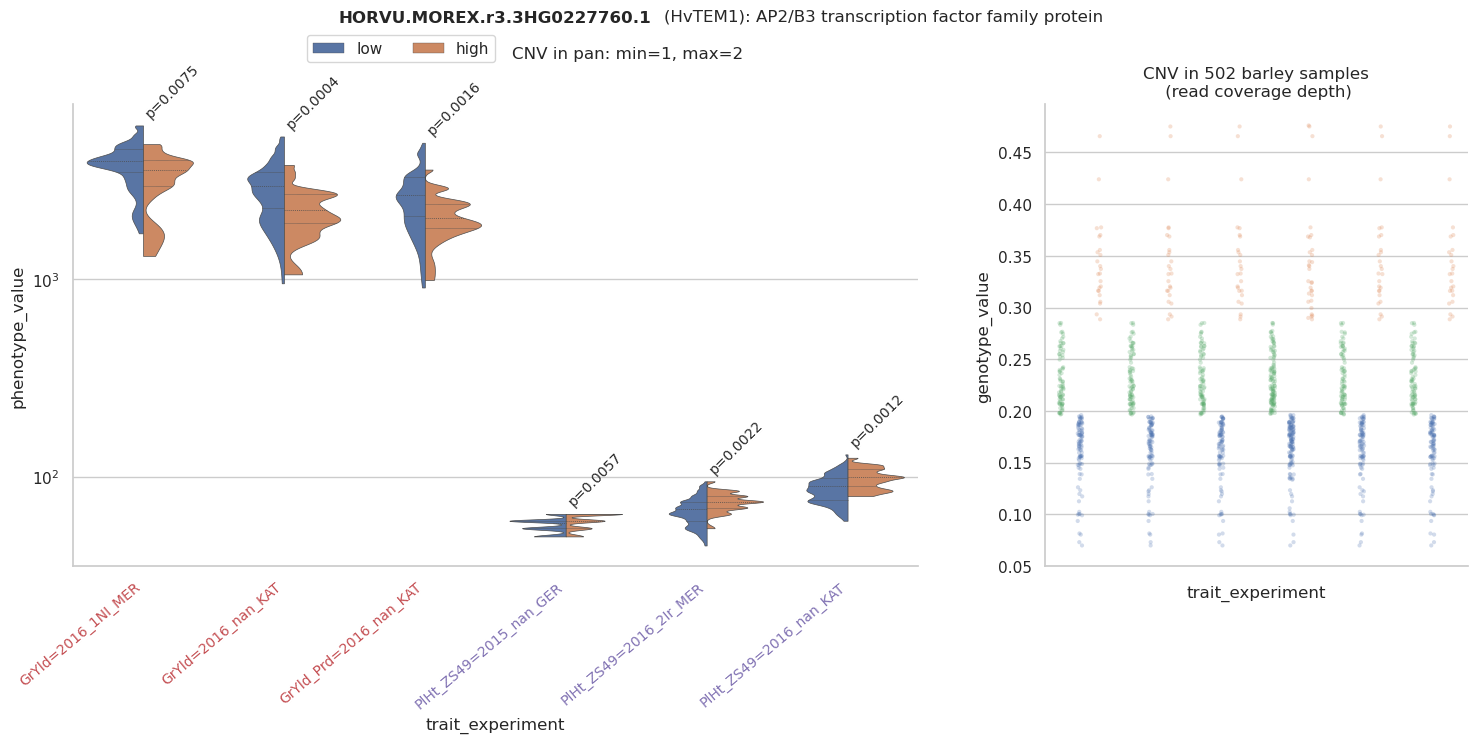

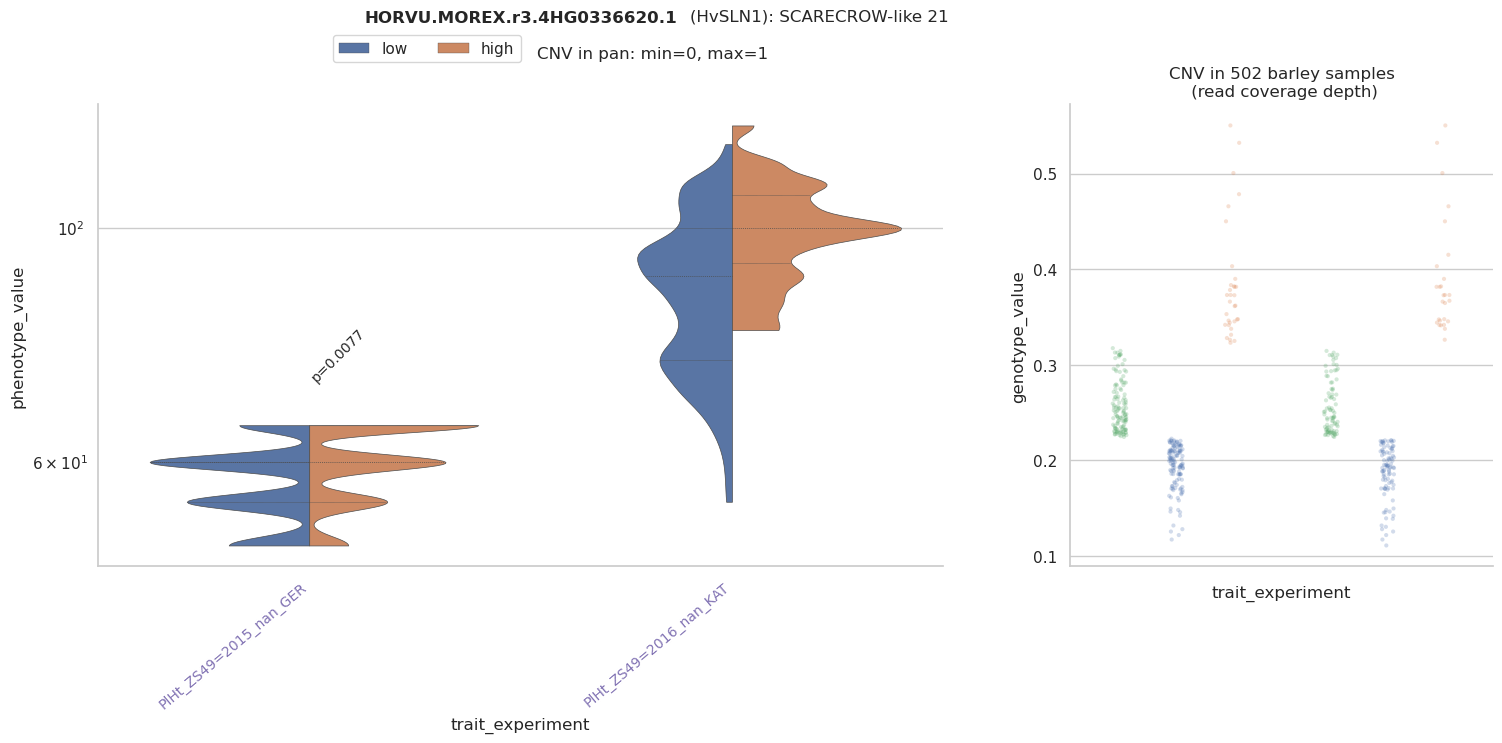

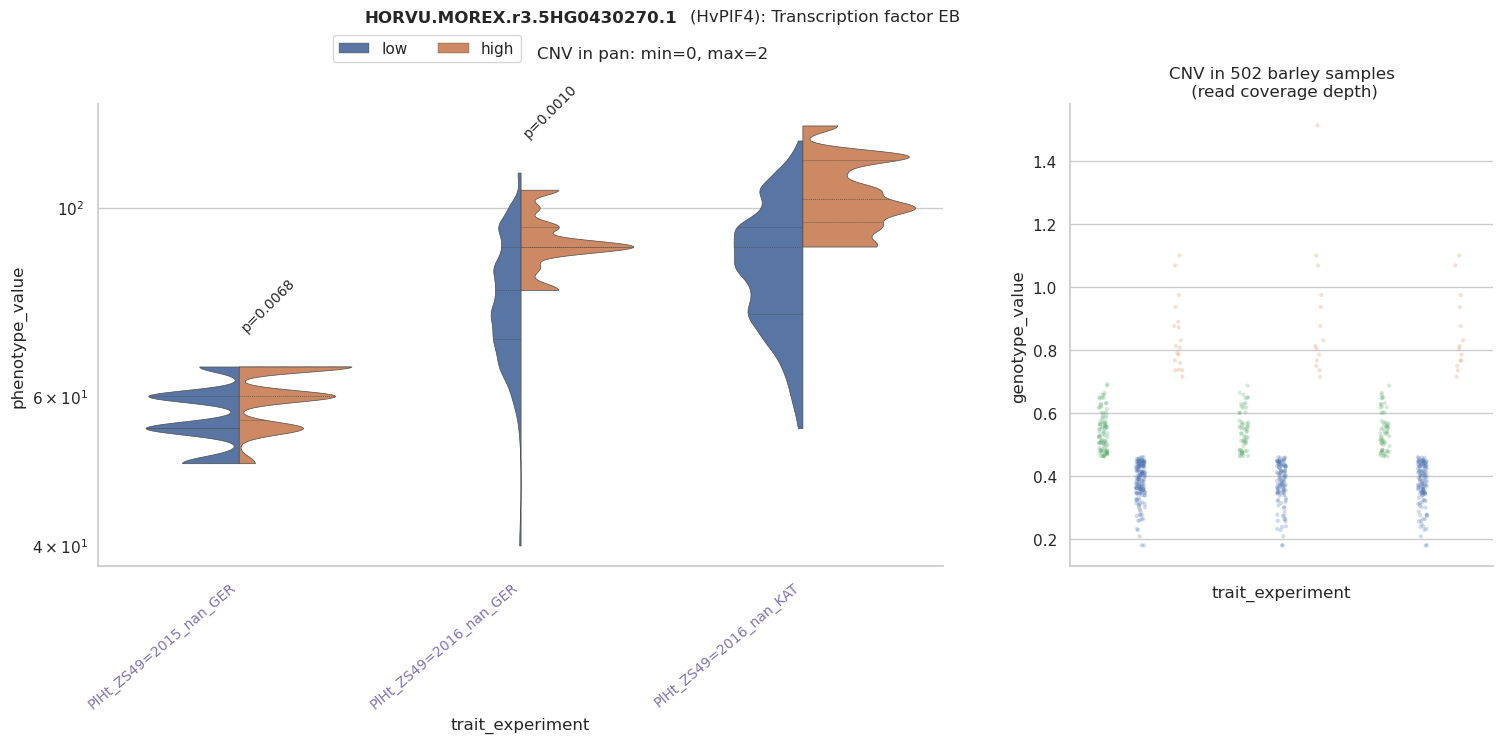

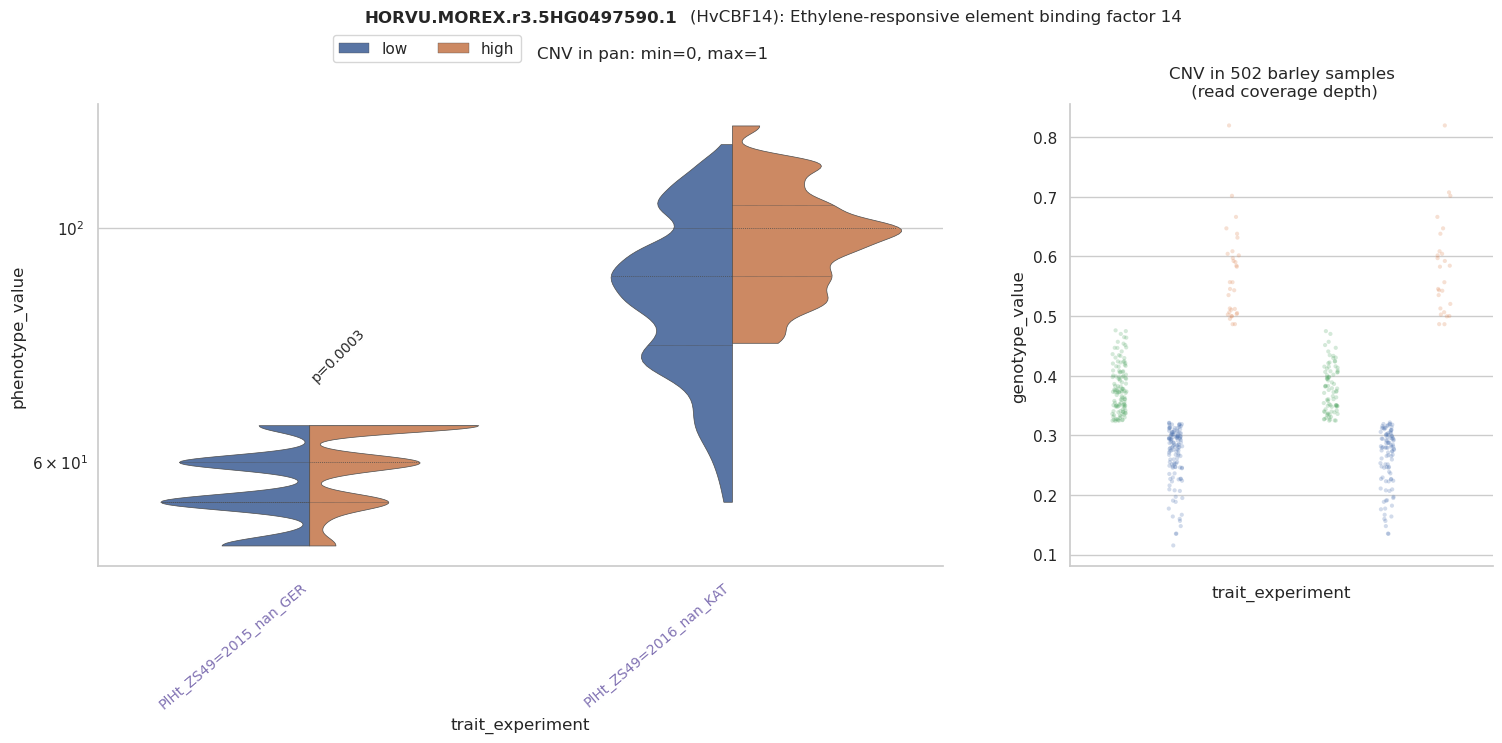

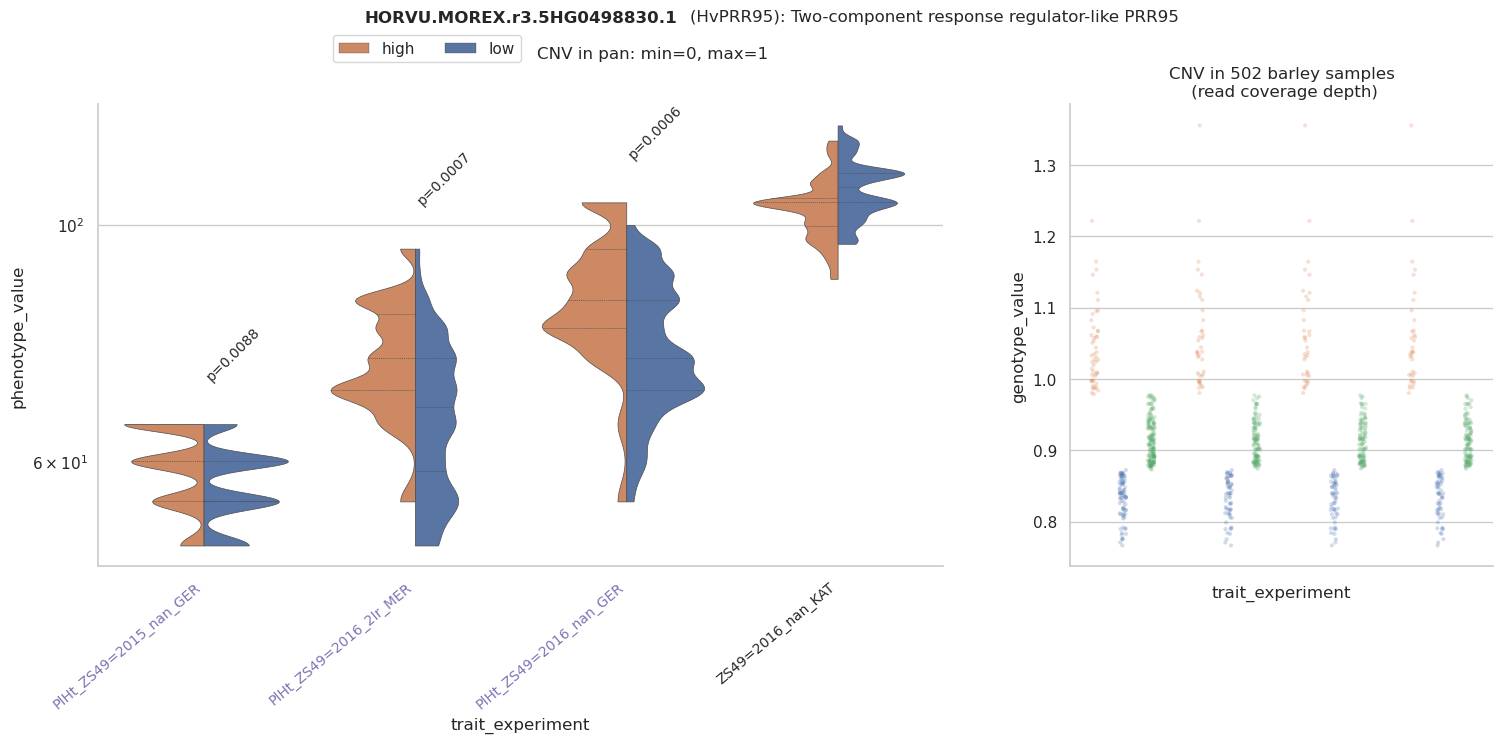

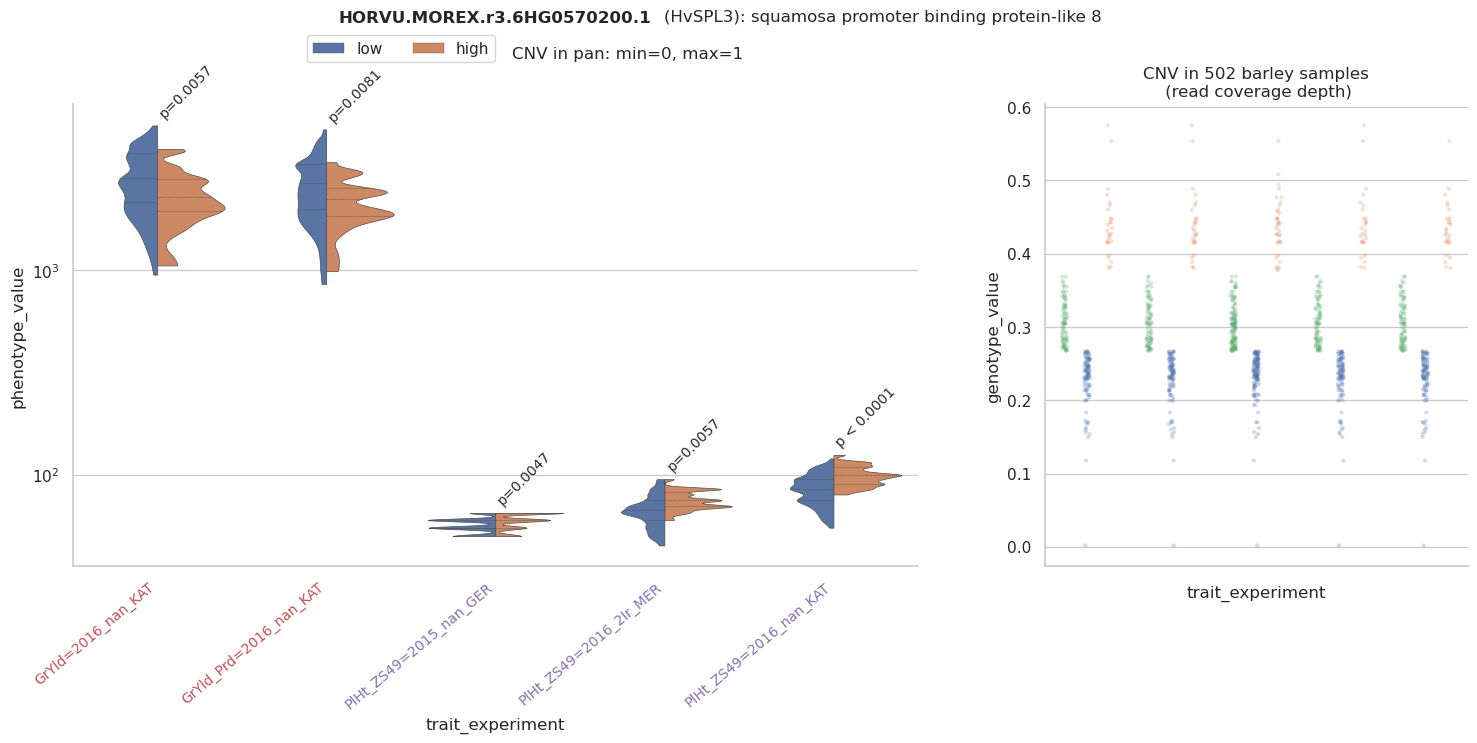

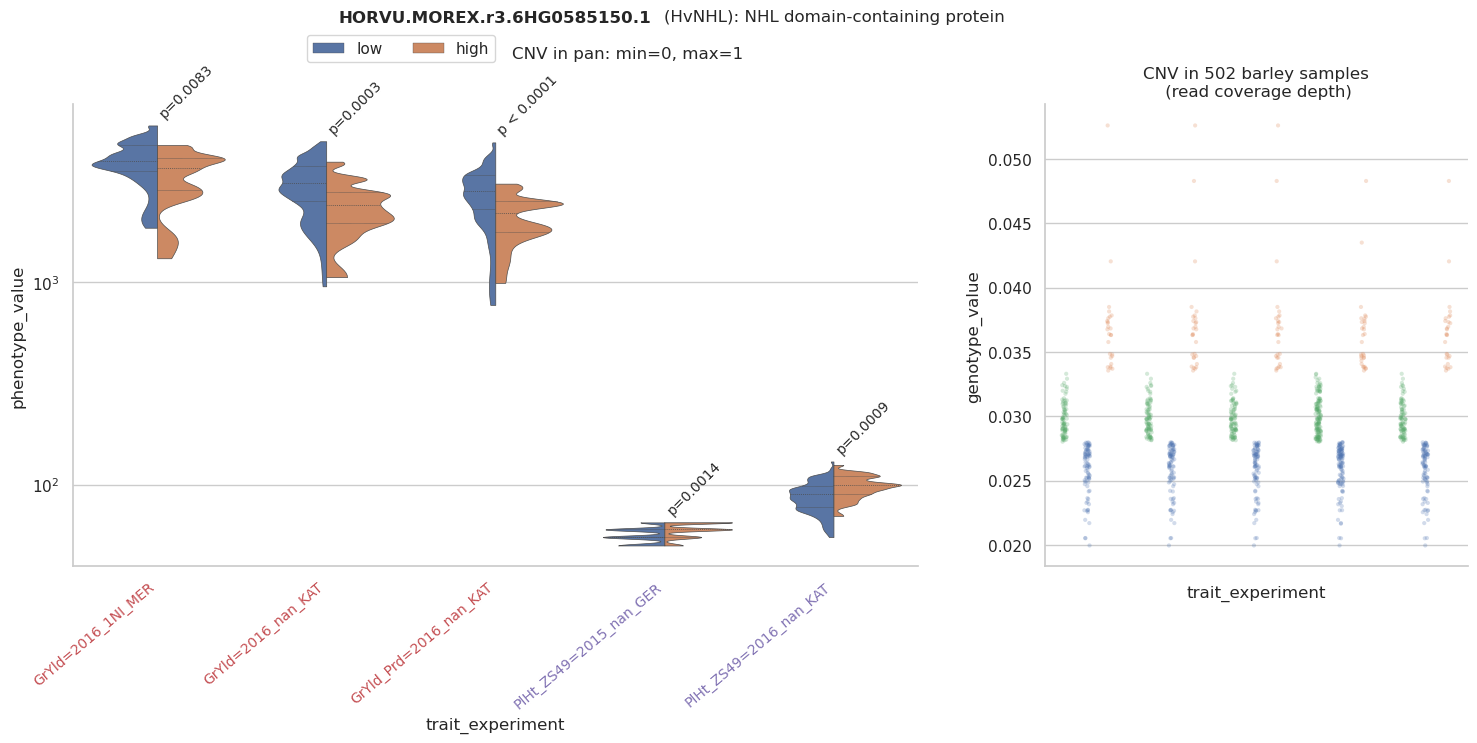

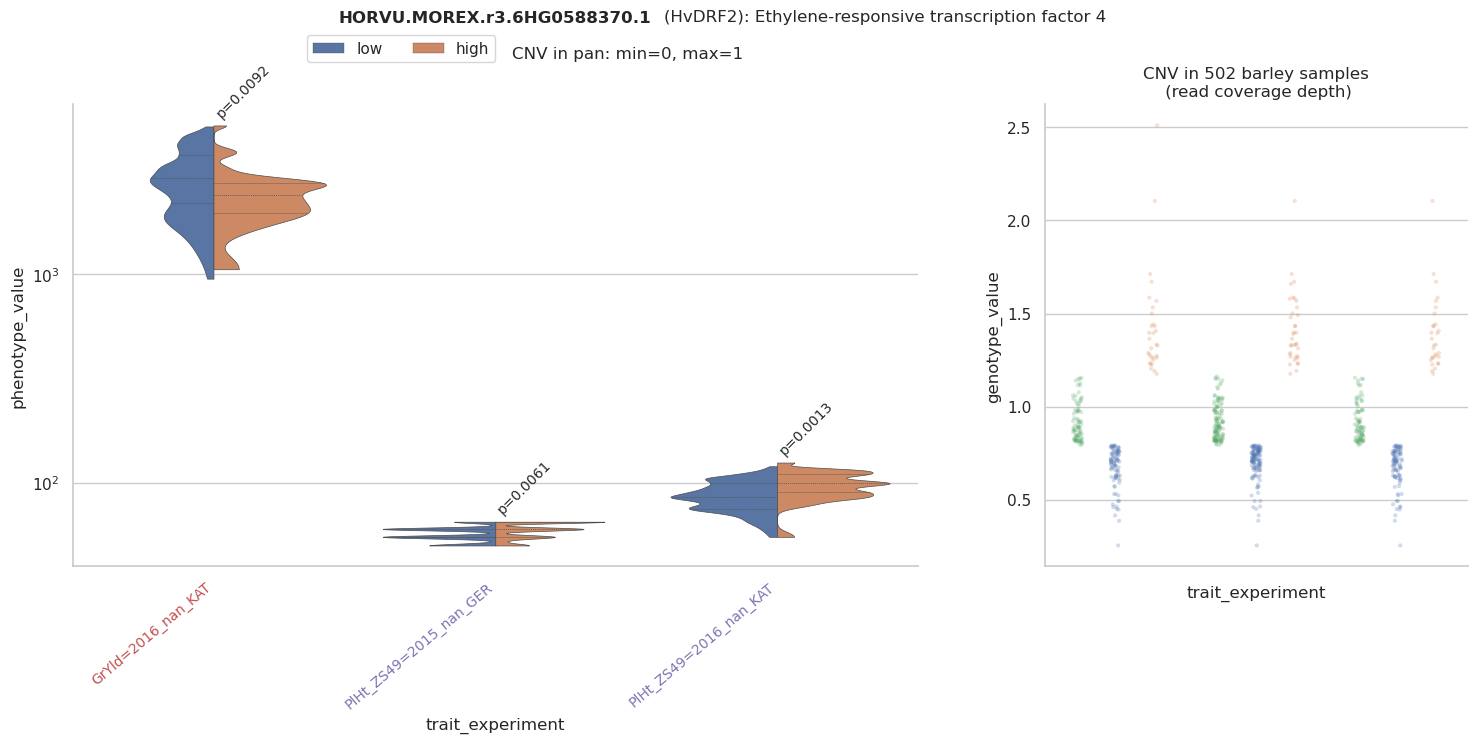

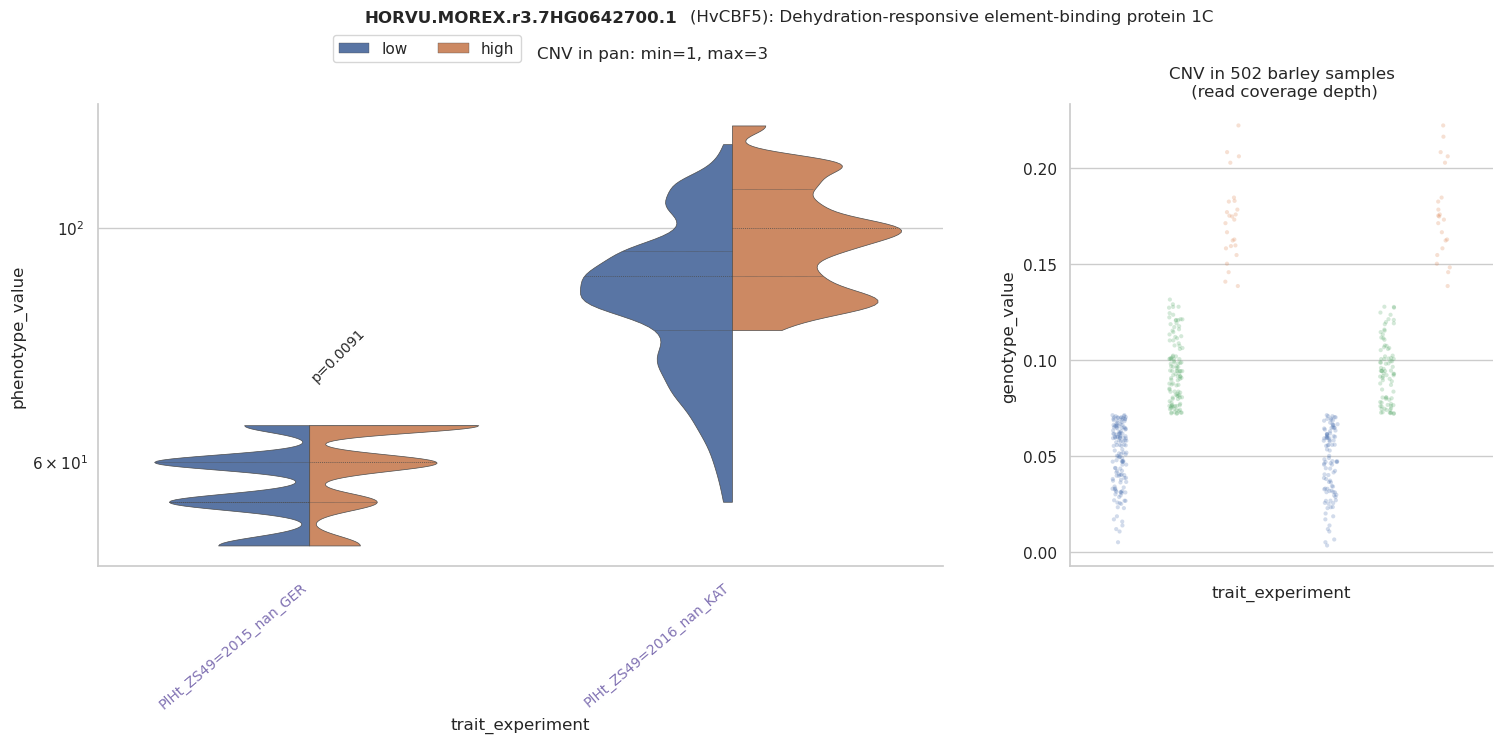

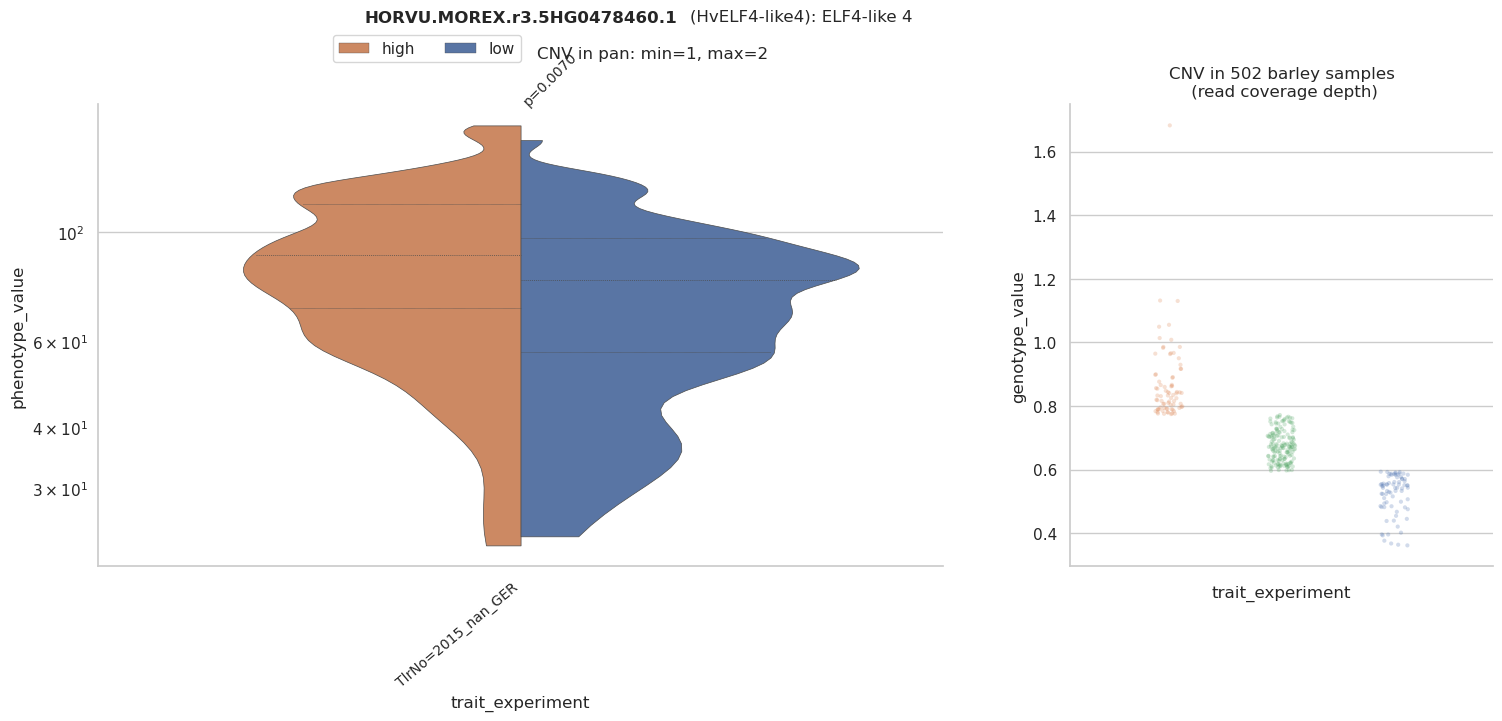

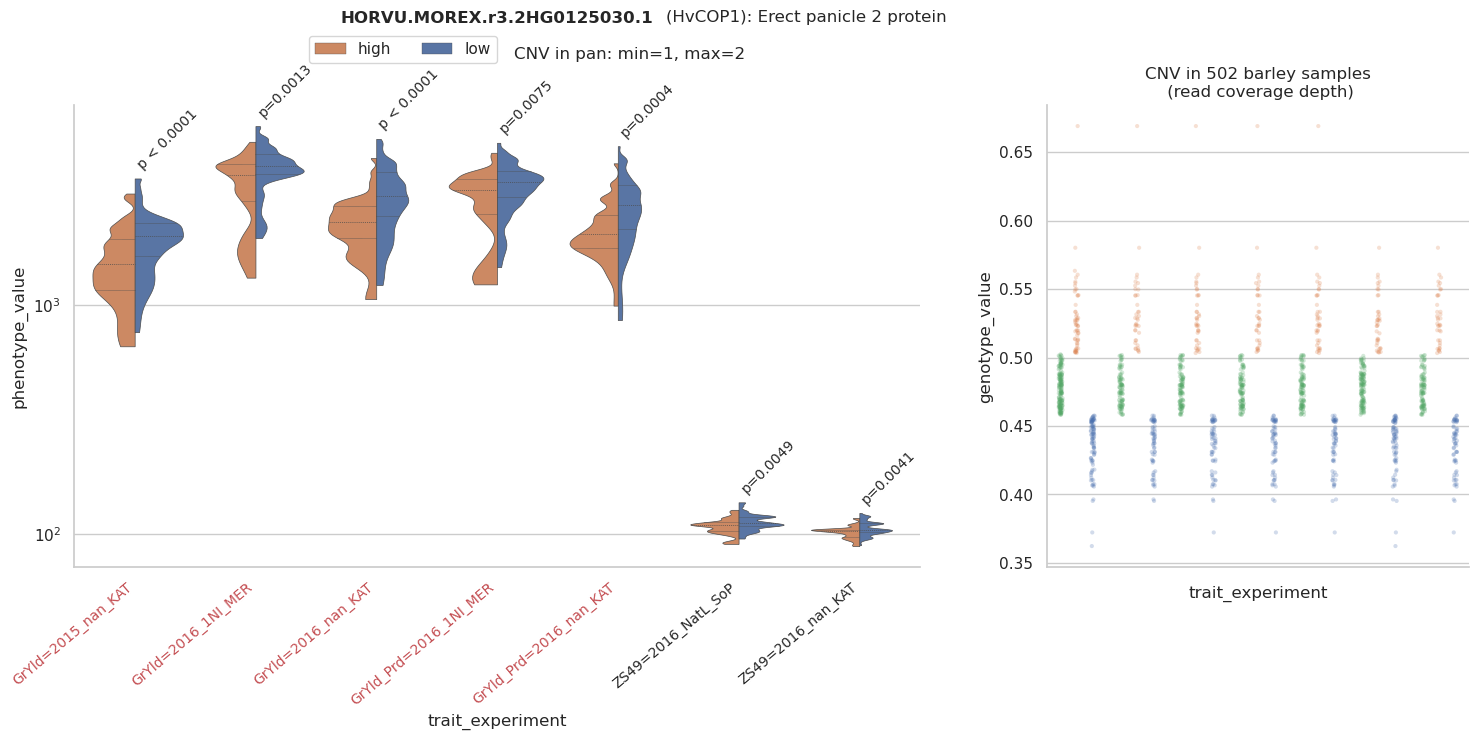

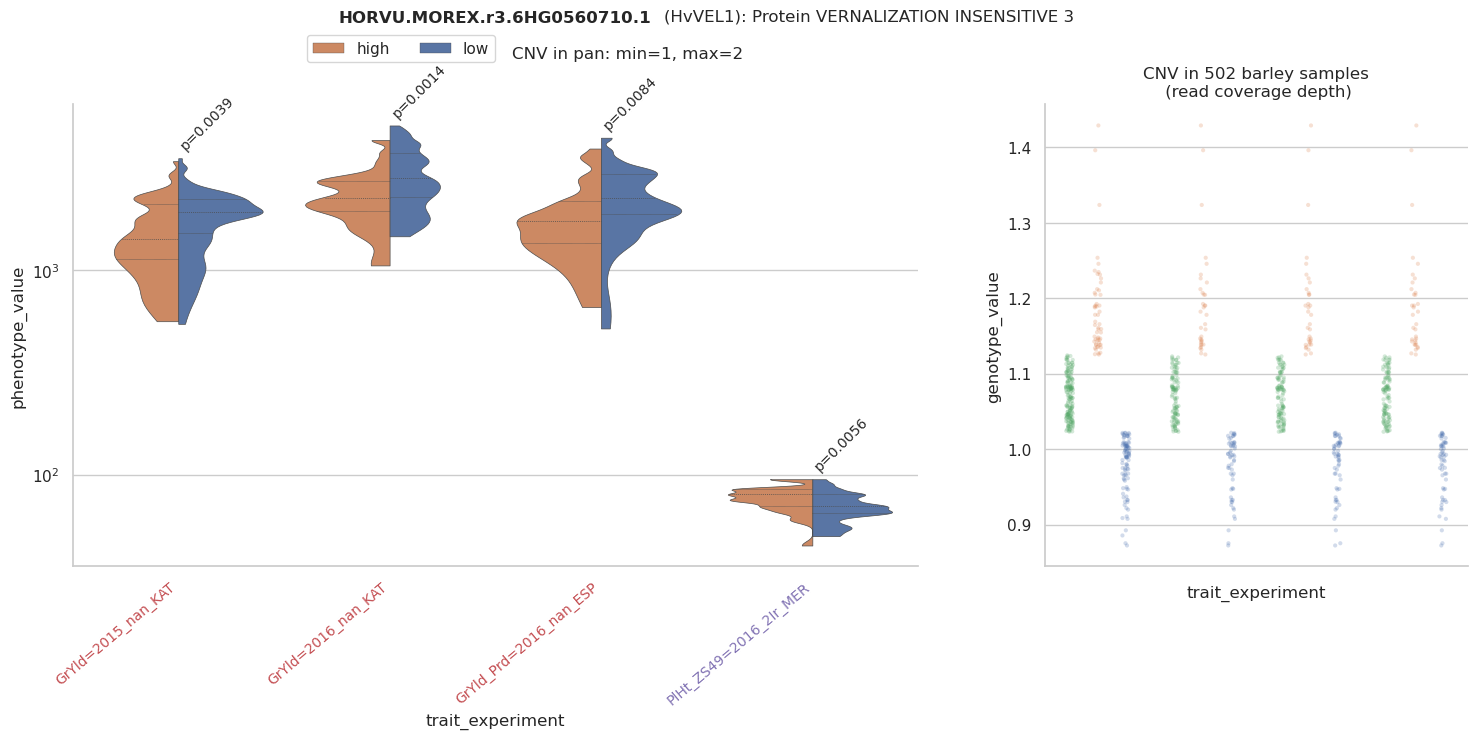

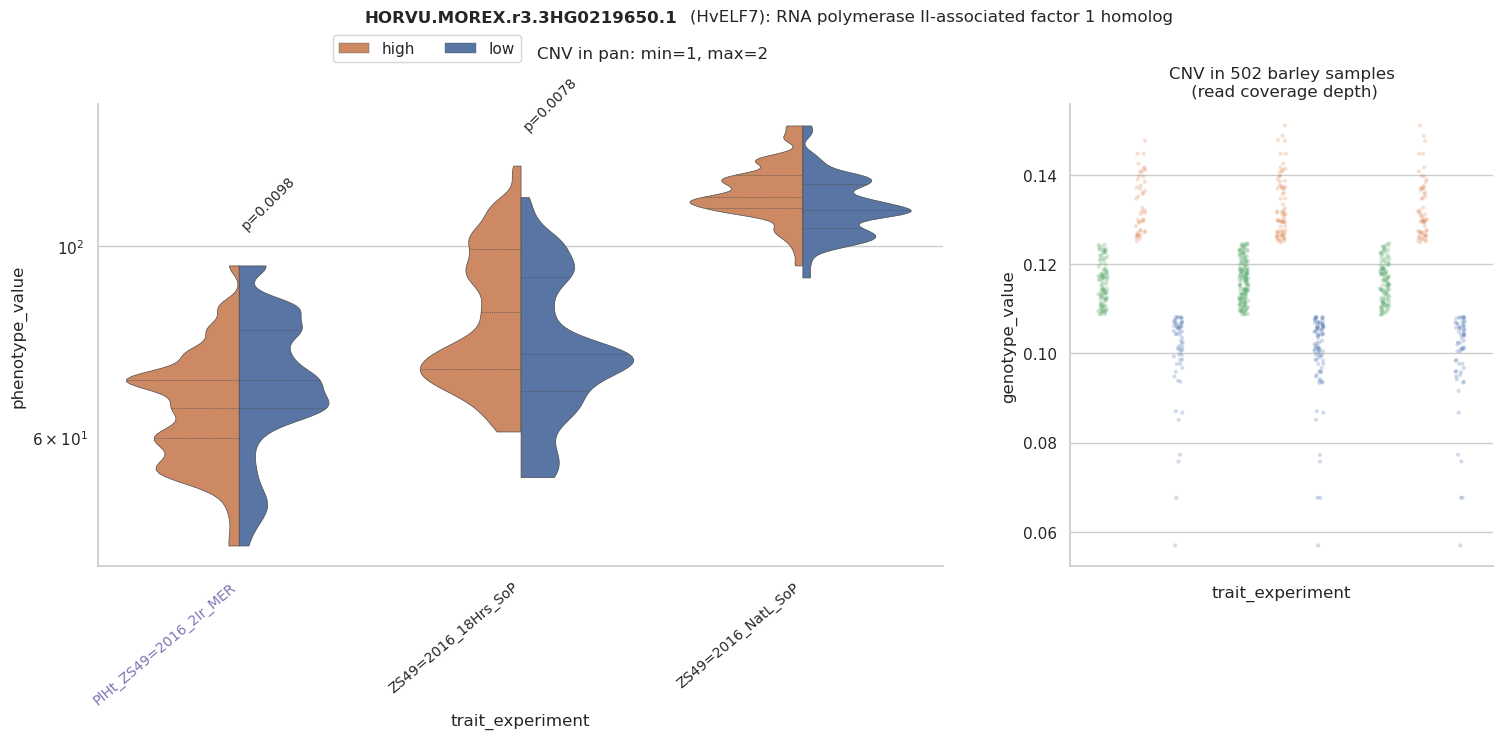

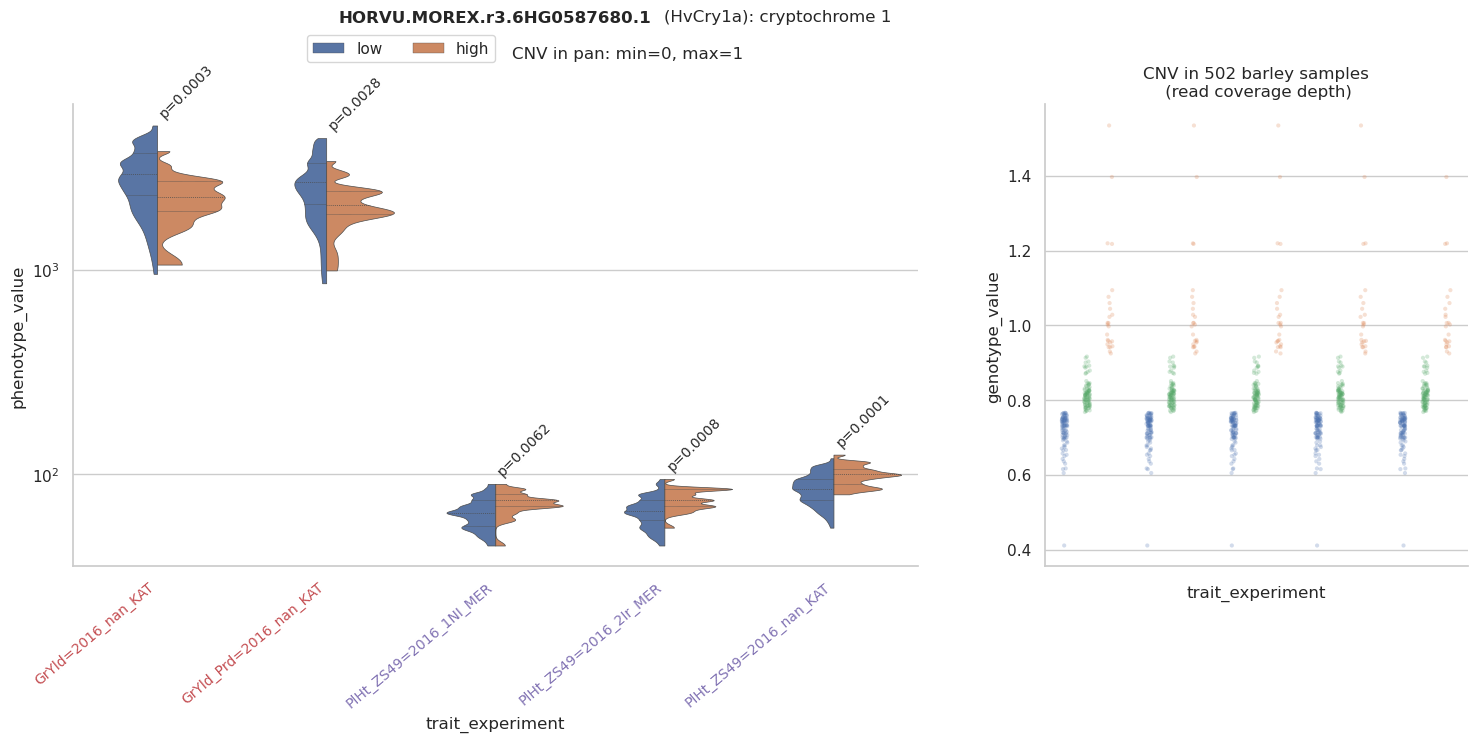

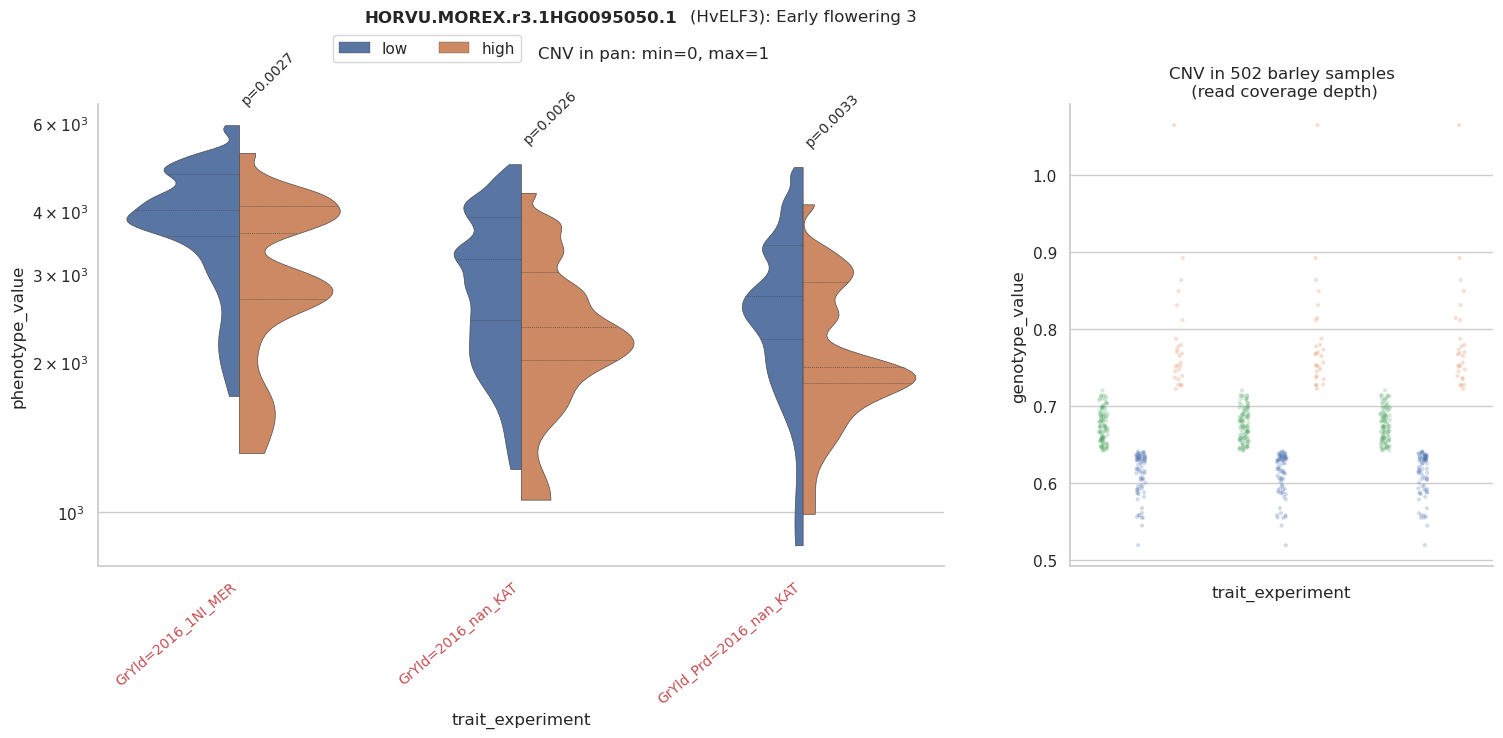

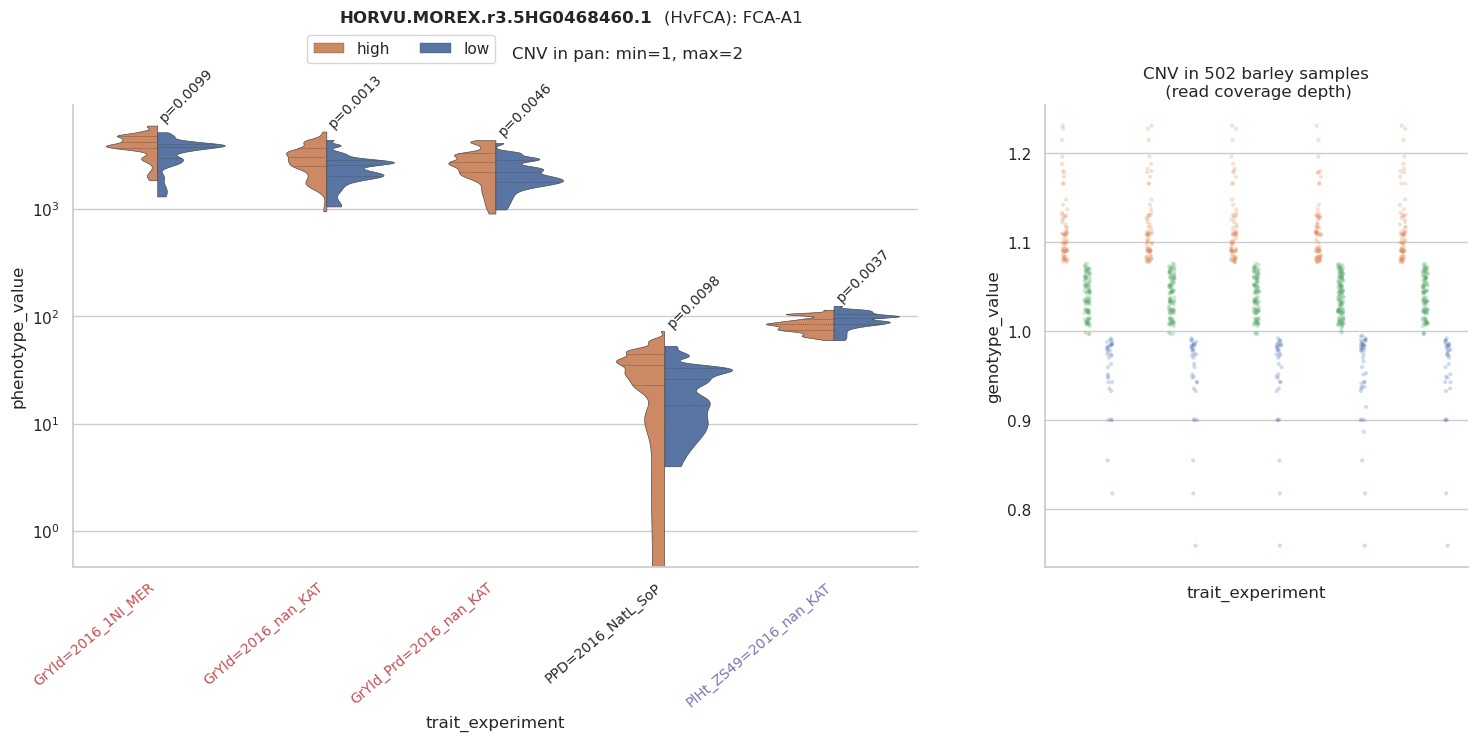

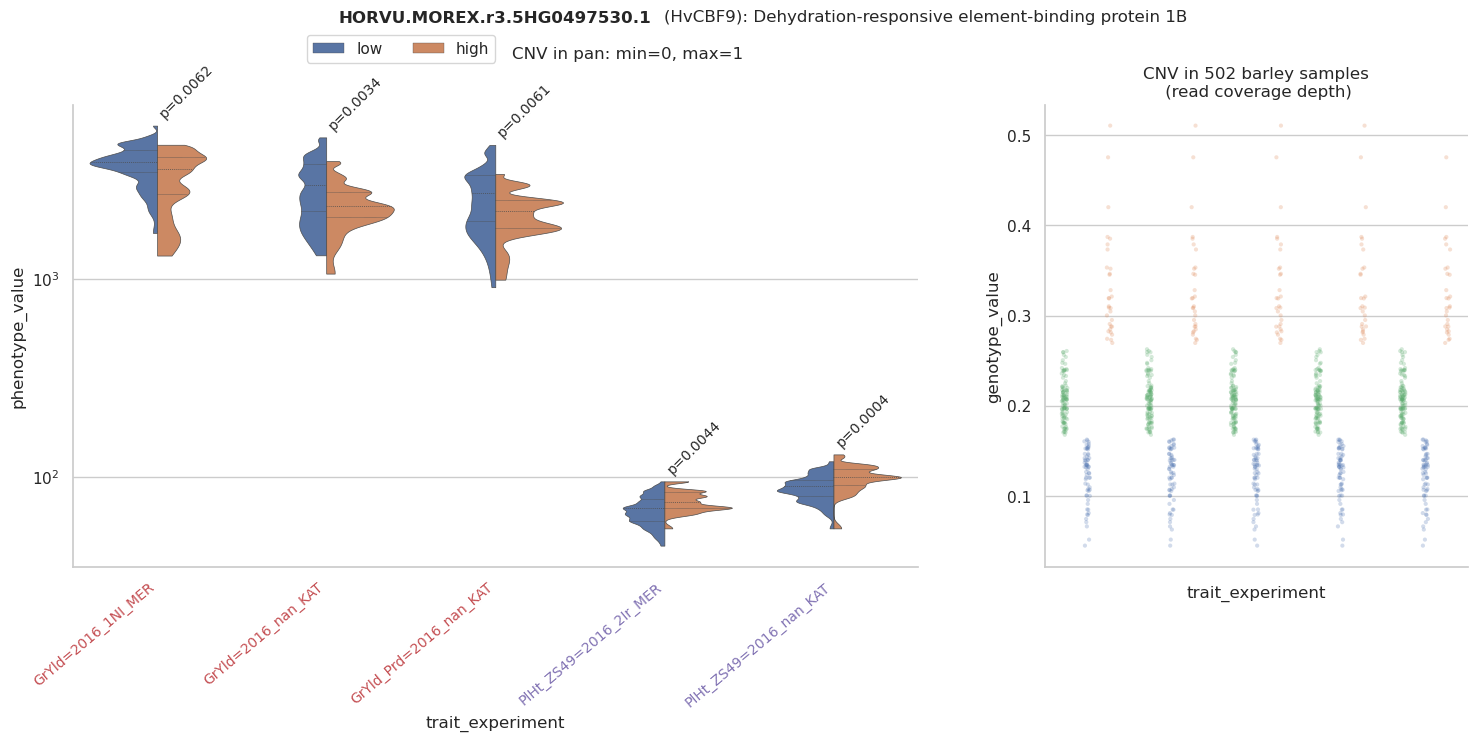

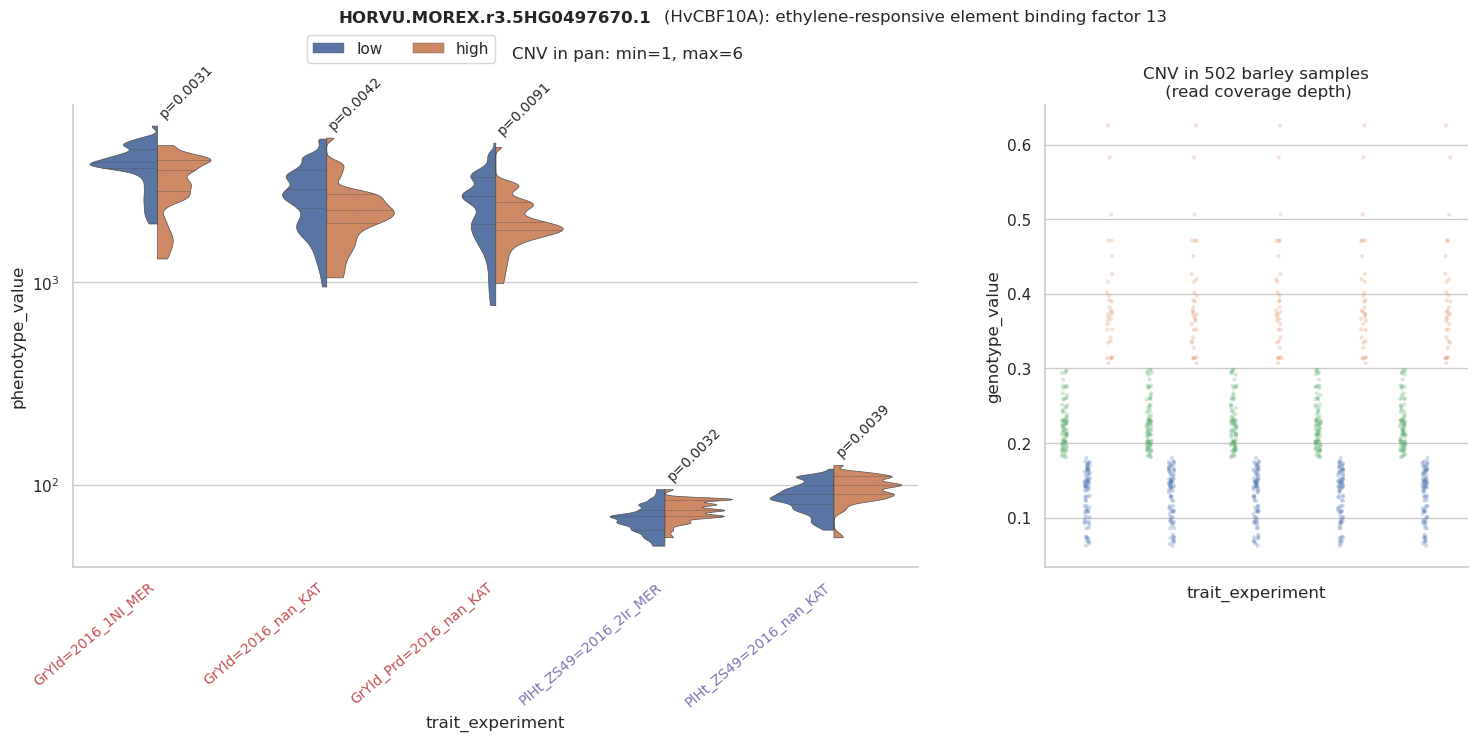

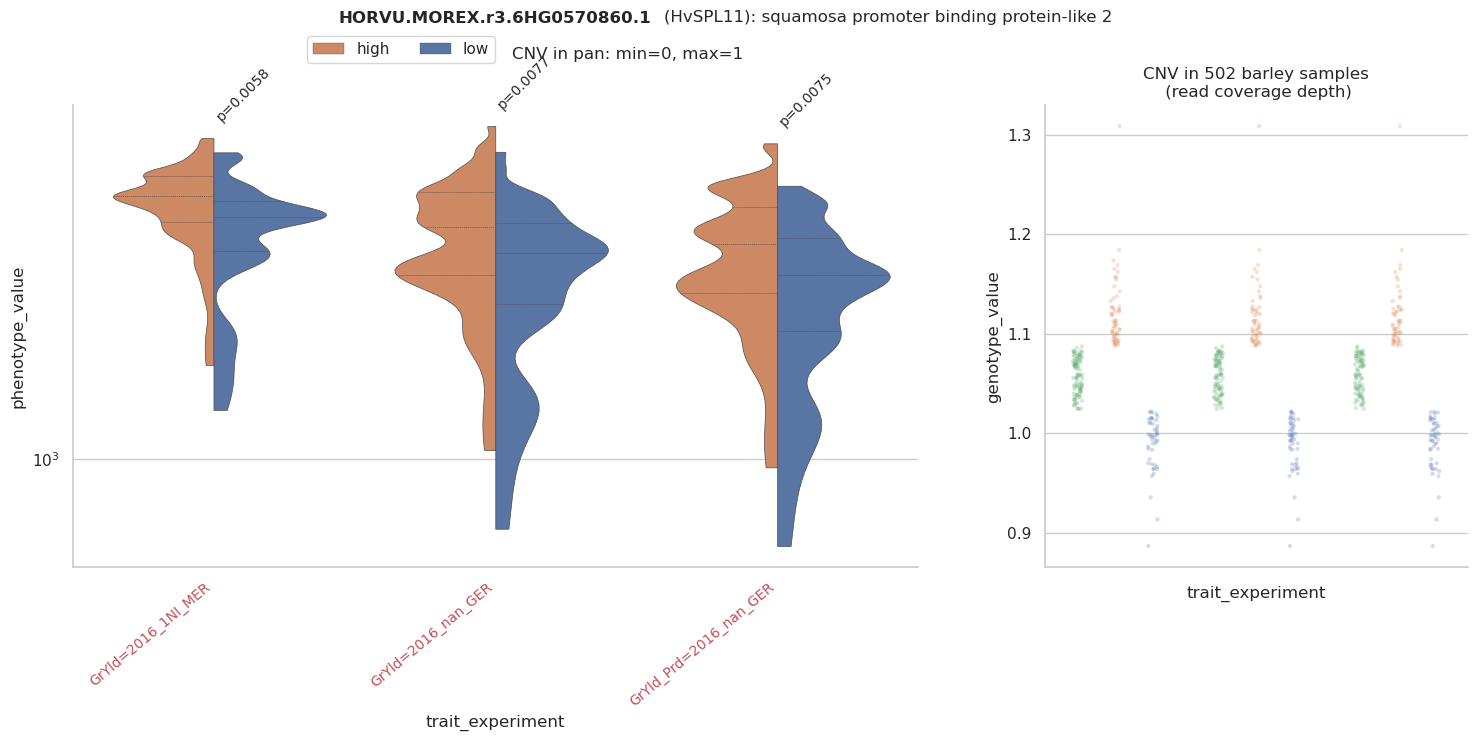

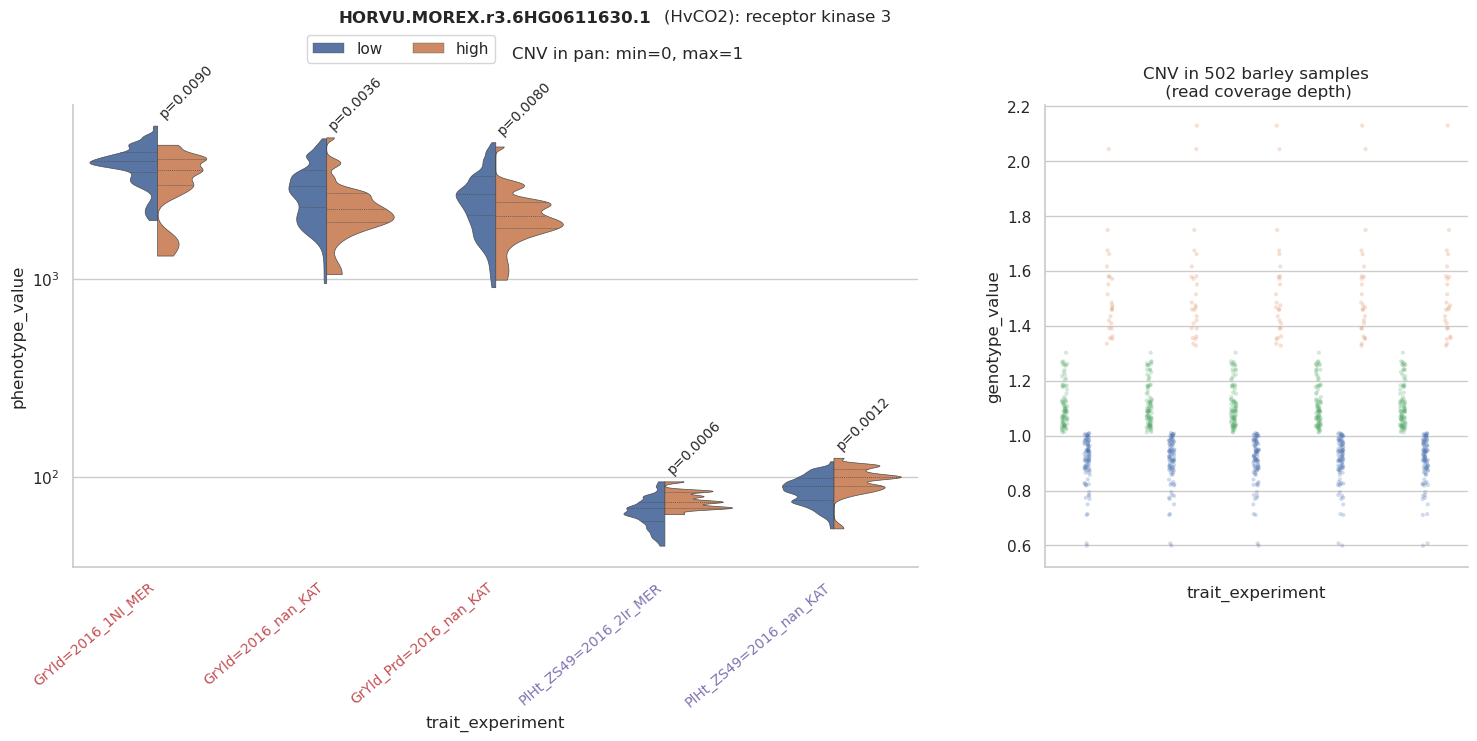

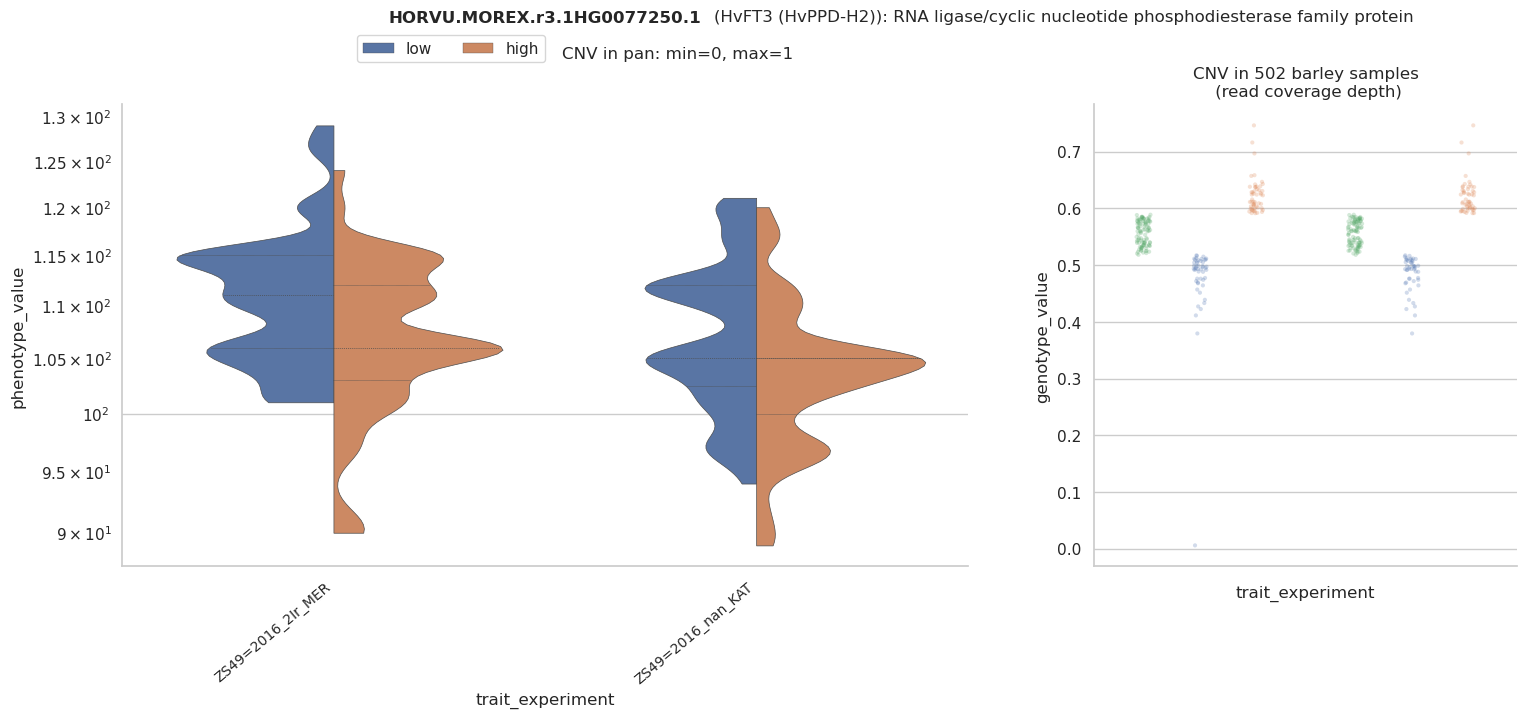

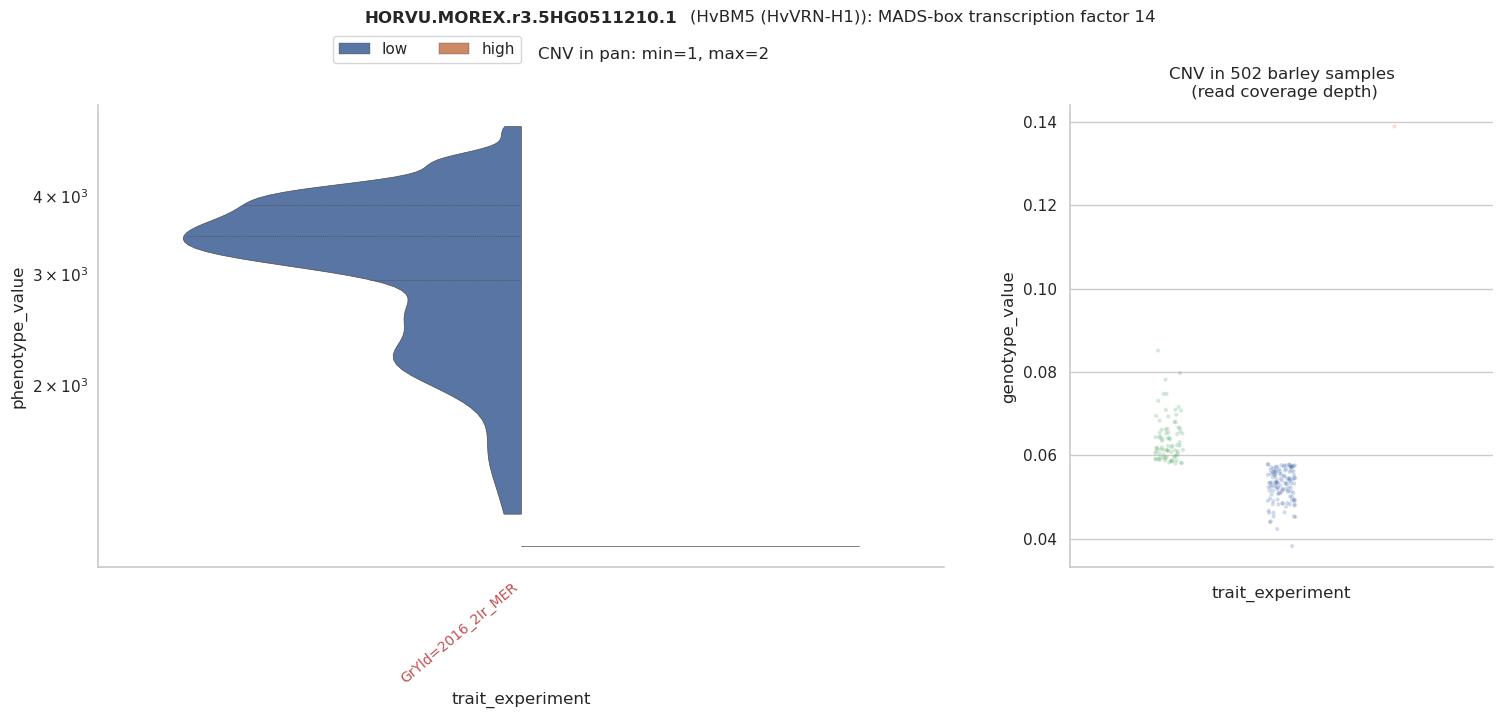

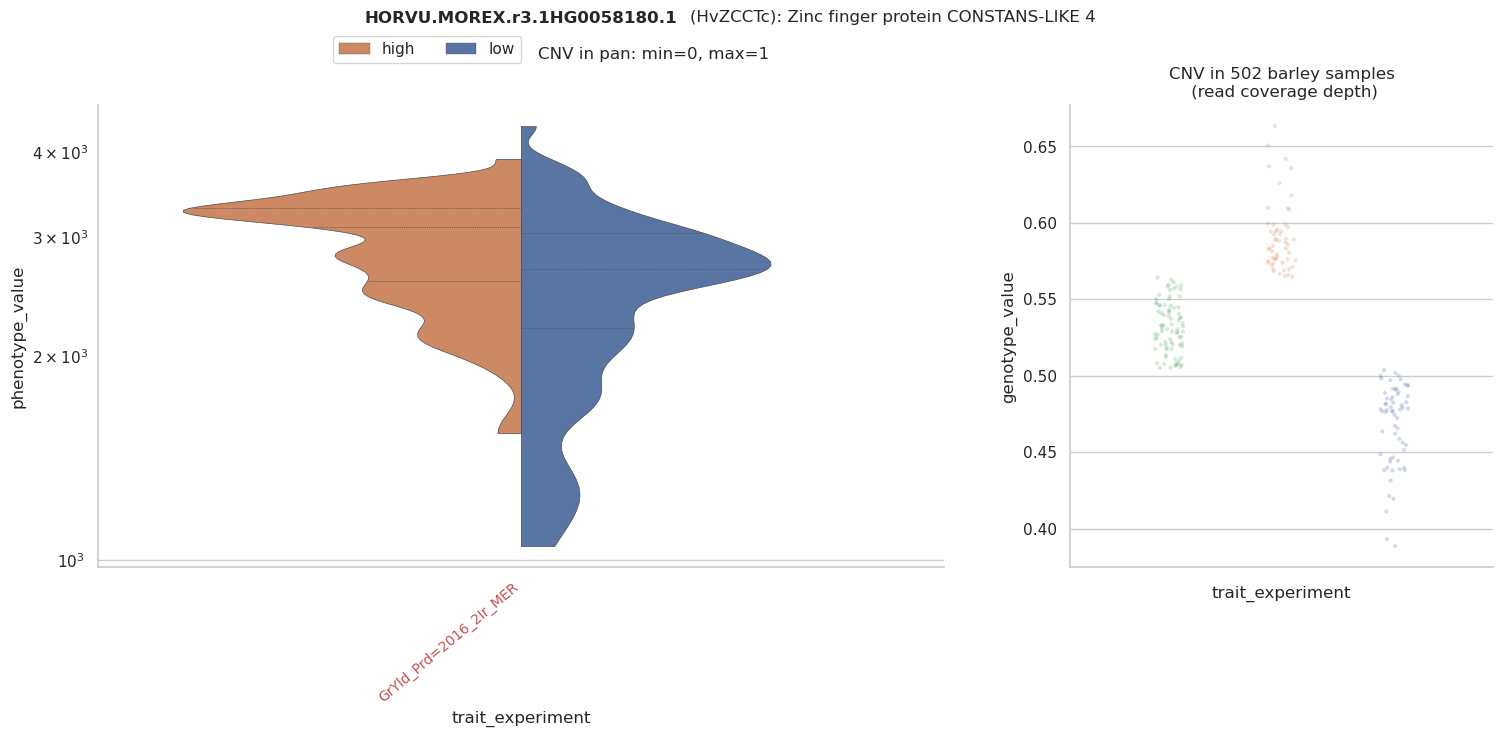

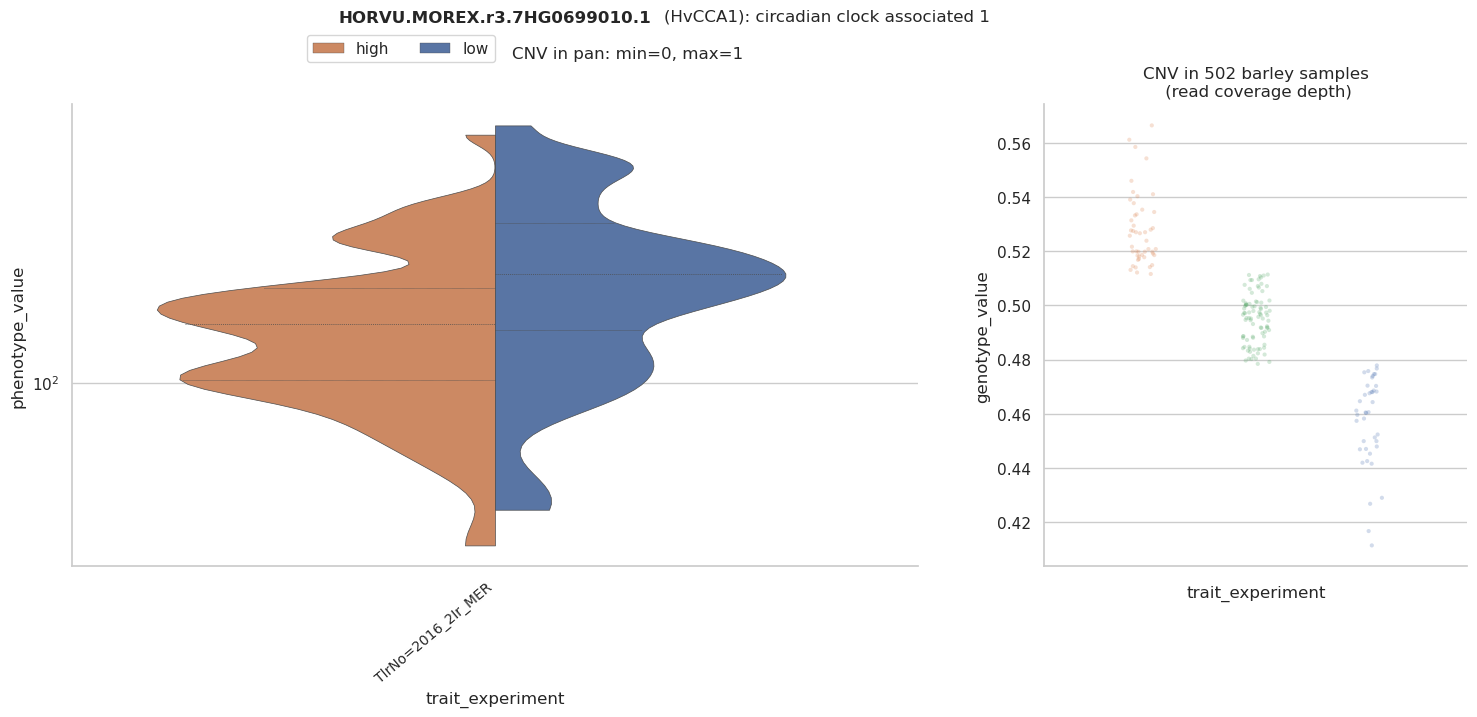

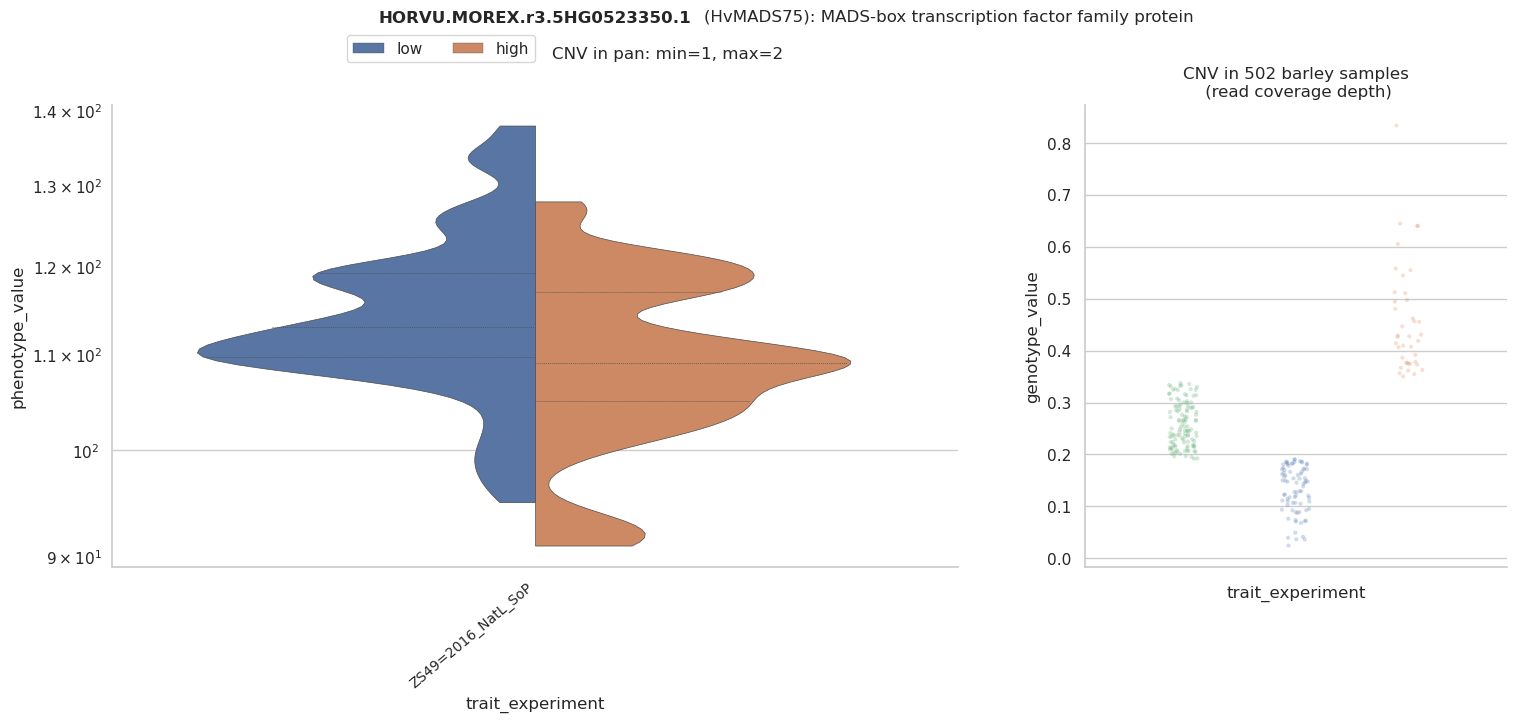

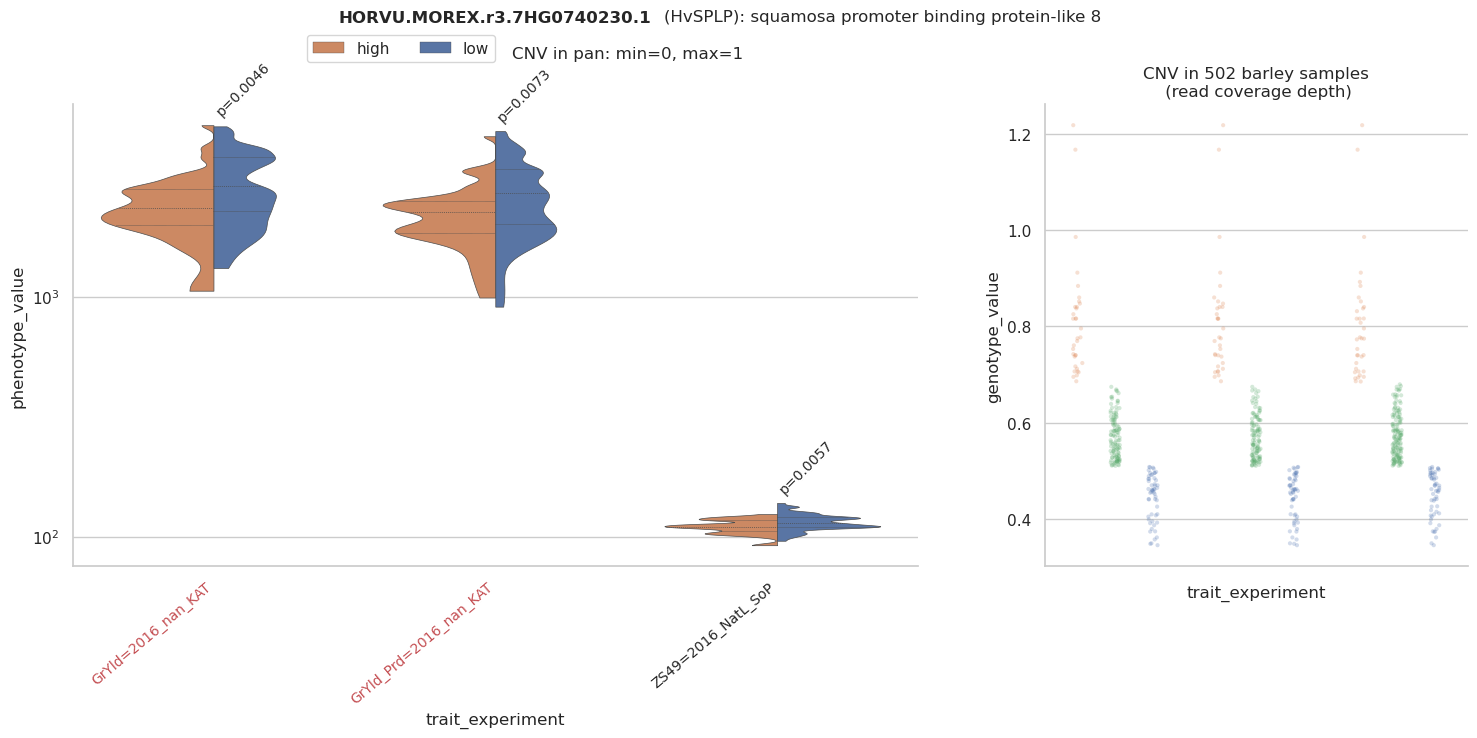

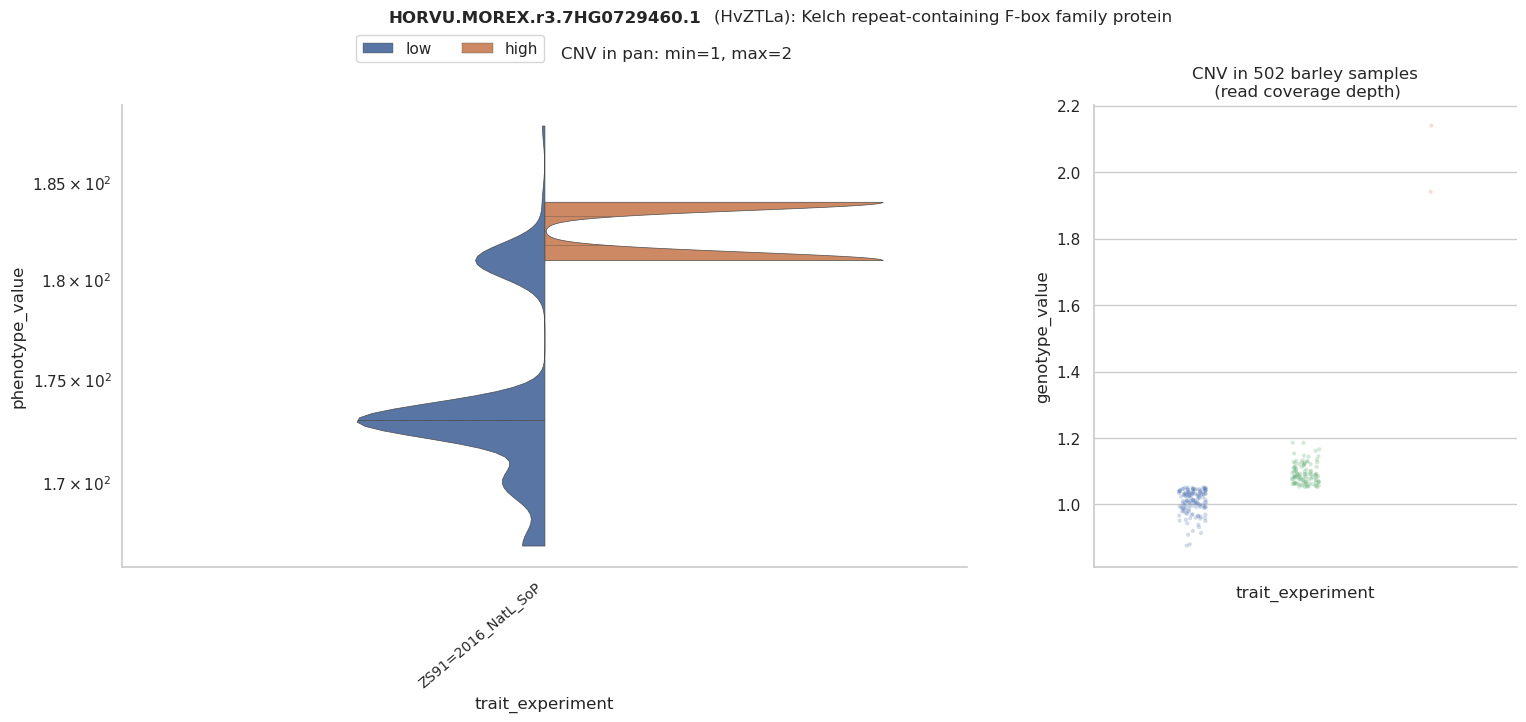

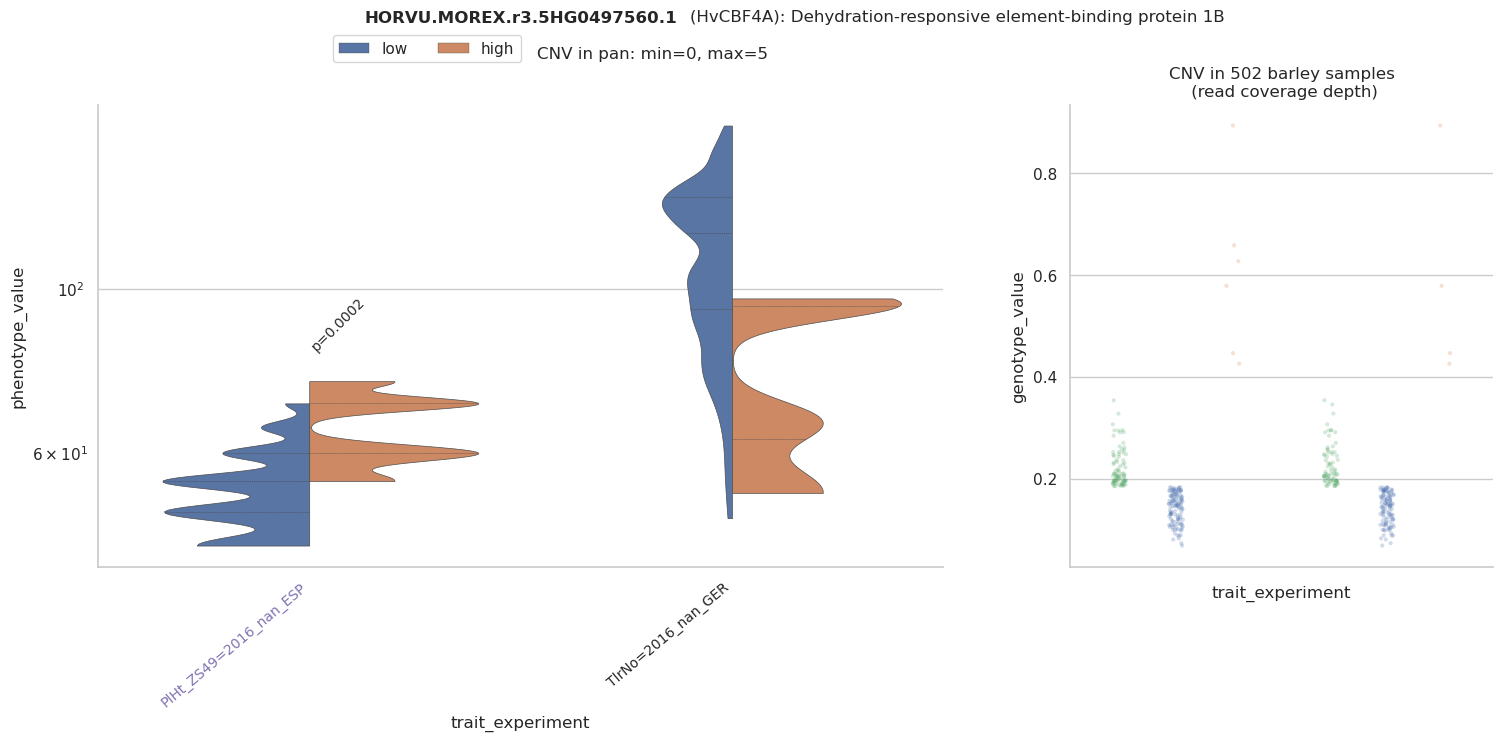

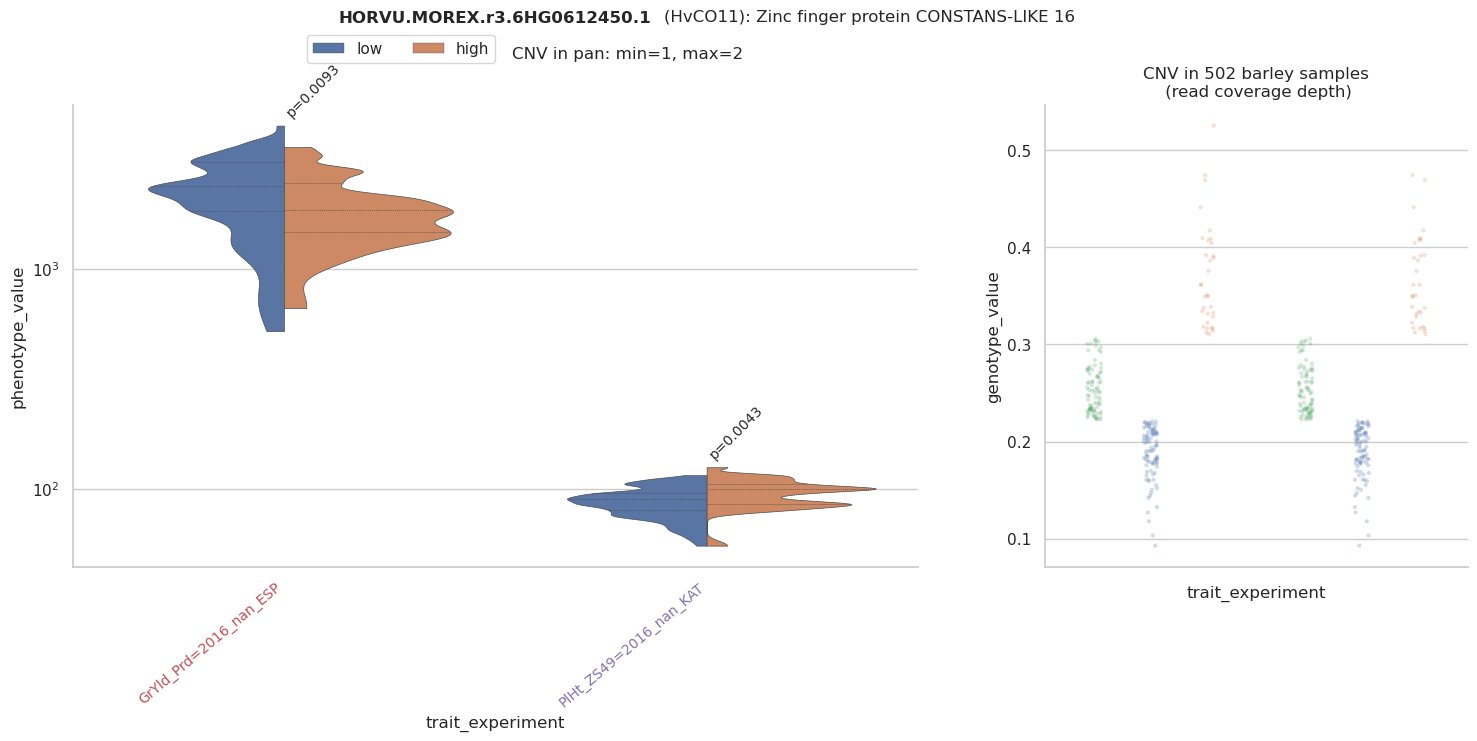

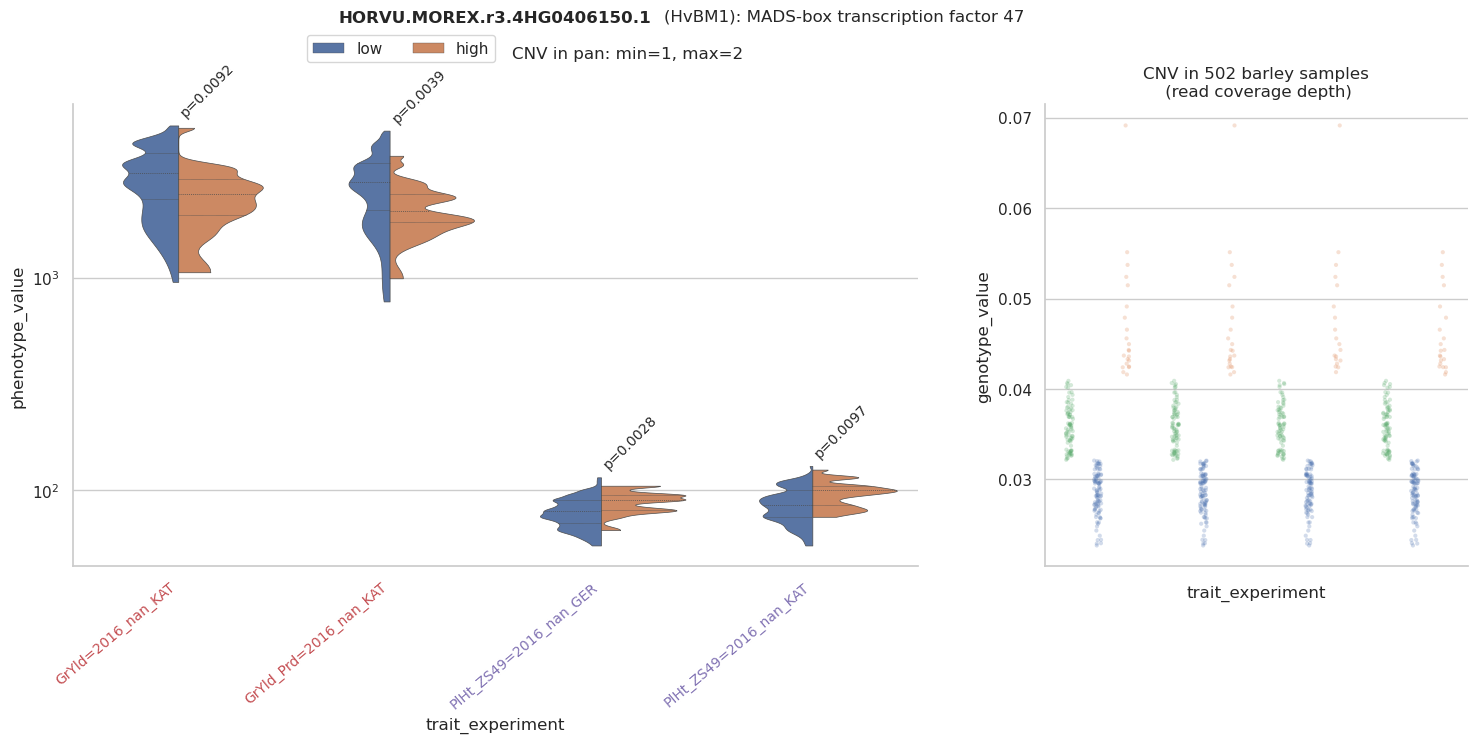

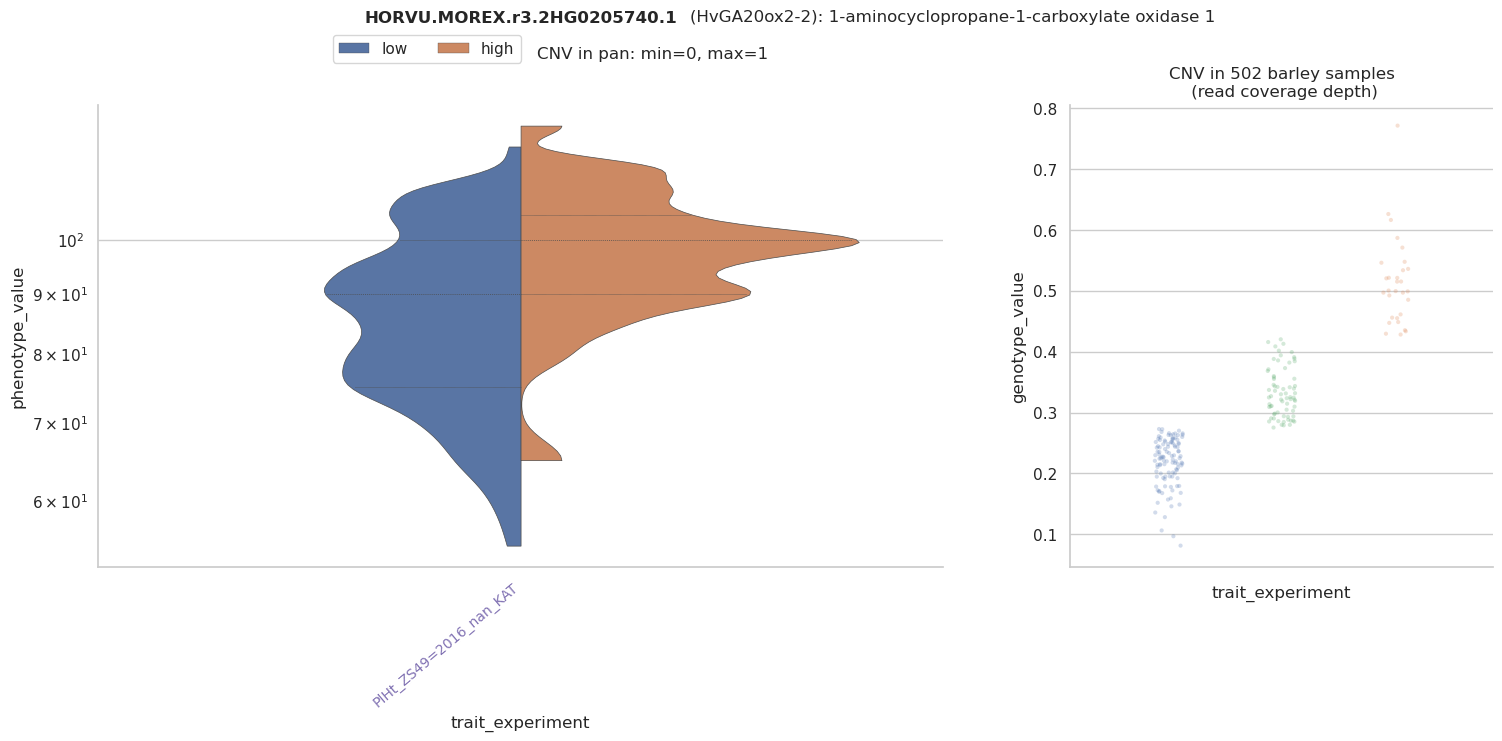

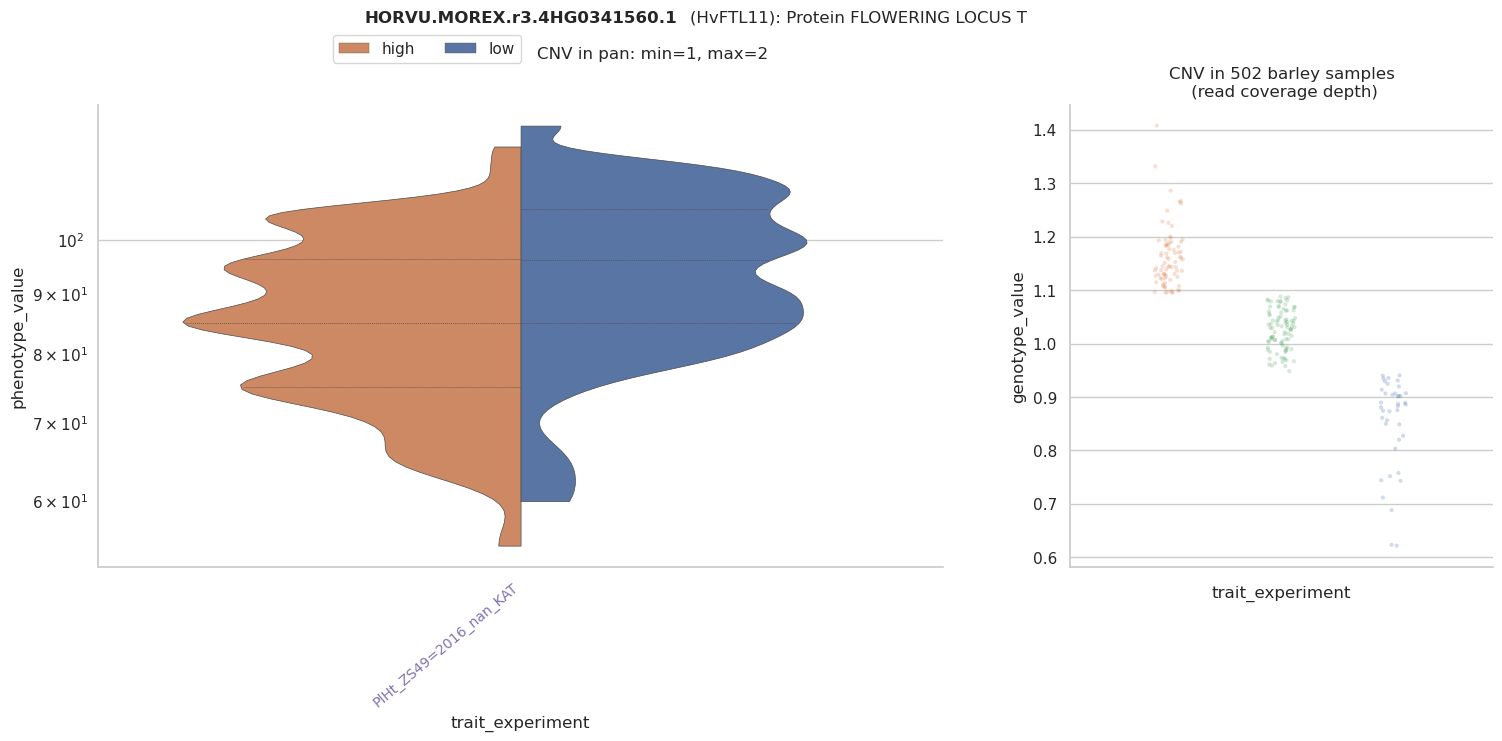

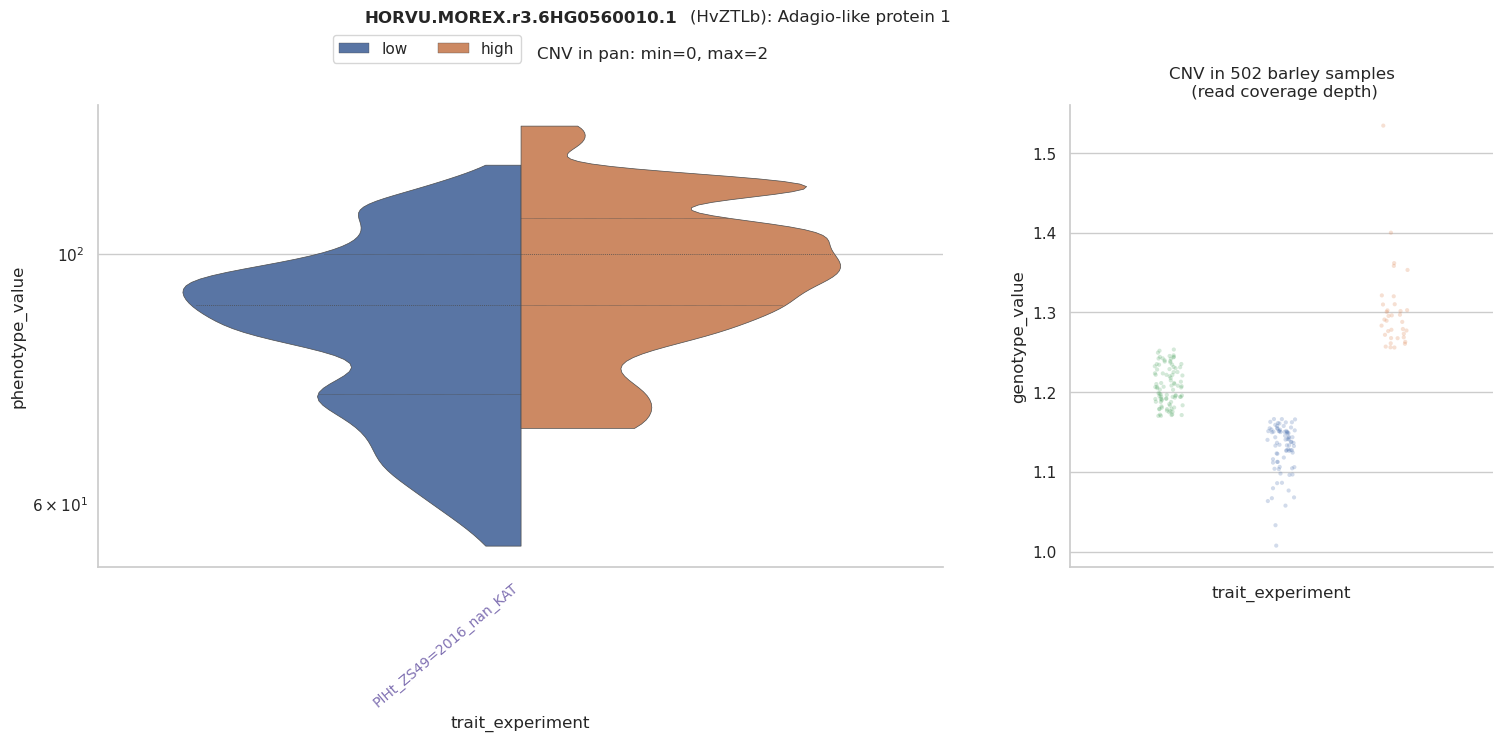

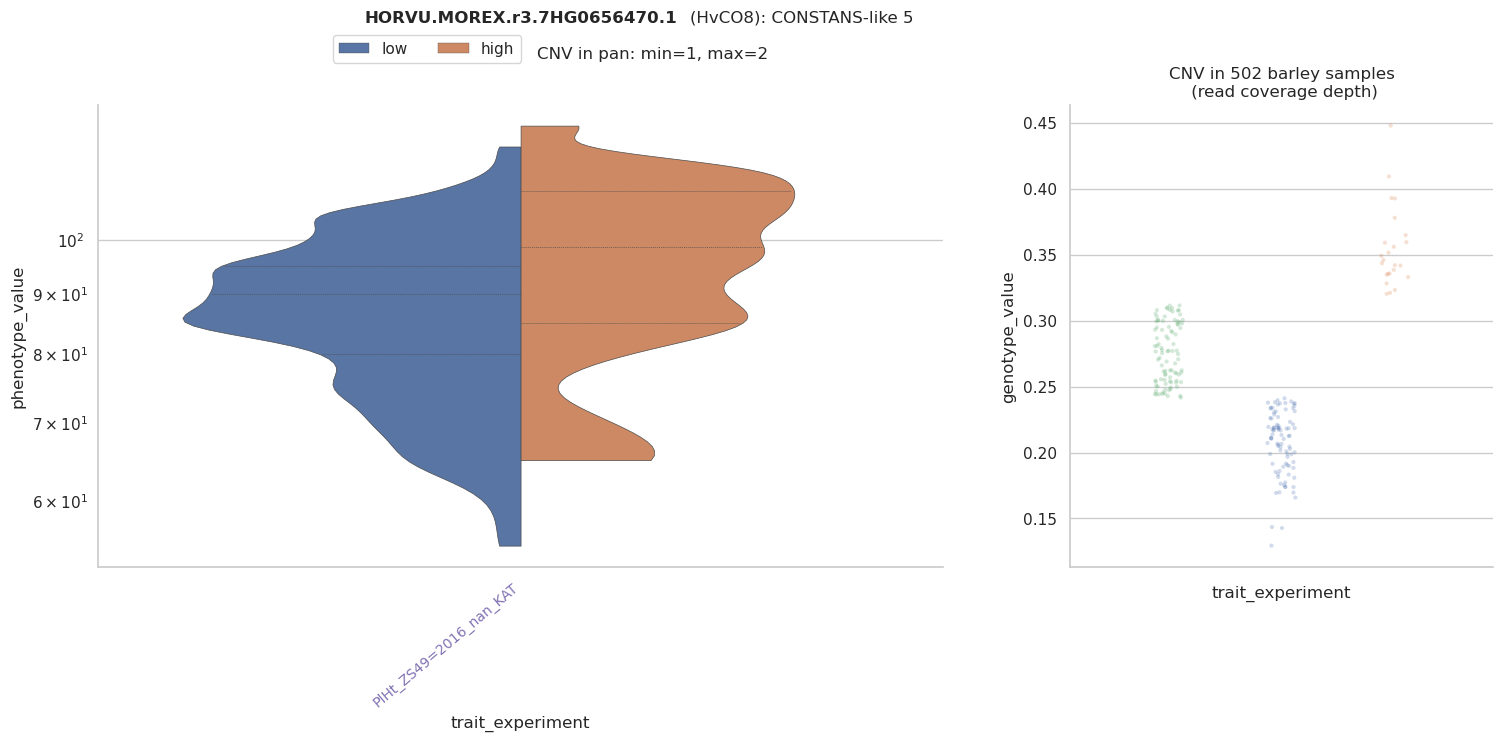

In [69]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ###### add coverage matrix in subplots and plot only low and high for phenotype
    # Generate the stripplot with x
    for GENE in df_target_all['gene'].unique():
        f, axes = plt.subplots(1,2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1]})
        sns.despine(bottom=True, left=True)
        sns.set_theme(style="whitegrid")
        color_map = {'low':colors[0],'mid':colors[2],'high':colors[1]}
        
        ################# filter gene data
        df_gene = df_target_all[df_target_all['gene'] == GENE] ## extract gene data
        df_gene2 = df_gene[df_gene['genotype_cluster'] != 'mid'] ## to hide mid cluster, modify here
        
        ## get xticklabels and sort and use as order in plot
        sorted_xlabels = sorted(df_gene2['trait_experiment'].unique())
        
        ###### plot phenotype
        #sns.stripplot(ax=axes[0], data=df_gene2, y="phenotype_value", x="trait_experiment", hue="genotype_cluster", jitter=True, dodge=True,
        #                  alpha=.25, size=4, zorder=1, palette=color_map, order=sorted_xlabels ) ##  palette=color_map
        sns.violinplot(ax=axes[0], data=df_gene2, y="phenotype_value", x="trait_experiment", hue="genotype_cluster", palette=color_map,
                       bw=.2, cut=0, linewidth=0.5, split=True, inner='quartile', order=sorted_xlabels)
        
        #sns.pointplot(ax=axes[0], data=df_gene2, y="phenotype_value", x="trait_experiment", hue="genotype_cluster", order=sorted_xlabels,
        #                join=False, dodge=0.4, markers="d", scale=.7, errorbar='sd',errwidth=0.9, palette=color_map)  ## palette=color_map
        
        # Extract the unique hue categories
        trait_experiments = df_gene['trait_experiment'].unique()
        
        # Perform t-test and annotate p-value for each hue category
        for trait_experiment in trait_experiments:
            group1 = df_gene2[(df_gene2["trait_experiment"] == trait_experiment) & (df_gene2["genotype_cluster"] == "low")]["phenotype_value"].dropna()
            group2 = df_gene2[(df_gene2["trait_experiment"] == trait_experiment) & (df_gene2["genotype_cluster"] == "high")]["phenotype_value"].dropna()
            t_stat, p_value = ttest_ind(group1, group2)
            if p_value < 0.0001:
                annotation_text = "p < 0.0001"
            else:
                annotation_text = f"p={p_value:.4f}"
            
            xtick_labels = [tick.get_text() for tick in axes[0].get_xticklabels()]
            x_pos = xtick_labels.index(trait_experiment)
            y_pos = max(group1.max(), group2.max()) # Adjust the y-position as needed
            y_pos = y_pos * 1.1
            axes[0].annotate(annotation_text, xy=(x_pos, y_pos), xycoords="data", ha="left",fontsize=10, rotation=45)
        
        ## extract min and max in 76 and annotate on plot
        MIN = df_pan_group.loc[GENE,'min']
        MAX = df_pan_group.loc[GENE,'max']
        annotation_text2 = f"CNV in pan: min={MIN:d}, max={MAX:d}"
        axes[0].annotate(annotation_text2, xy= (0.52, 1.1), xycoords='axes fraction')
        
    
        ##change xticklabels
        xtick_labels = [tick.get_text() for tick in axes[0].get_xticklabels()] 
        axes[0].set_xticklabels(xtick_labels, rotation = 40, ha='right', fontsize=10)
        
        #xticklabels color
        for i in np.arange(0,len(xtick_labels)):
            if "GrYld" in xtick_labels[i]:
                color=colors[3]
                t=axes[0].xaxis.get_ticklabels()[i]
                t.set_color(color)
            elif "PlHt" in xtick_labels[i]:
                color=colors[4]
                t=axes[0].xaxis.get_ticklabels()[i]
                t.set_color(color)
                
        
        # Get the handles and labels. For this example it'll be 2 tuples
        # of length 4 each.
        handles, labels = axes[0].get_legend_handles_labels()
    
        # When creating the legend, only use the first two elements
        # to effectively remove the last two.
        legend0 = axes[0].legend(handles[0:2], labels[0:2], bbox_to_anchor=(0.5, 1.15), ncol=2, borderaxespad=0.)  ## change depending one how many clusters
        ### ANNOTATE TITLE TO INCLUDE GENE NAME
        axes[0].set_title(GENE,fontweight='bold',x=0.5,y=1.16)
        GENE_name = df_gene_name.loc[GENE,'Putative gene name']
        GENE_func = df_gene_name.loc[GENE,'Annotation_r1_HC']
        annotation_text3 = f"({GENE_name}): {GENE_func}"
        axes[0].annotate(annotation_text3, xy= (0.7, 1.18), xycoords='axes fraction')
        axes[0].set_yscale('log')
        
        ########## create the second axes
        #### plot genotype
        sns.stripplot(ax=axes[1], data=df_gene, y="genotype_value", x="trait_experiment", hue="genotype_cluster", jitter=True, dodge=True,
                          alpha=.25, zorder=1,size=3, palette=color_map, order=sorted_xlabels) ## palette=color_map
        
        # sns.pointplot(ax=axes[1], data=df_gene, y="genotype_value", x="trait_experiment", hue="genotype_cluster",
        #     join=False, dodge=0.4, palette="dark", markers="d", scale=.75, errorbar=None)
        
        # annotation_text3 = f"CNV in 502 barley samples\n (read coverage depth)"
        # axes[0].annotate(annotation_text2, xy= (0.52, 1.1), xycoords='axes fraction')
        
        axes[1].set_title("CNV in 502 barley samples\n (read coverage depth)",x=0.5,y=1)
        axes[1].legend([],frameon=False)
        axes[1].set_xticklabels([])
        
        ###################### Display the plot
        sns.despine()
        plt.savefig("./plot_pvalue01_outlier_gene_with_CNV_3kmeans_plot2_with_function/" + GENE + ".png",dpi=300, bbox_inches='tight')